### Data Preprocessing

In [3]:
import pandas as pd

# 重新加载清理后的两个文件（CNRDS 和 CSMAR）
file1 = "CSMAR.xlsx"
file2 = "CNRDS.xlsx"

df1 = pd.read_excel(file1, sheet_name='模板')
df2 = pd.read_excel(file2, sheet_name='上市公司ESG评级')

# --- 清理 CNRDS ---
df1_clean = df1.iloc[2:].copy()
df1_clean.columns = df1.iloc[0]
df1_clean = df1_clean.dropna(subset=["股票代码"])
df1_clean = df1_clean.rename(columns={
    "股票代码": "Code",
    "股票简称": "Name",
    "评级年份": "Year",
    "评级日期":"Date",
    "公司全称": "FullName",
    "所属指数名称": "IndexName",
    "成分股标识": "ConstituentFlag",
    "证监会行业": "CSMAR_Industry",
    "融绿一级行业": "CSMAR_Industry_1",
    "融绿二级行业": "CSMAR_Industry_2",
    "ESG总评分": "ESG_CSMAR",
    "E评分": "E_CSMAR",
    "S评分": "S_CSMAR",
    "G评分": "G_CSMAR",
    "特殊说明": "SpecialNotes",
    "ESG风险评估评分":"ESGRiskScore",
    "ESG管理评分":"ESGManagementscore"

})

# --- 清理 CSMAR ---
df2_clean = df2.iloc[1:].copy()
df2_clean.columns = df2.iloc[0]
df2_clean = df2_clean.dropna(subset=["股票代码"])
df2_clean = df2_clean.rename(columns={
    "股票代码": "Code",
    "公司简称": "Name",
    "会计年度": "Year",
    "ESG得分": "ESG_CNRDS",
    "E得分": "E_CNRDS",
    "S得分": "S_CNRDS",
    "G得分": "G_CNRDS",
    "ESG排名": "ESG_CNRDS_rank",
    "E排名": "E_CNRDS_rank",
    "S排名": "S_CNRDS_rank",
    "G排名": "G_CNRDS_rank",
})

# 转换类型
for df in [df1_clean, df2_clean]:
    df["Year"] = df["Year"].astype(int)
    for col in ["ESG_CNRDS", "E_CNRDS", "S_CNRDS", "G_CNRDS",
                "ESG_CSMAR", "E_CSMAR", "S_CSMAR", "G_CSMAR"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

# 合并（外连接）
merged_full = pd.merge(df1_clean, df2_clean, on=["Code", "Year","Name"], how="outer")

# --- 保留双系统都有数据的样本 ---
merged_matched = merged_full.dropna(subset=["ESG_CNRDS", "ESG_CSMAR"])

# 输出样本量统计
num_rows = len(merged_matched)
num_companies = merged_matched["Code"].nunique()

# merged_matched.head(), num_rows, num_companies


In [4]:
import pandas as pd

# 读取文件（用你前面生成的合并文件）
df = merged_matched

# 行业映射字典（中→英，学术风格）
industry_map = {
    # === 原基础映射 ===
    "资本市场服务": "Capital Market Services",
    "银行业": "Banking",
    "保险业": "Insurance",
    "证券业": "Securities",
    "金属制品业": "Manufacture of Metal Products",
    "运输设备制造业": "Manufacture of Transport Equipment",
    "铁路、船舶、航空航天和其他运输设备制造业": "Manufacture of Railway, Ship, Aerospace and Other Transport Equipment",
    "原材料加工制造业": "Raw Materials Manufacturing",
    "化学原料及化学制品制造业": "Manufacture of Chemicals and Chemical Products",
    "金融业": "Finance Industry",
    "非银金融业": "Non-bank Financial Industry",
    "制造业": "Manufacturing",
    "批发和零售业": "Wholesale and Retail Trade",
    "房地产业": "Real Estate",
    "电力、热力、燃气及水生产和供应业": "Electricity, Heat, Gas and Water Supply",
    "采矿业": "Mining Industry",
    "农、林、牧、渔业": "Agriculture, Forestry, Animal Husbandry and Fishery",
    "软件和信息技术服务业": "Software and Information Technology Services",
    "信息传输、软件和信息技术服务业": "Information Transmission, Software and IT Services",
    "交通运输、仓储和邮政业": "Transportation, Storage and Postal Services",
    "文化、体育和娱乐业": "Culture, Sports and Entertainment",
    "教育": "Education",
    "卫生和社会工作": "Health and Social Work",
    "科学研究和技术服务业": "Scientific Research and Technical Services",
    "租赁和商务服务业": "Leasing and Business Services",
    "公共管理、社会保障和社会组织": "Public Administration, Social Security and Organizations",

    # === 扩展未翻译行业 ===
    "货币金融服务": "Monetary Financial Services",
    "综合": "Comprehensive",
    "电力、热力生产和供应业": "Production and Supply of Electricity and Heat",
    "有色金属冶炼和压延加工业": "Smelting and Rolling of Nonferrous Metals",
    "黑色金属冶炼和压延加工业": "Smelting and Rolling of Ferrous Metals",
    "金属冶炼和压延加工业": "Smelting and Rolling of Metals",
    "商务服务业": "Business Services",
    "广播、电视、电影和影视录音制作业": "Radio, Television, Film and Audio-Video Production",
    "租赁业": "Leasing",
    "水的生产和供应业": "Water Production and Supply",
    "石油加工、炼焦及核燃料加工业": "Processing of Petroleum, Coking and Nuclear Fuel",
    "非金属矿物制品业": "Manufacture of Non-metallic Mineral Products",
    "农副食品加工业": "Processing of Agricultural and Sideline Food",
    "电信、广播电视和卫星传输服务": "Telecommunications, Broadcasting and Satellite Transmission Services",
    "煤炭开采和洗选业": "Coal Mining and Washing",
    "土木工程建筑业": "Civil Engineering Construction",
    "零售业": "Retail Trade",
    "批发业": "Wholesale Trade",
    "道路运输业": "Road Transport",
    "铁路运输业": "Rail Transport",
    "航空运输业": "Air Transport",
    "水上运输业": "Water Transport",
    "邮政业": "Postal Services",
    "互联网和相关服务": "Internet and Related Services",
    "畜牧业": "Animal Husbandry",
    "造纸及纸制品业": "Manufacture of Paper and Paper Products",
    "生态保护和环境治理业": "Ecological Protection and Environmental Governance",
    "文化艺术业": "Culture and Arts",
    "石油和天然气开采业": "Extraction of Petroleum and Natural Gas",
    "建筑业": "Construction",
    "建筑业-土木工程建筑业": "Construction - Civil Engineering",
    "建筑装饰和其他建筑业": "Building Decoration and Other Construction",
    "开采辅助活动": "Support Activities for Mining",
    "新闻和出版业": "News and Publishing",
    "纺织服装、服饰业": "Textile, Apparel and Accessories",
    "纺织业": "Textile Industry",
    "有色金属矿采选业": "Nonferrous Metal Mining and Dressing",
    "黑色金属矿采选业": "Ferrous Metal Mining and Dressing",
    "燃气生产和供应业": "Gas Production and Supply",
    "食品与主要用品零售": "Food and Essential Goods Retail",
    "橡胶和塑料制品业": "Manufacture of Rubber and Plastic Products",
    "研究和试验发展": "Research and Experimental Development",
    "卫生": "Health",
    "农业": "Agriculture",
    "其他运输业和邮政业": "Other Transport and Postal Services",
    "水利、环境和公共设施管理业": "Water Conservancy, Environment and Public Facilities Management",
    "其他服务业": "Other Services",
    "（已退市）": "Delisted"
}


# 定义一个翻译函数
def translate_industry(value):
    if pd.isna(value):
        return None
    for k, v in industry_map.items():
        if k in str(value):
            return v
    return value  # 如果没找到匹配，就保留原文

# 新增英文列
df["CSMAR_Industry"] = df["CSMAR_Industry"].apply(translate_industry)
df["CSMAR_Industry_1"] = df["CSMAR_Industry_1"].apply(translate_industry)
df["CSMAR_Industry_2"] = df["CSMAR_Industry_2"].apply(translate_industry)
df = df.drop(columns=["评级", "ConstituentFlag", "IndexName"])

# # 导出新的文件
output_path = "ESG_with_Industry_English.xlsx"
df.to_excel(output_path, index=False)

print(df.head(10))


C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\955113702.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CSMAR_Industry"] = df["CSMAR_Industry"].apply(translate_industry)
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\955113702.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CSMAR_Industry_1"] = df["CSMAR_Industry_1"].apply(translate_industry)
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\955113702.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

0   Year        Date    Code  Name        FullName  \
1   2015  2015-06-30  000776  广发证券      广发证券股份有限公司   
2   2015  2015-06-30  000778  新兴铸管      新兴铸管股份有限公司   
3   2015  2015-06-30  000783  长江证券      长江证券股份有限公司   
4   2015  2015-06-30  000792  盐湖股份    青海盐湖工业股份有限公司   
7   2015  2015-06-30  000825  太钢不锈   山西太钢不锈钢股份有限公司   
10  2015  2015-06-30  000858   五粮液     宜宾五粮液股份有限公司   
11  2015  2015-06-30  000876   新希望     新希望六和股份有限公司   
12  2015  2015-06-30  000883  湖北能源    湖北能源集团股份有限公司   
13  2015  2015-06-30  000895  双汇发展  河南双汇投资发展股份有限公司   
14  2015  2015-06-30  000898  鞍钢股份        鞍钢股份有限公司   

0                                   CSMAR_Industry  \
1                          Capital Market Services   
2                    Manufacture of Metal Products   
3                          Capital Market Services   
4   Manufacture of Chemicals and Chemical Products   
7           Smelting and Rolling of Ferrous Metals   
10                                   Manufacturing   
11    Processing of Agricul

### General Paper Outline



### The Inherent Difference in Two Rating System


||CSMAR|CNRDS|
|----|----|----|
|Cover Range| Chinese Security Index 300| All A-share listed companies in China, excluding those that have been delisted|
|Data Source| Media, publicly available information|CNRDS platform, publicly available information| 
|Composition| 3 level I indicator, 14 key issues, 200 + ESG indicators from 700+ Data points, 51 industry specific model |3 level I indicator, 14 Level II indicators, 39 Level III indicators |
| Methodology | Bottom-up indicator aggregation model: From data to model | HP: Analytical Hierarchy Process. From alignment with International ESG Framework to data|
| Weights | 51 Industry Models (core indicators + secotr-specific indicators | Experts Rating Pairewise Comparison + Industry Adjustment | 

**CSMAR**: 
* Drive from data point: Drived from approximately 700 data points, 200 indicators was find. Hierachy into 14 key issues were build on 200 indicators. 
* Industry Differnce: Core Indicators + Sector Specfic Indicators 
    * The framework distinguishes between core indicators (applicable to all firms) and sector-specific indicators (tailored to industry characteristics).
    * 51 industry models were developed each with customized weights. 
* Scoring Mechanism: ESG Managemeng Score (positive scores) + ESG risk scores (potential risk) 
* Data Source: corporate annual reports, sustainability and CSR reports, official disclosures, regulatory announcements, and media coverage.

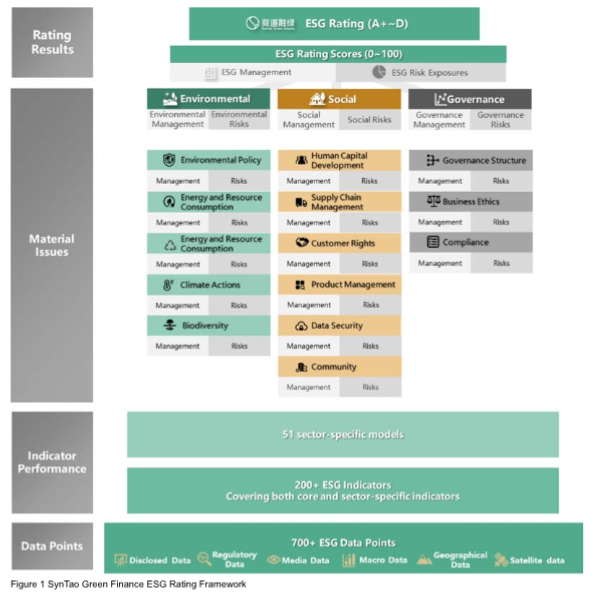

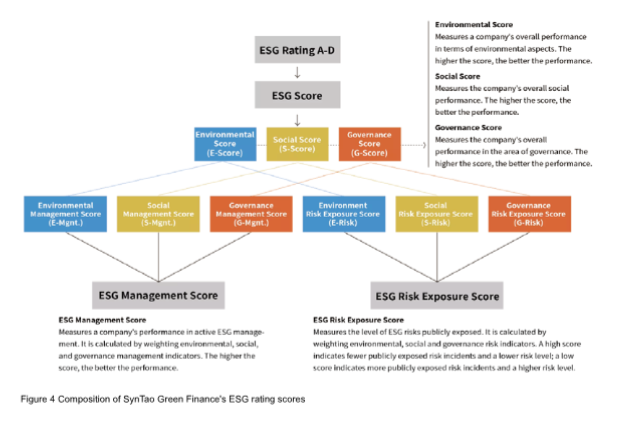
------
**CNRDS**
* Follow International Standard:  
    * Align with International Disclosure: It follows the international disclousre framework such as ISO 260000, GRI Standard, and SASB standard. 
    * Build upon and qantitaive and qualitie data. 
    * It includes 14 ESG Topics, 39 sub-indicators, 44 underlying variables, 
* Industry Differnce: 
    * Expert doing pairwise comparison -> Scoring Matrix > Consistency Test > Result 
    * Also applied industry-specific standaridzation. 
    * Adjust based on CSRS industry classification (19 Level I Industry) 
* Scoring Mechanism: 
    * Expert doing pairwise comparison -> Scoring Matrix > Consistency Test 
* Data Source: corporate annual and CSR/ESG reports, CNRDS financial and patent databases, media reports, and regulatory filings

**CSMAR v.s. CNSRD Level II Topic Difference**  
    
| Dimension | **CSMAR (SynTao Green Finance)** | **CNRDS ESG-R** |
|------------|----------------------------------|------------------|
| **Environmental (E)** | - Environmental Policy ✅ <br> - Energy and Resource Consumption ✅ <br> - Pollutant Discharge  <br> - Climate Actions  <br> - Biodiversity ✅| - Climate Change  <br> - Pollution Control  <br> - Circular Economy ✅ <br> - Environmental Risk |
| **Social (S)** | - Human Capital Development ✅ <br> - Customer Rights ✅ <br> - Supply Chain Management ✅ <br> - Data Security ✅ <br> - Product Management  <br> - Community | - Employee Rights  <br> - Product Responsibility  <br> - Social Contribution ✅ <br> - Research and Innovation ✅ <br> - Health and Safety✅  <br> - Social Risk |
| **Governance (G)** | - Governance Structure  <br> - Business Ethics ✅ <br> - Compliance ✅| - Financial Performance ✅<br> - Corporate Governance  <br> - Information Disclosure ✅ <br> - Governance Risk |


✅: This topics only includes in this Rating System. 
While both standards cover core E, S, and G dimensions, CSMAR places a distinct emphasis on policy and foundational aspects, notably featuring:
* Environmental Policy
* Energy and Resource Consumption
* Biodiversity
* Various social pillars like Human Capital Development, Customer Rights, Supply Chain Management, and Data Security
* Governance aspects of Business Ethics and Compliance

In contrast, the CNRDS ESG-R standard appears more focused on tangible impacts, performance, and risk management. Its unique elements include:
* Specific environmental themes like Circular Economy
* Social factors such as Social Contribution, Research and Innovation, and Health and Safety
* Governance metrics directly tied to Financial Performance and Information Disclosure
* A pronounced emphasis on risk across all dimensions, explicitly listing Environmental Risk, Social Risk, and Governance Risk

In essence, CSMAR seems to prioritize the existence of policies and management systems, whereas CNRDS ESG-R leans towards evaluating concrete outcomes, performance results, and the management of associated risks.


### Standardized the Score: 

#### Method 1: Percentile 
* Standardize using Percentile → Show differences at the "ranking level"

In [8]:
import pandas as pd

# Standardized According to Percentile 

# Percentile for Different Years
df["CNRDS_ESG_pct"] = df.groupby("Year")["ESG_CNRDS"].rank(pct=True)
df["CSMAR_ESG_pct"] = df.groupby("Year")["ESG_CSMAR"].rank(pct=True)
df["CNRDS_E_pct"] = df.groupby("Year")["E_CNRDS"].rank(pct=True)
df["CSMAR_E_pct"] = df.groupby("Year")["E_CSMAR"].rank(pct=True)
df["CNRDS_S_pct"] = df.groupby("Year")["S_CNRDS"].rank(pct=True)
df["CSMAR_S_pct"] = df.groupby("Year")["S_CSMAR"].rank(pct=True)
df["CNRDS_G_pct"] = df.groupby("Year")["G_CNRDS"].rank(pct=True)
df["CSMAR_G_pct"] = df.groupby("Year")["G_CSMAR"].rank(pct=True)


# Two Systems + Four Dimensions
def pct_rank(g, col):
    return g[col].rank(pct=True, method="average")

cols_map = {
    "CSMAR": {"ESG": "ESG_CSMAR", "E": "E_CSMAR", "S": "S_CSMAR", "G": "G_CSMAR"},
    "CNRDS": {"ESG": "ESG_CNRDS", "E": "E_CNRDS", "S": "S_CNRDS", "G": "G_CNRDS"},
}

# 1) Year + Indstury  percentile（Comparable Within Industsry）
for sys, m in cols_map.items():
    for dim, col in m.items():
        df[f"{sys}_{dim}_ind_pct"] = (
            df.groupby(["Year", "CSMAR_Industry_1"], group_keys=False)
              .apply(lambda g: pct_rank(g, col))
        )

# 2) Year percentile（Comparable Across Market）
for sys, m in cols_map.items():
    for dim, col in m.items():
        df[f"{sys}_{dim}_year_pct"] = df.groupby("Year")[col].rank(pct=True, method="average")

#### Method 2: Max - Min * 100
* Standardize using Z-score → Show differences at the "structural source" level


In [12]:
import pandas as pd

# Max-Min Standardization for Different Years
def max_min_standardize(g, col):
    return (g[col] - g[col].min()) / (g[col].max() - g[col].min())

# Max-Min Standardization for Different Years
df["CNRDS_ESG_MM"] = df.groupby("Year")["ESG_CNRDS"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CSMAR_ESG_MM"] = df.groupby("Year")["ESG_CSMAR"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CNRDS_E_MM"] = df.groupby("Year")["E_CNRDS"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CSMAR_E_MM"] = df.groupby("Year")["E_CSMAR"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CNRDS_S_MM"] = df.groupby("Year")["S_CNRDS"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CSMAR_S_MM"] = df.groupby("Year")["S_CSMAR"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CNRDS_G_MM"] = df.groupby("Year")["G_CNRDS"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["CSMAR_G_MM"] = df.groupby("Year")["G_CSMAR"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Two Systems + Four Dimensions
cols_map = {
    "CSMAR": {"ESG": "ESG_CSMAR", "E": "E_CSMAR", "S": "S_CSMAR", "G": "G_CSMAR"},
    "CNRDS": {"ESG": "ESG_CNRDS", "E": "E_CNRDS", "S": "S_CNRDS", "G": "G_CNRDS"},
}

# 1) Year + Industry Max-Min Standardization (Comparable Within Industry)
for sys, m in cols_map.items():
    for dim, col in m.items():
        df[f"{sys}_{dim}_ind_MM"] = (
            df.groupby(["Year", "CSMAR_Industry_1"], group_keys=False)
              .apply(lambda g: max_min_standardize(g, col))
        )

# 2) Year Max-Min Standardization (Comparable Across Market)
for sys, m in cols_map.items():
    for dim, col in m.items():
        df[f"{sys}_{dim}_year_MM"] = (
            df.groupby("Year", group_keys=False)
              .apply(lambda g: max_min_standardize(g, col))
        )

In [13]:
import pandas as pd
from scipy import stats
import numpy as np

# 你已有的 DataFrame：df
# 需要的列示例：
# 'CSMAR_ESG_ind_pct','CNRDS_ESG_ind_pct', ... 同理 E/S/G

DIMS = ["ESG", "E", "S", "G"]
IND_COL = "CSMAR_Industry"   # 行业列名，如不一致这里改一下

def per_industry_tests(df, dim, industry_col=IND_COL):
    """对单个维度（ESG/E/S/G）在行业内做配对差异检验并返回行业结果表。"""
    c_col = f"CSMAR_{dim}_ind_pct"
    n_col = f"CNRDS_{dim}_ind_pct"
    use = df[[industry_col, c_col, n_col]].dropna().copy()

    # 公司层面的行业内百分位差值（正=CSMAR更高）
    use["diff"] = use[c_col] - use[n_col]

    # 行业聚合统计
    def _agg(g):
        x = g["diff"].values
        n = len(x)
        mean_ = float(np.mean(x))
        std_  = float(np.std(x, ddof=1)) if n > 1 else np.nan

        # 单样本 t 检验：均值是否显著偏离 0
        try:
            t_stat, p_t = stats.ttest_1samp(x, popmean=0.0, alternative="two-sided")
        except Exception:
            t_stat, p_t = (np.nan, np.nan)

        # Wilcoxon（非参数），需要至少1个非零、n>=10更稳
        try:
            if np.allclose(x, 0) or n < 5:
                w_stat, p_w = (np.nan, np.nan)
            else:
                w_stat, p_w = stats.wilcoxon(x, alternative="two-sided", zero_method="wilcox")
        except Exception:
            w_stat, p_w = (np.nan, np.nan)

        return pd.Series({
            "n": n,
            "mean_diff(CSMAR-CNRDS)": mean_,
            "std_diff": std_,
            "t_stat": t_stat, "t_p": p_t,
            "wilcoxon_p": p_w
        })

    out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)
    # 排序：按绝对均值差
    out["abs_mean_diff"] = out["mean_diff(CSMAR-CNRDS)"].abs()
    out = out.sort_values(["abs_mean_diff", "n"], ascending=[False, False])

    return out, use  # 返回行业表 & 公司层面差值（如要画图）

# —— 主流程：四个维度分别计算，并做一个总览表（显示Top差异行业） ——
per_dim_tables = {}
summary_rows = []

TOPK = 10  # 每个维度挑最大的行业差异前K条用于总览

for dim in DIMS:
    ind_table, firm_diff = per_industry_tests(df, dim)
    per_dim_tables[dim] = ind_table

    # 取Top差异行业做摘要
    topk = ind_table.head(TOPK).copy()
    topk.insert(0, "Dimension", dim)
    summary_rows.append(topk)

industry_diff_summary = pd.concat(summary_rows, ignore_index=True)

# 打印结果：维度→行业差异TopK
print("Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):\n")
display(industry_diff_summary[[
    "Dimension", IND_COL, "n", "mean_diff(CSMAR-CNRDS)",
    "std_diff", "t_stat", "t_p", "wilcoxon_p"
]])

# 如需查看某一维度完整行业表，例如 ESG：
# display(per_dim_tables["ESG"])


C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zer

Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):



C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divid

Dimension                                    CSMAR_Industry     n  \
0        ESG                                   Postal Services  11.0   
1        ESG        Manufacture of Rubber and Plastic Products   2.0   
2        ESG    Manufacture of Chemicals and Chemical Products  31.0   
3        ESG      Processing of Agricultural and Sideline Food  20.0   
4        ESG                     Support Activities for Mining  11.0   
5        ESG        Scientific Research and Technical Services   2.0   
6        ESG                  Textile, Apparel and Accessories   8.0   
7        ESG                                    Road Transport   2.0   
8        ESG                                     Comprehensive   8.0   
9        ESG            Smelting and Rolling of Ferrous Metals  26.0   
10         E      Processing of Agricultural and Sideline Food  20.0   
11         E        Scientific Research and Technical Services   2.0   
12         E                     Support Activities for Mining  11.0   
13         E                   Food and Essential Goods Retail   1.0   
14         E                                     Comprehensive   8.0   
15         E                 Ferrous Metal Mining and Dressing   1.0   
16         E                       Water Production and Supply   2.0   
17         E  Processing of Petroleum, Coking and Nuclear Fuel   7.0   
18         E                                   Postal Services  11.0   
19         E            Smelting and Rolling of Ferrous Metals  26.0   
20         S                                   Postal Services  11.0   
21         S           Manufacture of Paper and Paper Products   1.0   
22         S                                           Leasing   1.0   
23         S        Manufacture of Rubber and Plastic Products   2.0   
24         S                   Food and Essential Goods Retail   1.0   
25         S                  Textile, Apparel and Accessories   8.0   
26         S                               News and Publishing   9.0   
27         S    Manufacture of Chemicals and Chemical Products  31.0   
28         S                                   Water Transport  29.0   
29         S                                          Delisted   1.0   
30         G                                           Leasing   1.0   
31         G                         Gas Production and Supply   2.0   
32         G        Manufacture of Rubber and Plastic Products   2.0   
33         G           Manufacture of Paper and Paper Products   1.0   
34         G                                      Construction   6.0   
35         G                                   Postal Services  11.0   
36         G                                  Culture and Arts   6.0   
37         G  Processing of Petroleum, Coking and Nuclear Fuel   7.0   
38         G                   Food and Essential Goods Retail   1.0   
39         G                                    Rail Transport   9.0   

    mean_diff(CSMAR-CNRDS)  std_diff     t_stat           t_p  wilcoxon_p  
0                -0.546717  0.255818  -7.088082  3.342648e-05    0.001953  
1                -0.520000  0.509117  -1.444444  3.855017e-01         NaN  
2                -0.395438  0.369968  -5.951068  1.598760e-06    0.000010  
3                -0.386666  0.274189  -6.306680  4.710977e-06    0.000004  
4                 0.377491  0.289579   4.323508  1.504809e-03    0.004883  
5                 0.366667  0.612826   0.846154  5.529294e-01         NaN  
6                -0.321400  0.239374  -3.797641  6.735458e-03    0.007812  
7                 0.310764  0.046649   9.421053  6.732209e-02         NaN  
8                -0.297619  0.364577  -2.308961  5.426978e-02    0.078125  
9                 0.291274  0.368953   4.025477  4.640520e-04    0.000465  
10               -0.498126  0.305452  -7.293078  6.437802e-07    0.000013  
11                0.483333  0.306413   2.230769  2.682838e-01         NaN  
12                0.465942  0.312058   4.952142  5.767013e-04 

### Show the Difference

#### Correlation Test

##### Different Year

In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

dims = ["ESG", "E", "S", "G"]

results_combined = []

for year, sub in df.groupby("Year"):
    for dim in dims:
        # 原始得分列名
        cn_raw = f"ESG_CNRDS" if dim == "ESG" else f"{dim}_CNRDS"
        cs_raw = f"ESG_CSMAR" if dim == "ESG" else f"{dim}_CSMAR"
        
        # 百分位标准化得分列名
        cn_pct = f"CNRDS_{dim}_pct"
        cs_pct = f"CSMAR_{dim}_pct"
        
        # 原始得分相关性
        temp_raw = sub[[cn_raw, cs_raw]].dropna()
        if len(temp_raw) >= 10:
            spearman_raw = spearmanr(temp_raw[cn_raw], temp_raw[cs_raw])[0]
            pearson_raw = pearsonr(temp_raw[cn_raw], temp_raw[cs_raw])[0]
        else:
            spearman_raw, pearson_raw = np.nan, np.nan
            
        # 百分位标准化得分相关性
        temp_pct = sub[[cn_pct, cs_pct]].dropna()
        if len(temp_pct) >= 10:
            spearman_pct = spearmanr(temp_pct[cn_pct], temp_pct[cs_pct])[0]
            pearson_pct = pearsonr(temp_pct[cn_pct], temp_pct[cs_pct])[0]
        else:
            spearman_pct, pearson_pct = np.nan, np.nan
            
        results_combined.append({
            "Year": year, 
            "Dimension": dim, 
            "DataType": "Raw",
            "Spearman": spearman_raw, 
            "Pearson": pearson_raw, 
            "N": len(temp_raw)
        })
        
        results_combined.append({
            "Year": year, 
            "Dimension": dim, 
            "DataType": "Percentile",
            "Spearman": spearman_pct, 
            "Pearson": pearson_pct, 
            "N": len(temp_pct)
        })

corr_combined_df = pd.DataFrame(results_combined)
corr_combined_df

Year Dimension    DataType  Spearman   Pearson    N
0   2015       ESG         Raw -0.002337 -0.013013  284
1   2015       ESG  Percentile -0.002337 -0.002337  284
2   2015         E         Raw  0.050496 -0.071012  284
3   2015         E  Percentile  0.050496  0.050496  284
4   2015         S         Raw  0.033857 -0.004354  284
5   2015         S  Percentile  0.033857  0.033857  284
6   2015         G         Raw  0.018481  0.007069  284
7   2015         G  Percentile  0.018481  0.018481  284
8   2016       ESG         Raw  0.035158 -0.028525  296
9   2016       ESG  Percentile  0.035158  0.035158  296
10  2016         E         Raw  0.008563 -0.083450  296
11  2016         E  Percentile  0.008563  0.008563  296
12  2016         S         Raw -0.041625 -0.035048  296
13  2016         S  Percentile -0.041625 -0.041625  296
14  2016         G         Raw  0.075399  0.052648  296
15  2016         G  Percentile  0.075399  0.075399  296
16  2017       ESG         Raw -0.003761 -0.023505  291
17  2017       ESG  Percentile -0.003761 -0.003761  291
18  2017         E         Raw  0.069895 -0.075974  291
19  2017         E  Percentile  0.069895  0.069895  291
20  2017         S         Raw -0.035385 -0.071889  291
21  2017         S  Percentile -0.035385 -0.035385  291
22  2017         G         Raw  0.150432  0.144843  291
23  2017         G  Percentile  0.150432  0.150432  291
24  2018       ESG         Raw  0.011389 -0.008879  297
25  2018       ESG  Percentile  0.011389  0.011389  297
26  2018         E         Raw  0.116606  0.084620  297
27  2018         E  Percentile  0.116606  0.116606  297
28  2018         S         Raw  0.023522 -0.014730  297
29  2018         S  Percentile  0.023522  0.023522  297
30  2018         G         Raw  0.193964  0.172723  297
31  2018         G  Percentile  0.193964  0.193964  297
32  2019       ESG         Raw  0.064502  0.074936  298
33  2019       ESG  Percentile  0.064502  0.064502  298
34  2019         E         Raw  0.220917  0.193050  298
35  2019         E  Percentile  0.220917  0.220917  298
36  2019         S         Raw -0.037883 -0.091517  298
37  2019         S  Percentile -0.037883 -0.037883  298
38  2019         G         Raw  0.195952  0.172617  298
39  2019         G  Percentile  0.195952  0.195952  298
40  2020       ESG         Raw  0.078777  0.072636  317
41  2020       ESG  Percentile  0.078777  0.078777  317
42  2020         E         Raw  0.077308  0.039864  317
43  2020         E  Percentile  0.077308  0.077308  317
44  2020         S         Raw -0.083523 -0.062184  317
45  2020         S  Percentile -0.083523 -0.083523  317
46  2020         G         Raw  0.006922 -0.016601  317
47  2020         G  Percentile  0.006922  0.006922  317

正在计算原始数据相关性...
原始数据相关性计算完成!
正在生成图表...


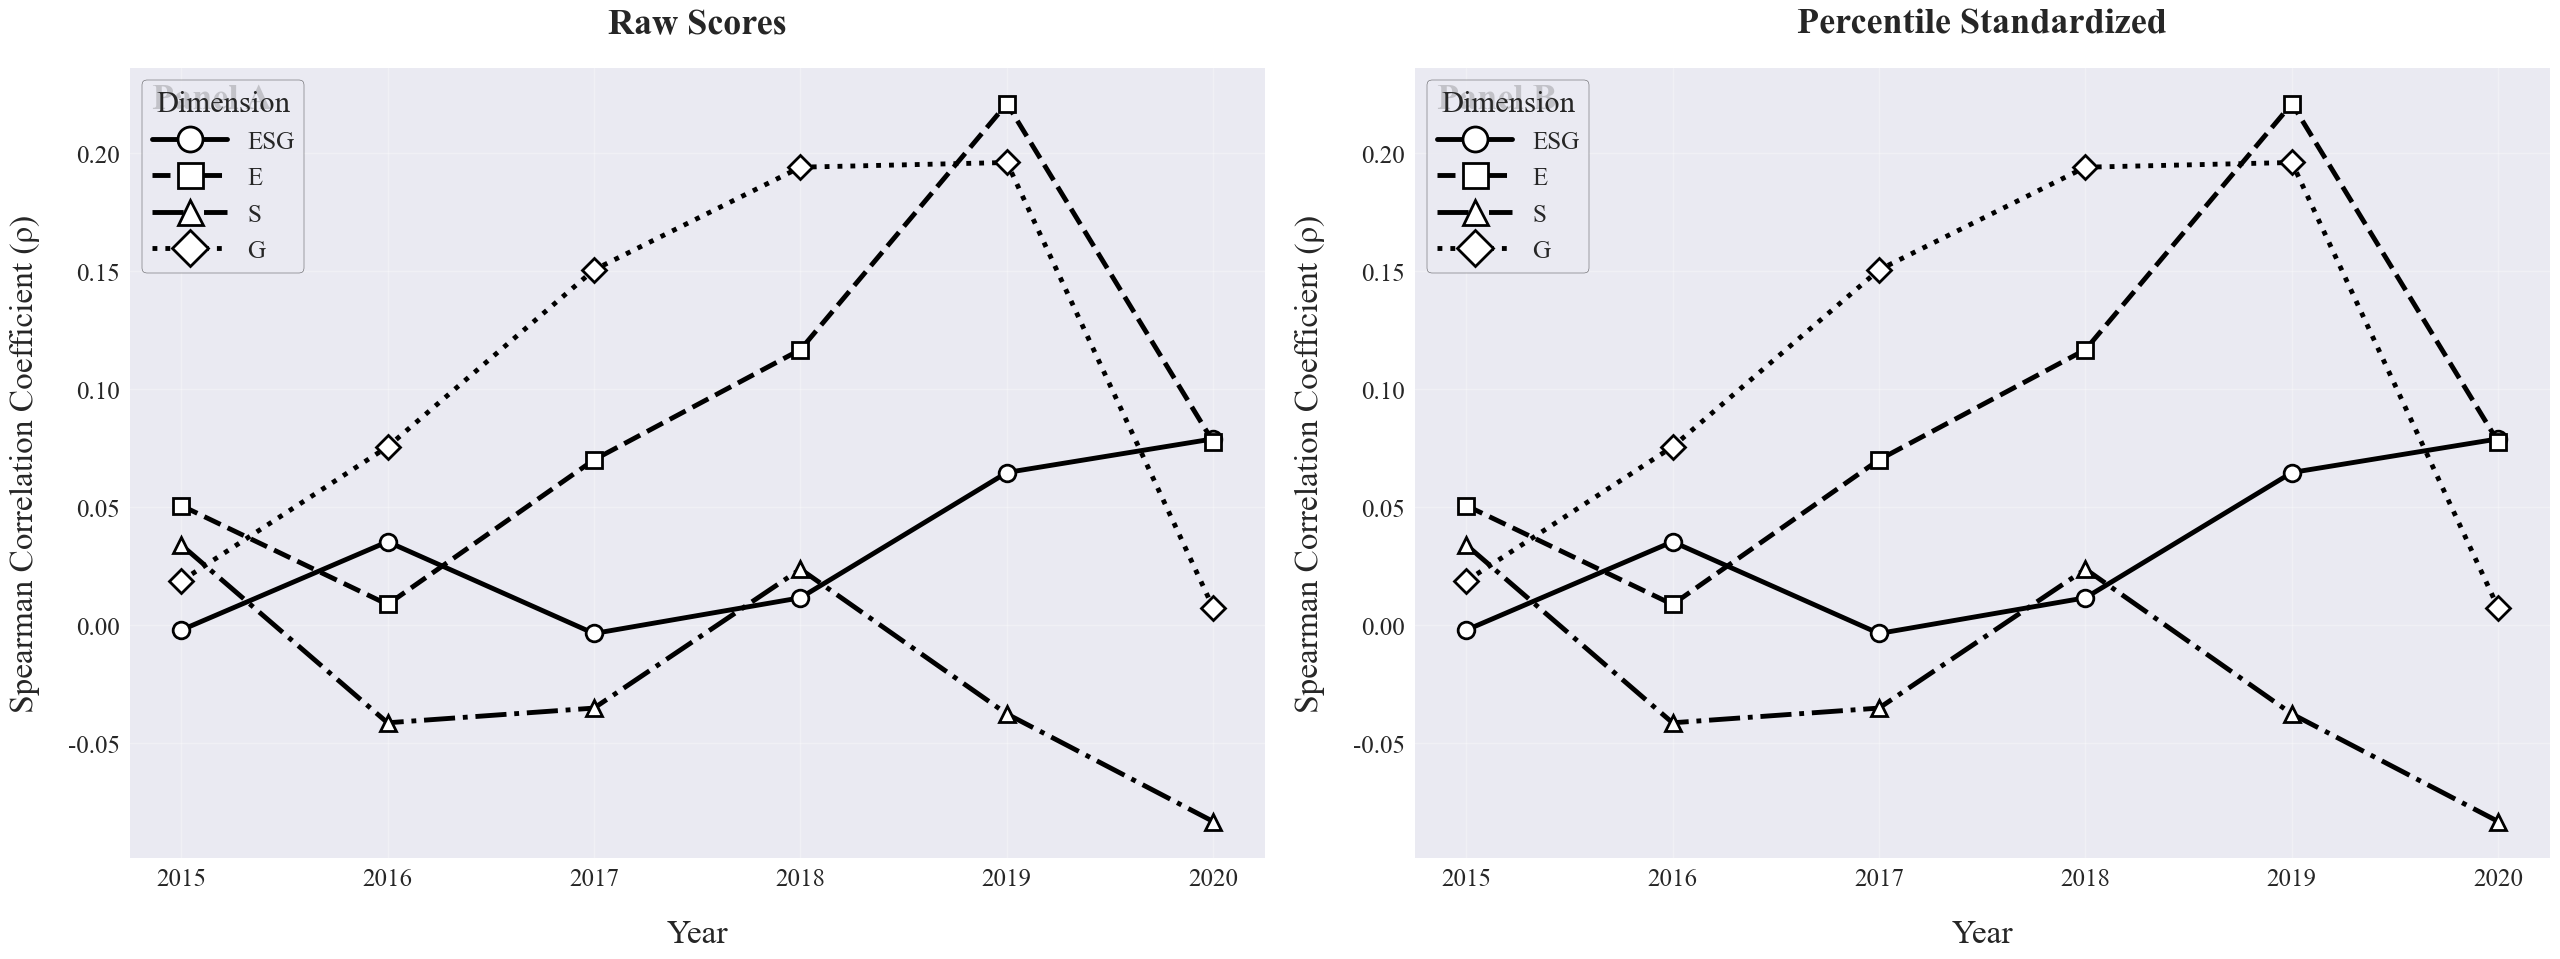

双面板对比图片已保存为: Spearman_Correlation_Comparison_ExtraLarge.png 和 Spearman_Correlation_Comparison_ExtraLarge.pdf


In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr

# 设置学术图表风格 - 进一步增大字体
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20  # 大幅增大基础字体
plt.rcParams['axes.labelsize'] = 22  # 大幅增大坐标轴标签字体
plt.rcParams['axes.titlesize'] = 24  # 大幅增大标题字体
plt.rcParams['legend.fontsize'] = 18  # 大幅增大图例字体
plt.rcParams['xtick.labelsize'] = 18  # 大幅增大横轴数字字体
plt.rcParams['ytick.labelsize'] = 18  # 大幅增大纵轴数字字体
plt.rcParams['legend.title_fontsize'] = 20  # 大幅增大图例标题字体

# 1. 先计算原始数据的相关性
print("正在计算原始数据相关性...")
dims = ["ESG", "E", "S", "G"]
results_year_raw = []

for year, sub in df.groupby("Year"):
    for dim in dims:
        cn = f"ESG_CNRDS" if dim == "ESG" else f"{dim}_CNRDS"  # 原始CNRDS得分
        cs = f"ESG_CSMAR" if dim == "ESG" else f"{dim}_CSMAR"  # 原始CSMAR得分
        
        # 去除空值
        temp = sub[[cn, cs]].dropna()
        if len(temp) >= 10:
            spearman = spearmanr(temp[cn], temp[cs])[0]
            pearson = pearsonr(temp[cn], temp[cs])[0]
        else:
            spearman, pearson = np.nan, np.nan
        results_year_raw.append({
            "Year": year, 
            "Dimension": dim, 
            "Spearman": spearman, 
            "Pearson": pearson, 
            "N": len(temp)
        })

corr_year_raw_df = pd.DataFrame(results_year_raw)
print("原始数据相关性计算完成!")

# 2. 确保百分位数据也存在（corr_year_df）
# 如果 corr_year_df 还不存在，也需要计算
if 'corr_year_df' not in locals():
    print("正在计算百分位数据相关性...")
    results_year_pct = []
    
    for year, sub in df.groupby("Year"):
        for dim in dims:
            cn = f"CNRDS_{dim}_pct"  # 百分位CNRDS得分
            cs = f"CSMAR_{dim}_pct"  # 百分位CSMAR得分
            
            # 去除空值
            temp = sub[[cn, cs]].dropna()
            if len(temp) >= 10:
                spearman = spearmanr(temp[cn], temp[cs])[0]
                pearson = pearsonr(temp[cn], temp[cs])[0]
            else:
                spearman, pearson = np.nan, np.nan
            results_year_pct.append({
                "Year": year, 
                "Dimension": dim, 
                "Spearman": spearman, 
                "Pearson": pearson, 
                "N": len(temp)
            })
    
    corr_year_df = pd.DataFrame(results_year_pct)
    print("百分位数据相关性计算完成!")

# 3. 创建双面板图表 - 大幅增大图形尺寸
print("正在生成图表...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 10))  # 大幅增大尺寸

# 定义样式
dimensions = corr_year_raw_df["Dimension"].unique()
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']

# Panel A: 原始数据相关性
for i, dim in enumerate(dimensions):
    subset = corr_year_raw_df[corr_year_raw_df["Dimension"] == dim].sort_values("Year")
    ax1.plot(subset["Year"], subset["Spearman"], 
             marker=markers[i], linestyle=line_styles[i], linewidth=3.5,  # 大幅增大线宽
             color='black', markersize=12,  # 大幅增大标记
             markeredgecolor='black', markerfacecolor='white',
             markeredgewidth=2.0, label=dim)  # 大幅增大标记边框

ax1.text(0.02, 0.98, 'Panel A', transform=ax1.transAxes, 
         fontsize=26, fontweight='bold', va='top')  # 大幅增大Panel标签字体
ax1.set_title("Raw Scores", fontweight='bold', pad=25, fontsize=26)
ax1.set_ylabel("Spearman Correlation Coefficient (ρ)", labelpad=20, fontsize=24)
ax1.set_xlabel("Year", labelpad=20, fontsize=24)
ax1.legend(title="Dimension", title_fontsize=22,  # 大幅增大图例标题
           frameon=True, edgecolor='black', handlelength=3.0, markerscale=1.5)
ax1.grid(True, alpha=0.3, linewidth=1.0)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Panel B: 百分位标准化数据相关性
for i, dim in enumerate(dimensions):
    subset = corr_year_df[corr_year_df["Dimension"] == dim].sort_values("Year")
    ax2.plot(subset["Year"], subset["Spearman"], 
             marker=markers[i], linestyle=line_styles[i], linewidth=3.5,
             color='black', markersize=12,
             markeredgecolor='black', markerfacecolor='white',
             markeredgewidth=2.0, label=dim)

ax2.text(0.02, 0.98, 'Panel B', transform=ax2.transAxes, 
         fontsize=26, fontweight='bold', va='top')
ax2.set_title("Percentile Standardized", fontweight='bold', pad=25, fontsize=26)
ax2.set_ylabel("Spearman Correlation Coefficient (ρ)", labelpad=20, fontsize=24)
ax2.set_xlabel("Year", labelpad=20, fontsize=24)
ax2.legend(title="Dimension", title_fontsize=22,
           frameon=True, edgecolor='black', handlelength=3.0, markerscale=1.5)
ax2.grid(True, alpha=0.3, linewidth=1.0)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('Spearman_Correlation_Comparison_ExtraLarge.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('Spearman_Correlation_Comparison_ExtraLarge.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

print("双面板对比图片已保存为: Spearman_Correlation_Comparison_ExtraLarge.png 和 Spearman_Correlation_Comparison_ExtraLarge.pdf")

C:\Users\Vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


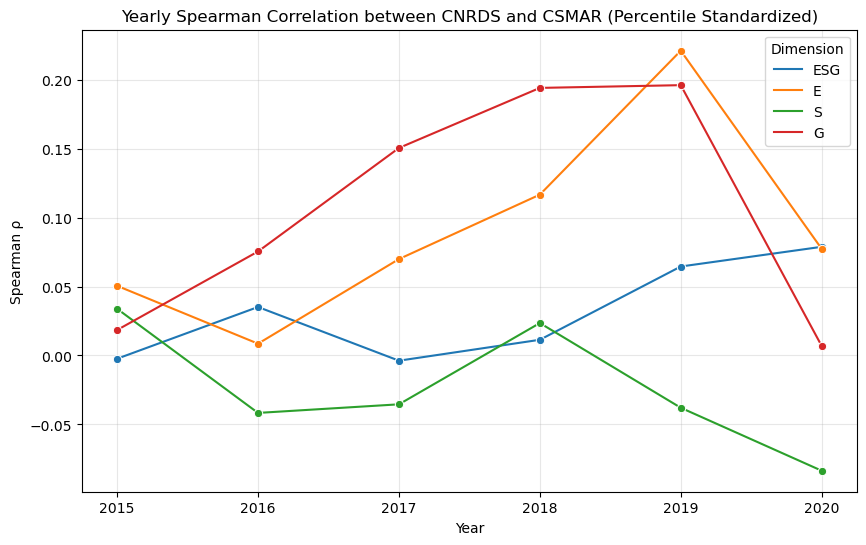

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=corr_year_df, x="Year", y="Spearman", hue="Dimension", marker="o")
plt.title("Yearly Spearman Correlation between CNRDS and CSMAR (Percentile Standardized)")
plt.ylabel("Spearman ρ")
plt.xlabel("Year")
plt.legend(title="Dimension")
plt.grid(alpha=0.3)
plt.show()


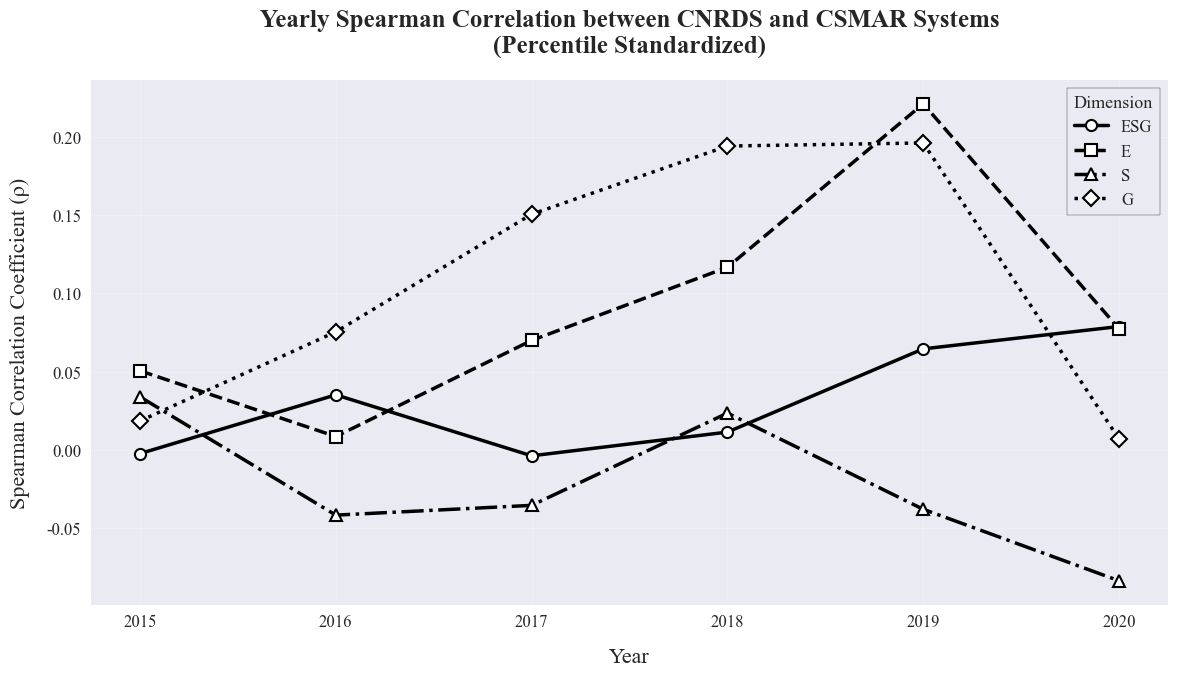

图片已保存为: Spearman_Correlation_Trends_BW.png 和 Spearman_Correlation_Trends_BW.pdf


In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# 设置学术图表风格
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.figure(figsize=(12, 7))

# 定义黑白样式
dimensions = corr_year_df["Dimension"].unique()
line_styles = ['-', '--', '-.', ':']  # 不同线型
markers = ['o', 's', '^', 'D']        # 不同标记

# 手动绘制每条线以确保黑白样式
for i, dim in enumerate(dimensions):
    subset = corr_year_df[corr_year_df["Dimension"] == dim].sort_values("Year")
    linestyle = line_styles[i % len(line_styles)]
    marker = markers[i % len(markers)]
    
    plt.plot(subset["Year"], subset["Spearman"], 
             marker=marker, linestyle=linestyle, linewidth=2.5,
             color='black', markersize=8, 
             markeredgecolor='black', markerfacecolor='white',
             markeredgewidth=1.5, label=dim)

plt.title("Yearly Spearman Correlation between CNRDS and CSMAR Systems\n(Percentile Standardized)", 
          fontweight='bold', pad=20)
plt.ylabel("Spearman Correlation Coefficient (ρ)", labelpad=12)
plt.xlabel("Year", labelpad=12)

# 优化图例
plt.legend(title="Dimension", title_fontsize=13,
           frameon=True, edgecolor='black', fancybox=False)

plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# 移除上方和右侧边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('Spearman_Correlation_Trends_BW.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('Spearman_Correlation_Trends_BW.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

print("图片已保存为: Spearman_Correlation_Trends_BW.png 和 Spearman_Correlation_Trends_BW.pdf")

#### Industry 

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr

dims = ["ESG", "E", "S", "G"]
MIN_N = 5  # 阈值

results = []

for (year, industry), sub in df.groupby(["Year", "CSMAR_Industry"]):
    for dim in dims:
        cn = f"CNRDS_{dim}_ind_pct"
        cs = f"CSMAR_{dim}_ind_pct"
        tmp = sub[[cn, cs]].dropna()
        n = len(tmp)
        
        # 如果样本量太小，直接写0
        if n < MIN_N or tmp[cn].nunique() < 2 or tmp[cs].nunique() < 2:
            rho, r = 0, 0
        else:
            rho = spearmanr(tmp[cn], tmp[cs]).correlation
            r = pearsonr(tmp[cn], tmp[cs]).statistic
        
        results.append({
            "Year": year,
            "Industry": industry,
            "Dimension": dim,
            "Spearman": rho,
            "Pearson": r,
            "N": n
        })

corr_ind_df = pd.DataFrame(results)
corr_ind_df.to_excel("industry_year_correlation_MIN5_zero.xlsx", index=False)
corr_ind_df


Year                                     Industry Dimension  Spearman  \
0    2015                                  Agriculture       ESG  0.000000   
1    2015                                  Agriculture         E  0.000000   
2    2015                                  Agriculture         S  0.000000   
3    2015                                  Agriculture         G  0.000000   
4    2015                                Air Transport       ESG -0.657143   
..    ...                                          ...       ...       ...   
899  2020  Transportation, Storage and Postal Services         G -0.175568   
900  2020                   Wholesale and Retail Trade       ESG -0.173931   
901  2020                   Wholesale and Retail Trade         E -0.376851   
902  2020                   Wholesale and Retail Trade         S -0.600000   
903  2020                   Wholesale and Retail Trade         G  0.142857   

      Pearson   N  
0    0.000000   2  
1    0.000000   2  
2    0.000000   2  
3    0.000000   2  
4   -0.666366   6  
..        ...  ..  
899 -0.175568  17  
900  0.050303   6  
901 -0.318293   6  
902 -0.679431   6  
903  0.134339   6  

[904 rows x 6 columns]

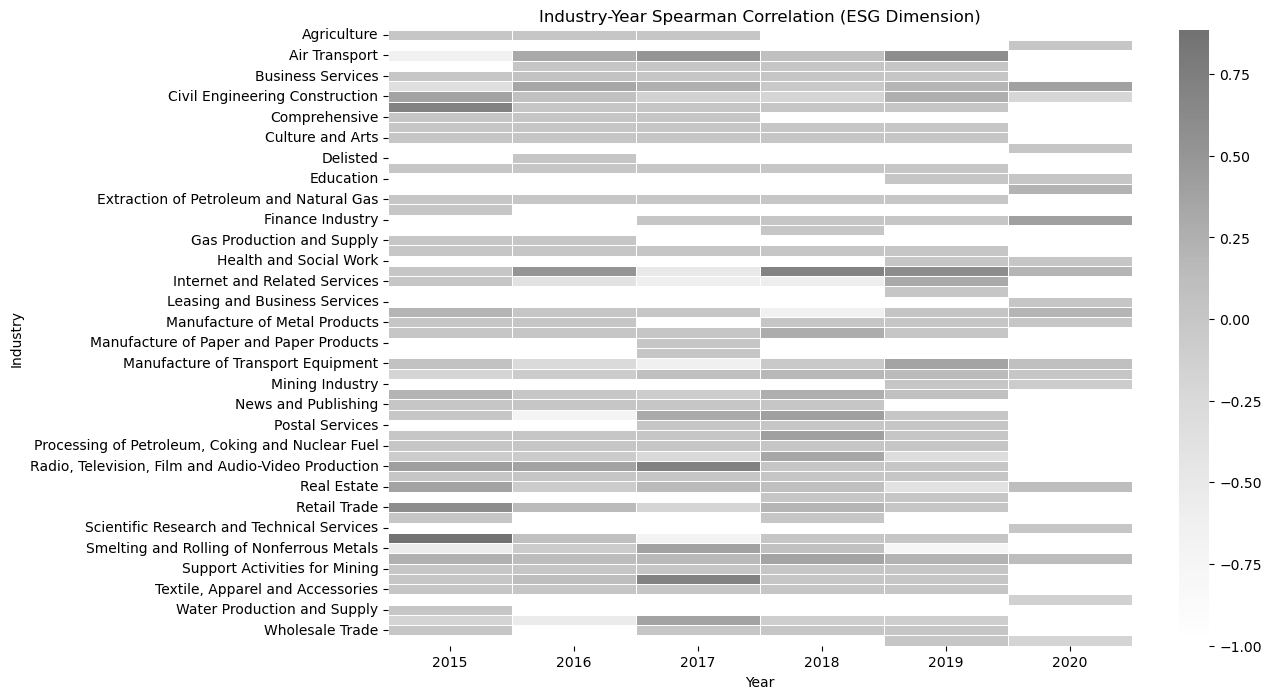

In [22]:
pivot = corr_ind_df[corr_ind_df["Dimension"] == "ESG"].pivot(index="Industry", columns="Year", values="Spearman")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap="Greys", center=0.5, linewidths=0.5, annot=False)
plt.title("Industry-Year Spearman Correlation (ESG Dimension)")
plt.xlabel("Year")
plt.ylabel("Industry")
plt.show()


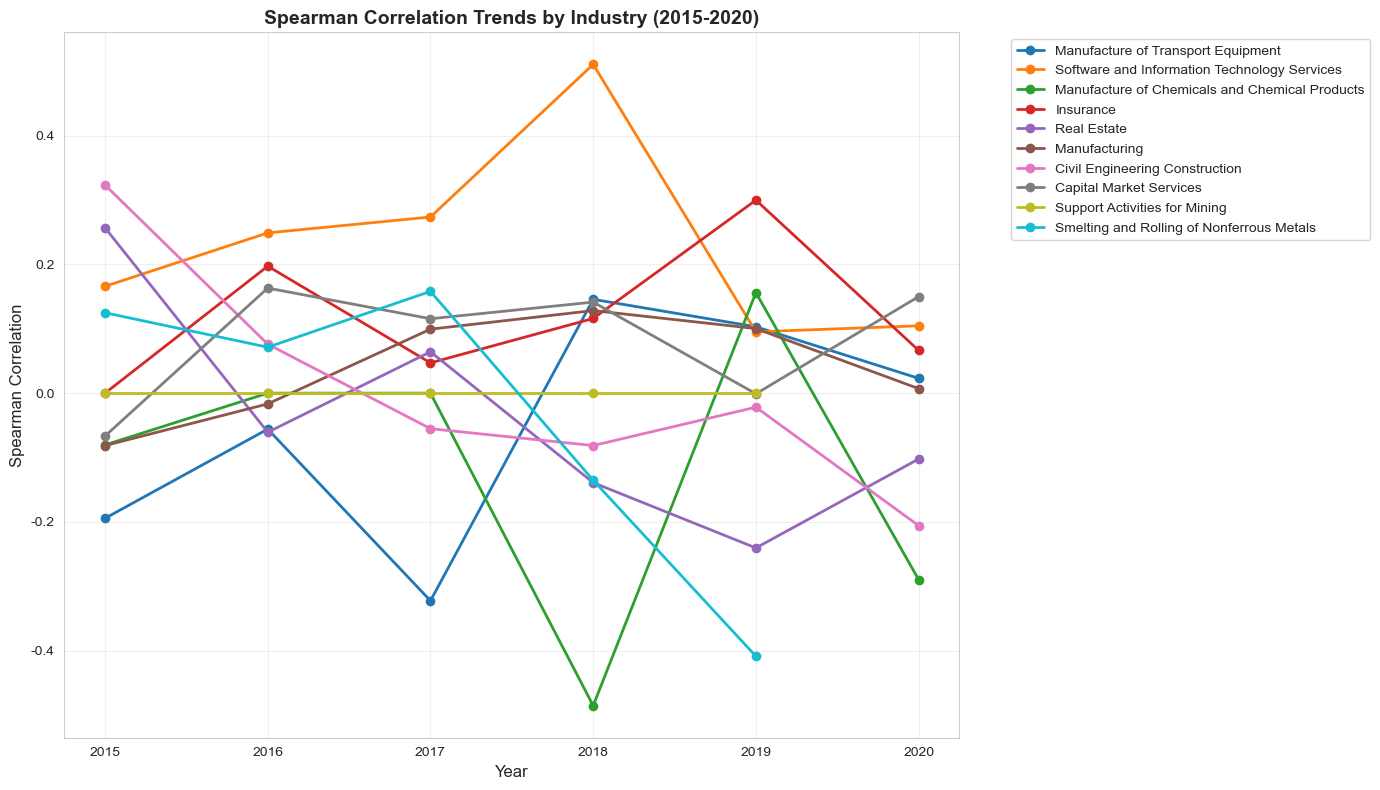

Year Range: 2015 - 2020


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置中文字体和图形样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 复制数据并处理
plot_data = corr_ind_df.copy()

# 删除Spearman为NaN的行
plot_data = plot_data.dropna(subset=['Spearman'])

# 创建图形
plt.figure(figsize=(14, 8))

# 获取产业列表（可以选择特定的产业或者全部）
# 选择数据量较多的产业来展示，避免图形过于拥挤
industry_counts = plot_data['Industry'].value_counts()
# 选择出现次数最多的前10个产业，你可以调整这个数字
top_industries = industry_counts.head(10).index

# 筛选数据
filtered_data = plot_data[plot_data['Industry'].isin(top_industries)]

# 按年份和产业计算平均Spearman相关系数
yearly_industry_avg = filtered_data.groupby(['Year', 'Industry'])['Spearman'].mean().reset_index()

# 绘制折线图
for industry in top_industries:
    industry_data = yearly_industry_avg[yearly_industry_avg['Industry'] == industry]
    plt.plot(industry_data['Year'], industry_data['Spearman'], 
             marker='o', linewidth=2, markersize=6, label=industry)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Spearman Correlation', fontsize=12)
plt.title('Spearman Correlation Trends by Industry (2015-2020)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 显示统计数据
print(f"Year Range: {plot_data['Year'].min()} - {plot_data['Year'].max()}")

In [24]:
# strong positive
strong_pos = corr_ind_df[corr_ind_df["Spearman"] > 0.5]
# strong negative
strong_neg = corr_ind_df[corr_ind_df["Spearman"] < -0.5]

print("🌿 Strong Positive Correlations (>0.5):")
display(strong_pos[["Year", "Industry", "Dimension", "Spearman", "N"]])

print("🔥 Strong Negative Correlations (<-0.5):")
display(strong_neg[["Year", "Industry", "Dimension", "Spearman", "N"]])


🌿 Strong Positive Correlations (>0.5):


Year                                           Industry Dimension  \
7    2015                                      Air Transport         G   
20   2015                            Coal Mining and Washing       ESG   
23   2015                            Coal Mining and Washing         G   
66   2015     Manufacture of Chemicals and Chemical Products         S   
110  2015  Radio, Television, Film and Audio-Video Produc...         S   
117  2015                                        Real Estate         E   
120  2015                                       Retail Trade       ESG   
122  2015                                       Retail Trade         S   
123  2015                                       Retail Trade         G   
128  2015             Smelting and Rolling of Ferrous Metals       ESG   
130  2015             Smelting and Rolling of Ferrous Metals         S   
131  2015             Smelting and Rolling of Ferrous Metals         G   
134  2015          Smelting and Rolling of Nonferrous Metals         S   
137  2015       Software and Information Technology Services         E   
159  2015                                    Water Transport         G   
169  2016                                      Air Transport         E   
247  2016                 Manufacture of Transport Equipment         G   
262  2016               Nonferrous Metal Mining and Dressing         S   
277  2016  Radio, Television, Film and Audio-Video Produc...         E   
301  2016       Software and Information Technology Services         E   
323  2016                                    Wholesale Trade         G   
331  2017                                      Air Transport         G   
438  2017      Production and Supply of Electricity and Heat         S   
440  2017  Radio, Television, Film and Audio-Video Produc...       ESG   
441  2017  Radio, Television, Film and Audio-Video Produc...         E   
465  2017       Software and Information Technology Services         E   
472  2017  Telecommunications, Broadcasting and Satellite...       ESG   
475  2017  Telecommunications, Broadcasting and Satellite...         G   
540  2018                                          Insurance       ESG   
541  2018                                          Insurance         E   
562  2018                 Manufacture of Transport Equipment         S   
578  2018               Nonferrous Metal Mining and Dressing         S   
595  2018      Production and Supply of Electricity and Heat         G   
615  2018                                       Retail Trade         G   
623  2018             Smelting and Rolling of Ferrous Metals         G   
629  2018       Software and Information Technology Services         E   
630  2018       Software and Information Technology Services         S   
652  2019                                      Air Transport       ESG   
708  2019                                          Insurance       ESG   
711  2019                                          Insurance         G   
714  2019                      Internet and Related Services         S   
722  2019     Manufacture of Chemicals and Chemical Products         S   
731  2019       Manufacture of Non-metallic Mineral Products         G   
797  2019       Software and Information Technology Services         E   
815  2019                                    Water Transport         G   
882  2020                                    Mining Industry         S   

     Spearman   N  
7    0.608760   6  
20   0.714286   6  
23   0.771429   6  
66   0.579771   6  
110  0.700000   5  
117  0.590268  12  
120  0.600000   5  
122  0.900000   5  
123  0.900000   5  
128  0.885714   6  
130  0.811679   6  
131  0.714286   6  
134  0.785714   8  
137  0.693023  11  
159  0.678571   7  
169  0.794461   6  
247  0.577411   9  
262  0.615587   5  
277  0.695608   6  
301  0.639164  16  
323  0.527046   5  
331  1.000000   5  
438  0.515152  10  
440  0.714286   6  
441  0.695608   6  
465  0

🔥 Strong Negative Correlations (<-0.5):


Year                                           Industry Dimension  \
4    2015                                      Air Transport       ESG   
65   2015     Manufacture of Chemicals and Chemical Products         E   
95   2015               Nonferrous Metal Mining and Dressing         G   
121  2015                                       Retail Trade         E   
132  2015          Smelting and Rolling of Nonferrous Metals       ESG   
170  2016                                      Air Transport         S   
179  2016                                  Business Services         G   
231  2016                      Internet and Related Services         G   
246  2016                 Manufacture of Transport Equipment         S   
260  2016               Nonferrous Metal Mining and Dressing       ESG   
289  2016                                       Retail Trade         E   
294  2016             Smelting and Rolling of Ferrous Metals         S   
310  2016  Telecommunications, Broadcasting and Satellite...         S   
316  2016                                    Water Transport       ESG   
320  2016                                    Wholesale Trade       ESG   
384  2017                      Internet and Related Services       ESG   
387  2017                      Internet and Related Services         G   
404  2017                 Manufacture of Transport Equipment       ESG   
421  2017               Nonferrous Metal Mining and Dressing         E   
456  2017             Smelting and Rolling of Ferrous Metals       ESG   
458  2017             Smelting and Rolling of Ferrous Metals         S   
542  2018                                          Insurance         S   
544  2018                      Internet and Related Services       ESG   
548  2018     Manufacture of Chemicals and Chemical Products       ESG   
550  2018     Manufacture of Chemicals and Chemical Products         S   
579  2018               Nonferrous Metal Mining and Dressing         G   
606  2018                                        Real Estate         S   
621  2018             Smelting and Rolling of Ferrous Metals         E   
622  2018             Smelting and Rolling of Ferrous Metals         S   
715  2019                      Internet and Related Services         G   
729  2019       Manufacture of Non-metallic Mineral Products         E   
778  2019                                        Real Estate         S   
792  2019          Smelting and Rolling of Nonferrous Metals       ESG   
793  2019          Smelting and Rolling of Nonferrous Metals         E   
799  2019       Software and Information Technology Services         G   
813  2019                                    Water Transport         E   
835  2020                     Civil Engineering Construction         G   
858  2020                                          Insurance         S   
865  2020     Manufacture of Chemicals and Chemical Products         E   
902  2020                         Wholesale and Retail Trade         S   

     Spearman   N  
4   -0.657143   6  
65  -0.608760   6  
95  -0.892857   7  
121 -0.707107   5  
132 -0.547619   8  
170 -0.714286   6  
179 -1.000000   5  
231 -0.974679   5  
246 -0.594147   9  
260 -0.718185   5  
289 -0.777542   6  
294 -0.579771   6  
310 -0.564288   5  
316 -0.542857   6  
320 -1.000000   5  
384 -0.607143   7  
387 -0.792825   7  
404 -0.616667   9  
421 -0.700000   5  
456 -0.700000   5  
458 -0.800000   5  
542 -0.700000   5  
544 -0.600000   5  
548 -0.657143   6  
550 -0.828571   6  
579 -0.615587   5  
606 -0.542040  15  
621 -0.600000   5  
622 -0.800000   5  
715 -0.900000   5  
729 -0.714286   7  
778 -0.645067  16  
792 -0.766667   9  
793 -0.569043   9  
799 -0.640256  10  
813 -0.700000   5  
835 -0.683333   9  
858 -0.542857   6  
865 -0.700000   5  
902 -0.600000   6

In [25]:
# Strong Positive 分析
print("🌿 Strong Positive Correlations - Industry Dimension Count:")

# 按Year和Industry分组，计算每个行业的Dimension数量和具体维度
strong_pos_summary = strong_pos.groupby(['Year', 'Industry']).agg({
    'Dimension': ['count', lambda x: list(x.unique())]
}).reset_index()

strong_pos_summary.columns = ['Year', 'Industry', 'Dimension_Count', 'Dimensions']
strong_pos_summary = strong_pos_summary.sort_values(['Year', 'Dimension_Count'], ascending=[True, False])

display(strong_pos_summary)

print("\n" + "="*80 + "\n")

# Strong Negative 分析
print("🔥 Strong Negative Correlations - Industry Dimension Count:")

if not strong_neg.empty:
    strong_neg_summary = strong_neg.groupby(['Year', 'Industry']).agg({
        'Dimension': ['count', lambda x: list(x.unique())]
    }).reset_index()
    
    strong_neg_summary.columns = ['Year', 'Industry', 'Dimension_Count', 'Dimensions']
    strong_neg_summary = strong_neg_summary.sort_values(['Year', 'Dimension_Count'], ascending=[True, False])
    
    display(strong_neg_summary)
else:
    print("No strong negative correlations found.")

🌿 Strong Positive Correlations - Industry Dimension Count:


Year                                           Industry  Dimension_Count  \
5   2015                                       Retail Trade                3   
6   2015             Smelting and Rolling of Ferrous Metals                3   
1   2015                            Coal Mining and Washing                2   
0   2015                                      Air Transport                1   
2   2015     Manufacture of Chemicals and Chemical Products                1   
3   2015  Radio, Television, Film and Audio-Video Produc...                1   
4   2015                                        Real Estate                1   
7   2015          Smelting and Rolling of Nonferrous Metals                1   
8   2015       Software and Information Technology Services                1   
9   2015                                    Water Transport                1   
10  2016                                      Air Transport                1   
11  2016                 Manufacture of Transport Equipment                1   
12  2016               Nonferrous Metal Mining and Dressing                1   
13  2016  Radio, Television, Film and Audio-Video Produc...                1   
14  2016       Software and Information Technology Services                1   
15  2016                                    Wholesale Trade                1   
18  2017  Radio, Television, Film and Audio-Video Produc...                2   
20  2017  Telecommunications, Broadcasting and Satellite...                2   
16  2017                                      Air Transport                1   
17  2017      Production and Supply of Electricity and Heat                1   
19  2017       Software and Information Technology Services                1   
21  2018                                          Insurance                2   
27  2018       Software and Information Technology Services                2   
22  2018                 Manufacture of Transport Equipment                1   
23  2018               Nonferrous Metal Mining and Dressing                1   
24  2018      Production and Supply of Electricity and Heat                1   
25  2018                                       Retail Trade                1   
26  2018             Smelting and Rolling of Ferrous Metals                1   
29  2019                                          Insurance                2   
28  2019                                      Air Transport                1   
30  2019                      Internet and Related Services                1   
31  2019     Manufacture of Chemicals and Chemical Products                1   
32  2019       Manufacture of Non-metallic Mineral Products                1   
33  2019       Software and Information Technology Services                1   
34  2019                                    Water Transport                1   
35  2020                                    Mining Industry                1   

     Dimensions  
5   [ESG, S, G]  
6   [ESG, S, G]  
1      [ESG, G]  
0           [G]  
2           [S]  
3           [S]  
4           [E]  
7           [S]  
8           [E]  
9           [G]  
10          [E]  
11          [G]  
12          [S]  
13          [E]  
14          [E]  
15          [G]  
18     [ESG, E]  
20     [ESG, G]  
16          [G]  
17          [S]  
19          [E]  
21     [ESG, E]  
27       [E, S]  
22          [S]  
23          [S]  
24          [G]  
25          [G]  
26          [G]  
29     [ESG, G]  
28        [ESG]  
30          [S]  
31          [S]  
32          [G]  
33          [E]  
34          [G]  
35          [S]



🔥 Strong Negative Correlations - Industry Dimension Count:


Year                                           Industry  Dimension_Count  \
0   2015                                      Air Transport                1   
1   2015     Manufacture of Chemicals and Chemical Products                1   
2   2015               Nonferrous Metal Mining and Dressing                1   
3   2015                                       Retail Trade                1   
4   2015          Smelting and Rolling of Nonferrous Metals                1   
5   2016                                      Air Transport                1   
6   2016                                  Business Services                1   
7   2016                      Internet and Related Services                1   
8   2016                 Manufacture of Transport Equipment                1   
9   2016               Nonferrous Metal Mining and Dressing                1   
10  2016                                       Retail Trade                1   
11  2016             Smelting and Rolling of Ferrous Metals                1   
12  2016  Telecommunications, Broadcasting and Satellite...                1   
13  2016                                    Water Transport                1   
14  2016                                    Wholesale Trade                1   
15  2017                      Internet and Related Services                2   
18  2017             Smelting and Rolling of Ferrous Metals                2   
16  2017                 Manufacture of Transport Equipment                1   
17  2017               Nonferrous Metal Mining and Dressing                1   
21  2018     Manufacture of Chemicals and Chemical Products                2   
24  2018             Smelting and Rolling of Ferrous Metals                2   
19  2018                                          Insurance                1   
20  2018                      Internet and Related Services                1   
22  2018               Nonferrous Metal Mining and Dressing                1   
23  2018                                        Real Estate                1   
28  2019          Smelting and Rolling of Nonferrous Metals                2   
25  2019                      Internet and Related Services                1   
26  2019       Manufacture of Non-metallic Mineral Products                1   
27  2019                                        Real Estate                1   
29  2019       Software and Information Technology Services                1   
30  2019                                    Water Transport                1   
31  2020                     Civil Engineering Construction                1   
32  2020                                          Insurance                1   
33  2020     Manufacture of Chemicals and Chemical Products                1   
34  2020                         Wholesale and Retail Trade                1   

   Dimensions  
0       [ESG]  
1         [E]  
2         [G]  
3         [E]  
4       [ESG]  
5         [S]  
6         [G]  
7         [G]  
8         [S]  
9       [ESG]  
10        [E]  
11        [S]  
12        [S]  
13      [ESG]  
14      [ESG]  
15   [ESG, G]  
18   [ESG, S]  
16      [ESG]  
17        [E]  
21   [ESG, S]  
24     [E, S]  
19        [S]  
20      [ESG]  
22        [G]  
23        [S]  
28   [ESG, E]  
25        [G]  
26        [E]  
27        [S]  
29        [G]  
30        [E]  
31        [G]  
32        [S]  
33        [E]  
34        [S]

In [26]:
# 更详细的年度统计 - Strong Positive
print("Strong Positive - Detailed Yearly Industry Analysis:")
yearly_detailed = strong_pos_summary.groupby('Year').agg({
    'Industry': ['count', lambda x: list(x)],
    'Dimension_Count': 'sum'
}).reset_index()

yearly_detailed.columns = ['Year', 'Unique_Industries_Count', 'Industries_List', 'Total_Dimensions_Count']
display(yearly_detailed)

print("\n" + "="*80 + "\n")

# Strong Negative 的详细统计（如果有数据）
if not strong_neg.empty:
    print("Strong Negative - Detailed Yearly Industry Analysis:")
    yearly_detailed_neg = strong_neg_summary.groupby('Year').agg({
        'Industry': ['count', lambda x: list(x)],
        'Dimension_Count': 'sum'
    }).reset_index()
    
    yearly_detailed_neg.columns = ['Year', 'Unique_Industries_Count', 'Industries_List', 'Total_Dimensions_Count']
    display(yearly_detailed_neg)

Strong Positive - Detailed Yearly Industry Analysis:


Year  Unique_Industries_Count  \
0  2015                       10   
1  2016                        6   
2  2017                        5   
3  2018                        7   
4  2019                        7   
5  2020                        1   

                                     Industries_List  Total_Dimensions_Count  
0  [Retail Trade, Smelting and Rolling of Ferrous...                      15  
1  [Air Transport, Manufacture of Transport Equip...                       6  
2  [Radio, Television, Film and Audio-Video Produ...                       7  
3  [Insurance, Software and Information Technolog...                       9  
4  [Insurance, Air Transport, Internet and Relate...                       8  
5                                  [Mining Industry]                       1



Strong Negative - Detailed Yearly Industry Analysis:


Year  Unique_Industries_Count  \
0  2015                        5   
1  2016                       10   
2  2017                        4   
3  2018                        6   
4  2019                        6   
5  2020                        4   

                                     Industries_List  Total_Dimensions_Count  
0  [Air Transport, Manufacture of Chemicals and C...                       5  
1  [Air Transport, Business Services, Internet an...                      10  
2  [Internet and Related Services, Smelting and R...                       6  
3  [Manufacture of Chemicals and Chemical Product...                       8  
4  [Smelting and Rolling of Nonferrous Metals, In...                       7  
5  [Civil Engineering Construction, Insurance, Ma...                       4

In [27]:
industry_avg = (
    corr_ind_df.groupby(["Industry", "Dimension"])["Spearman"]
    .mean()
    .reset_index()
    .pivot(index="Industry", columns="Dimension", values="Spearman")
)

industry_avg = industry_avg[industry_avg["ESG"] > 0].sort_values("ESG", ascending=False)
display(industry_avg.round(3))


Dimension                                               E    ESG      G      S
Industry                                                                      
Radio, Television, Film and Audio-Video Production  0.278  0.299  0.151  0.219
Insurance                                           0.041  0.250  0.311 -0.117
Electricity, Heat, Gas and Water Supply             0.462  0.217 -0.433  0.051
Software and Information Technology Services        0.623  0.208 -0.171  0.273
Air Transport                                      -0.040  0.169  0.253 -0.214
Telecommunications, Broadcasting and Satellite ... -0.033  0.160  0.213 -0.013
Retail Trade                                       -0.286  0.149  0.429  0.310
Coal Mining and Washing                            -0.017  0.143  0.154 -0.046
Capital Market Services                            -0.102  0.132  0.208  0.097
Finance Industry                                    0.083  0.100 -0.030  0.003
Monetary Financial Services                         0.011  0.090 -0.091  0.041
Processing of Agricultural and Sideline Food        0.000  0.080 -0.092  0.080
Manufacture of Non-metallic Mineral Products       -0.237  0.057  0.157  0.079
Smelting and Rolling of Ferrous Metals             -0.165  0.054  0.449 -0.274
Real Estate                                         0.146  0.044 -0.056 -0.281
Civil Engineering Construction                      0.170  0.023 -0.138 -0.031
Manufacturing                                       0.038  0.019  0.152 -0.051
Business Services                                   0.057  0.010 -0.200 -0.092

In [28]:
dim_avg = corr_ind_df.groupby("Dimension")["Spearman"].mean().round(3)
print("Average Spearman Correlation by Dimension:")
print(dim_avg)


Average Spearman Correlation by Dimension:
Dimension
E      0.003
ESG    0.024
G      0.026
S      0.006
Name: Spearman, dtype: float64


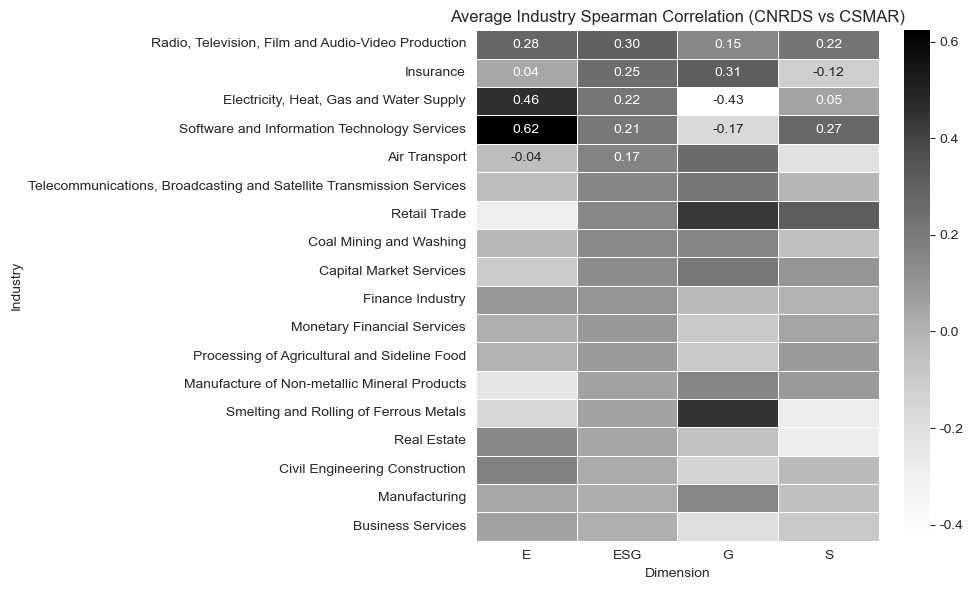

In [29]:
industry_avg_filled = industry_avg.fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(industry_avg_filled, cmap="Greys", linewidths=0.5, annot=True, fmt=".2f")
plt.title("Average Industry Spearman Correlation (CNRDS vs CSMAR)")
plt.xlabel("Dimension")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


#### ANOVA: Prove the Difference is Consistent

In [31]:
print(df.columns)

Index(['Year', 'Date', 'Code', 'Name', 'FullName', 'CSMAR_Industry',
       'CSMAR_Industry_1', 'CSMAR_Industry_2', 'ESG_CSMAR', 'E_CSMAR',
       'S_CSMAR', 'G_CSMAR', 'ESGManagementscore', 'ESGRiskScore',
       'SpecialNotes', 'ESG_CNRDS', 'ESG_CNRDS_rank', 'E_CNRDS',
       'E_CNRDS_rank', 'S_CNRDS', 'S_CNRDS_rank', 'G_CNRDS', 'G_CNRDS_rank',
       'CNRDS_ESG_pct', 'CSMAR_ESG_pct', 'CNRDS_E_pct', 'CSMAR_E_pct',
       'CNRDS_S_pct', 'CSMAR_S_pct', 'CNRDS_G_pct', 'CSMAR_G_pct',
       'CSMAR_ESG_ind_pct', 'CSMAR_E_ind_pct', 'CSMAR_S_ind_pct',
       'CSMAR_G_ind_pct', 'CNRDS_ESG_ind_pct', 'CNRDS_E_ind_pct',
       'CNRDS_S_ind_pct', 'CNRDS_G_ind_pct', 'CSMAR_ESG_year_pct',
       'CSMAR_E_year_pct', 'CSMAR_S_year_pct', 'CSMAR_G_year_pct',
       'CNRDS_ESG_year_pct', 'CNRDS_E_year_pct', 'CNRDS_S_year_pct',
       'CNRDS_G_year_pct', 'CNRDS_ESG_MM', 'CSMAR_ESG_MM', 'CNRDS_E_MM',
       'CSMAR_E_MM', 'CNRDS_S_MM', 'CSMAR_S_MM', 'CNRDS_G_MM', 'CSMAR_G_MM',
       'CSMAR_ESG_ind_MM', '

#### Difference Effect Model
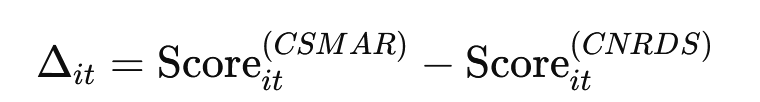
If this is significant different from zero.   

In [59]:
print(df.columns)

Index(['Year', 'Date', 'Code', 'Name', 'FullName', 'CSMAR_Industry',
       'CSMAR_Industry_1', 'CSMAR_Industry_2', 'ESG_CSMAR', 'E_CSMAR',
       'S_CSMAR', 'G_CSMAR', 'ESGManagementscore', 'ESGRiskScore',
       'SpecialNotes', 'ESG_CNRDS', 'ESG_CNRDS_rank', 'E_CNRDS',
       'E_CNRDS_rank', 'S_CNRDS', 'S_CNRDS_rank', 'G_CNRDS', 'G_CNRDS_rank',
       'CNRDS_ESG_pct', 'CSMAR_ESG_pct', 'CNRDS_E_pct', 'CSMAR_E_pct',
       'CNRDS_S_pct', 'CSMAR_S_pct', 'CNRDS_G_pct', 'CSMAR_G_pct',
       'CSMAR_ESG_ind_pct', 'CSMAR_E_ind_pct', 'CSMAR_S_ind_pct',
       'CSMAR_G_ind_pct', 'CNRDS_ESG_ind_pct', 'CNRDS_E_ind_pct',
       'CNRDS_S_ind_pct', 'CNRDS_G_ind_pct', 'CSMAR_ESG_year_pct',
       'CSMAR_E_year_pct', 'CSMAR_S_year_pct', 'CSMAR_G_year_pct',
       'CNRDS_ESG_year_pct', 'CNRDS_E_year_pct', 'CNRDS_S_year_pct',
       'CNRDS_G_year_pct', 'CNRDS_ESG_MM', 'CSMAR_ESG_MM', 'CNRDS_E_MM',
       'CSMAR_E_MM', 'CNRDS_S_MM', 'CSMAR_S_MM', 'CNRDS_G_MM', 'CSMAR_G_MM',
       'CSMAR_ESG_ind_MM', '

**Difference Test on Data**  
If this is significant different from zero.   
Conduct paired-sample t-tests and Wilcoxon signed-rank tests to compare firm-level scores between the CSMAR and CNRDS ESG rating systems.
* Statistically Significnat: The results show that mean differences across all four dimensions (E, S, G, and overall ESG) are highly significant (p < 0.001).
    * Specifically, CSMAR assigns substantially higher scores than CNRDS in the overall ESG dimension (mean difference = +20.05) and in the Environmental dimension (mean difference = +11.71), while it assigns significantly lower scores in the Governance dimension (mean difference = −15.54) and slightly lower scores in the Social dimension (mean difference = −3.18).
* These results indicate that the two ESG rating systems exhibit systematic scoring discrepancies even after normalization, reflecting distinct methodological orientations.

In [62]:
import pandas as pd
from scipy import stats

# 四个维度
dims = ["ESG", "E", "S", "G"]
results = []

for dim in dims:
    print(f"\n--- {dim} ---")

    # 提取对应维度标准化后的得分列
    df_sub = df[[f"{dim}_CSMAR", f"{dim}_CNRDS"]].dropna()

    # 计算差值
    diff = df_sub[f"{dim}_CSMAR"] - df_sub[f"{dim}_CNRDS"]

    # 配对样本 t 检验
    t_stat, p_val = stats.ttest_rel(df_sub[f"{dim}_CSMAR"], df_sub[f"{dim}_CNRDS"])

    # Wilcoxon 检验（非参数，防止分布非正态）
    try:
        w_stat, w_pval = stats.wilcoxon(df_sub[f"{dim}_CSMAR"], df_sub[f"{dim}_CNRDS"])
    except ValueError:
        w_stat, w_pval = (None, None)

    results.append({
        "Dimension": dim,
        "Mean(CSMAR - CNRDS)": diff.mean(),
        "Std.Dev": diff.std(),
        "Paired t-stat": t_stat,
        "t-test p-value": p_val,
        "Wilcoxon p-value": w_pval
    })

# 结果表格
result_table = pd.DataFrame(results)
print("\nFirm-level paired test between ESG rating systems (standardized percentile scores)\n")
display(result_table)



--- ESG ---

--- E ---

--- S ---

--- G ---

Firm-level paired test between ESG rating systems (standardized percentile scores)



Dimension  Mean(CSMAR - CNRDS)    Std.Dev  Paired t-stat  t-test p-value  \
0       ESG            20.047270  11.186488      75.672340    0.000000e+00   
1         E            11.709757  17.393566      28.427255   6.625652e-147   
2         S            -3.181554  20.043752      -6.702486    2.740527e-11   
3         G           -15.544725  17.616434     -37.259817   3.423736e-225   

   Wilcoxon p-value  
0     5.867035e-279  
1     1.167812e-149  
2      5.180138e-23  
3     2.299000e-170

**Difference Test on Data After Standardized**  
This is significant different from zero.   
Conduct paired-sample t-tests and Wilcoxon signed-rank tests to compare firm-level standardized percentile scores (0–100) between the CSMAR and CNRDS ESG rating systems.
* Statistically Insignificnat: The results show that mean differences across all four dimensions (E, S, G, and overall ESG) are statistically insignificant (p ≈ 1.0), and the average score differences are near zero.
* This indicates that after normalization, the two ESG rating systems yield nearly identical assessments for the same firms.

In [65]:
import pandas as pd
from scipy import stats

# 四个维度
dims = ["ESG", "E", "S", "G"]
results = []

for dim in dims:
    print(f"\n--- {dim} ---")

    # 提取对应维度标准化后的得分列
    df_sub = df[[f"CSMAR_{dim}_pct", f"CNRDS_{dim}_pct"]].dropna()

    # 计算差值
    diff = df_sub[f"CSMAR_{dim}_pct"] - df_sub[f"CNRDS_{dim}_pct"]

    # 配对样本 t 检验
    t_stat, p_val = stats.ttest_rel(df_sub[f"CSMAR_{dim}_pct"], df_sub[f"CNRDS_{dim}_pct"])

    # Wilcoxon 检验（非参数，防止分布非正态）
    try:
        w_stat, w_pval = stats.wilcoxon(df_sub[f"CSMAR_{dim}_pct"], df_sub[f"CNRDS_{dim}_pct"])
    except ValueError:
        w_stat, w_pval = (None, None)

    results.append({
        "Dimension": dim,
        "Mean(CSMAR - CNRDS)": diff.mean(),
        "Std.Dev": diff.std(),
        "Paired t-stat": t_stat,
        "t-test p-value": p_val,
        "Wilcoxon p-value": w_pval
    })

# 结果表格
result_table = pd.DataFrame(results)
print("\nFirm-level paired test between ESG rating systems (standardized percentile scores)\n")
display(result_table)



--- ESG ---

--- E ---

--- S ---

--- G ---

Firm-level paired test between ESG rating systems (standardized percentile scores)



Dimension  Mean(CSMAR - CNRDS)   Std.Dev  Paired t-stat  t-test p-value  \
0       ESG         4.981371e-19  0.401858   5.234221e-17             1.0   
1         E        -1.992548e-18  0.389254  -2.161482e-16             1.0   
2         S         4.483234e-18  0.413270   4.580712e-16             1.0   
3         G         1.245343e-18  0.386008   1.362286e-16             1.0   

   Wilcoxon p-value  
0          0.468202  
1          0.276757  
2          0.835673  
3          0.569776

**Difference According to Year**  
No significant difference. 

* Paired-sample t-tests and Wilcoxon signed-rank tests based on year-standardized percentile scores show no significant differences between the CSMAR and CNRDS ESG ratings across all years (2015–2020) and all dimensions (E, S, G, and overall ESG), with p-values equal to 1.0.
* This indicates that after normalization by year, the two ESG rating systems exhibit highly stable and consistent scoring patterns over time.
* Therefore, temporal variation is not a major source of divergence between the two systems; instead, rating discrepancies primarily originate from industry-level heterogeneity rather than year-to-year methodological changes.

In [325]:
import pandas as pd
from scipy import stats
import numpy as np

# 四个维度
DIMS = ["ESG", "E", "S", "G"]
YEAR_COL = "Year"

def per_year_tests_both(df, dim, year_col=YEAR_COL):
    """对单个维度同时计算原始数据和百分位数据的配对差异检验"""
    results = []
    
    # 两种数据类型
    data_types = [
        ("Raw", 
         f"ESG_CSMAR" if dim == "ESG" else f"{dim}_CSMAR",
         f"ESG_CNRDS" if dim == "ESG" else f"{dim}_CNRDS"),
        ("Percentile",
         f"CSMAR_{dim}_year_pct",
         f"CNRDS_{dim}_year_pct")
    ]
    
    for data_type, c_col, n_col in data_types:
        use = df[[year_col, c_col, n_col]].dropna().copy()
        use["diff"] = use[c_col] - use[n_col]

        def _agg(g):
            x = g["diff"].values
            n = len(x)
            mean_ = float(np.mean(x))
            std_  = float(np.std(x, ddof=1)) if n > 1 else np.nan

            try:
                t_stat, p_t = stats.ttest_1samp(x, popmean=0.0)
            except Exception:
                t_stat, p_t = (np.nan, np.nan)

            try:
                if np.allclose(x, 0) or n < 5:
                    w_stat, p_w = (np.nan, np.nan)
                else:
                    w_stat, p_w = stats.wilcoxon(x)
            except Exception:
                w_stat, p_w = (np.nan, np.nan)

            return pd.Series({
                "n": n,
                "mean_diff(CSMAR-CNRDS)": mean_,
                "std_diff": std_,
                "t_stat": t_stat,
                "t_p": p_t,
                "wilcoxon_p": p_w
            })

        out = use.groupby(year_col, as_index=False).apply(_agg).reset_index(drop=True)
        out["abs_mean_diff"] = out["mean_diff(CSMAR-CNRDS)"].abs()
        out.insert(0, "DataType", data_type)
        out.insert(0, "Dimension", dim)
        results.append(out)
    
    return pd.concat(results, ignore_index=True)

# === 主流程：同时计算两种数据类型的差异检验 ===
all_results = []

for dim in DIMS:
    dim_results = per_year_tests_both(df, dim)
    all_results.append(dim_results)

combined_summary = pd.concat(all_results, ignore_index=True)

print("\nYear-level differences between CSMAR and CNRDS (Both Raw and Percentile Scores):\n")

# 分别显示原始数据和百分位数据
print("=== RAW SCORES ===")
display(combined_summary[
    combined_summary["DataType"] == "Raw"
][["Dimension", YEAR_COL, "n", "mean_diff(CSMAR-CNRDS)", "std_diff", "t_stat", "t_p", "wilcoxon_p"]])

print("\n=== PERCENTILE STANDARDIZED SCORES ===")
display(combined_summary[
    combined_summary["DataType"] == "Percentile"
][["Dimension", YEAR_COL, "n", "mean_diff(CSMAR-CNRDS)", "std_diff", "t_stat", "t_p", "wilcoxon_p"]])

# 保存结果
combined_summary.to_csv('CSMAR_CNRDS_Differences_Comparison.csv', index=False)
print("\n完整结果已保存为: CSMAR_CNRDS_Differences_Comparison.csv")


Year-level differences between CSMAR and CNRDS (Both Raw and Percentile Scores):

=== RAW SCORES ===


Dimension  Year      n  mean_diff(CSMAR-CNRDS)   std_diff     t_stat  \
0        ESG  2015  284.0               19.746401  10.574181  31.470264   
1        ESG  2016  296.0               19.087869  10.968978  29.938990   
2        ESG  2017  291.0               19.106070  11.292074  28.863179   
3        ESG  2018  297.0               19.186770  11.284901  29.300994   
4        ESG  2019  298.0               21.266807  11.164845  32.881963   
5        ESG  2020  317.0               21.736435  11.534035  33.553411   
12         E  2015  284.0                7.244574  12.004744  10.169958   
13         E  2016  296.0                6.871154  11.342226  10.422628   
14         E  2017  291.0                6.818543  12.759701   9.115858   
15         E  2018  297.0                4.863253  11.676739   7.177670   
16         E  2019  298.0                5.375157  12.137786   7.644689   
17         E  2020  317.0               37.087687  15.857462  41.641436   
24         S  2015  284.0              -10.043693  12.109375 -13.977545   
25         S  2016  296.0              -10.574397  13.005800 -13.988283   
26         S  2017  291.0              -10.851228  13.403878 -13.810040   
27         S  2018  297.0              -10.832747  13.034846 -14.322239   
28         S  2019  298.0               -7.948994  13.678770 -10.031671   
29         S  2020  317.0               28.560105  15.543087  32.715395   
36         G  2015  284.0              -21.067083  12.190731 -29.122847   
37         G  2016  296.0              -21.055946  12.273092 -29.516620   
38         G  2017  291.0              -20.965448  11.678860 -30.623173   
39         G  2018  297.0              -20.934675  12.263201 -29.419860   
40         G  2019  298.0              -22.715780  11.761462 -33.340681   
41         G  2020  317.0               11.316131  14.064098  14.325695   

              t_p    wilcoxon_p  
0    2.023700e-94  1.877666e-46  
1    2.047724e-91  3.327463e-47  
2    2.969601e-87  9.413140e-47  
3    1.753613e-89  1.645602e-47  
4   5.405882e-101  9.329141e-49  
5   3.525022e-106  5.151629e-52  
12   6.536917e-21  5.153925e-22  
13   7.307939e-22  5.775885e-22  
14   1.332526e-17  1.954370e-19  
15   5.738317e-12  1.226749e-14  
16   2.920341e-13  1.800113e-16  
17  2.404349e-130  3.292066e-53  
24   4.063437e-34  7.682790e-29  
25   1.866991e-34  1.197970e-29  
26   1.103045e-33  4.886510e-29  
27   1.039368e-35  1.595078e-30  
28   1.381472e-20  7.294965e-18  
29  1.757077e-103  7.984515e-52  
36   3.916368e-87  4.707213e-48  
37   4.759068e-90  9.356169e-50  
38   7.140228e-93  3.717291e-49  
39   7.179207e-90  7.214570e-50  
40  2.116138e-102  1.646187e-50  
41   3.255150e-36  9.789166e-30


=== PERCENTILE STANDARDIZED SCORES ===


Dimension  Year      n  mean_diff(CSMAR-CNRDS)  std_diff        t_stat  \
6        ESG  2015  284.0            0.000000e+00  0.409431  0.000000e+00   
7        ESG  2016  296.0            3.000603e-18  0.401670  1.285243e-16   
8        ESG  2017  291.0            9.156479e-18  0.409704  3.812460e-16   
9        ESG  2018  297.0           -3.364312e-18  0.406588 -1.426003e-16   
10       ESG  2019  298.0            1.490232e-18  0.395513  6.504313e-17   
11       ESG  2020  317.0            8.405474e-18  0.392446  3.813396e-16   
18         E  2015  284.0            7.818472e-19  0.398343  3.307680e-17   
19         E  2016  296.0           -3.750753e-19  0.407052 -1.585309e-17   
20         E  2017  291.0           -6.104319e-18  0.394279 -2.641071e-16   
21         E  2018  297.0           -7.476249e-18  0.384286 -3.352803e-16   
22         E  2019  298.0           -5.960929e-18  0.360895 -2.851285e-16   
23         E  2020  317.0            0.000000e+00  0.392752  0.000000e+00   
30         S  2015  284.0           -4.691083e-18  0.401844 -1.967321e-16   
31         S  2016  296.0            3.000603e-18  0.417243  1.237271e-16   
32         S  2017  291.0            0.000000e+00  0.416047  0.000000e+00   
33         S  2018  297.0            2.990500e-18  0.404041  1.275547e-16   
34         S  2019  298.0            2.235348e-18  0.416550  9.263741e-17   
35         S  2020  317.0           -9.806386e-18  0.425618 -4.102222e-16   
42         G  2015  284.0            4.691083e-18  0.405127  1.951376e-16   
43         G  2016  296.0            3.000603e-18  0.393169  1.313031e-16   
44         G  2017  291.0           -3.052160e-18  0.376884 -1.381486e-16   
45         G  2018  297.0            4.485750e-18  0.367101  2.105852e-16   
46         G  2019  298.0            5.960929e-18  0.366641  2.806602e-16   
47         G  2020  317.0           -5.253421e-18  0.407468 -2.295503e-16   

    t_p  wilcoxon_p  
6   1.0    0.807896  
7   1.0    0.780347  
8   1.0    0.772159  
9   1.0    0.784516  
10  1.0    0.835576  
11  1.0    0.640140  
18  1.0    0.611455  
19  1.0    0.566874  
20  1.0    0.543424  
21  1.0    0.604366  
22  1.0    0.859250  
23  1.0    0.871580  
30  1.0    0.965740  
31  1.0    0.991880  
32  1.0    0.769944  
33  1.0    0.960024  
34  1.0    0.906224  
35  1.0    0.950199  
42  1.0    0.829916  
43  1.0    0.757638  
44  1.0    0.909015  
45  1.0    0.874557  
46  1.0    0.719901  
47  1.0    0.817649


完整结果已保存为: CSMAR_CNRDS_Differences_Comparison.csv


**Difference According to Industry Level_ 1**  
No significant difference. 


In [71]:
import pandas as pd
from scipy import stats
import numpy as np

# 你已有的 DataFrame：df
# 需要的列示例：
# 'CSMAR_ESG_ind_pct','CNRDS_ESG_ind_pct', ... 同理 E/S/G

DIMS = ["ESG", "E", "S", "G"]
IND_COL = "CSMAR_Industry_1"   # 行业列名，如不一致这里改一下

def per_industry_tests(df, dim, industry_col=IND_COL):
    """对单个维度（ESG/E/S/G）在行业内做配对差异检验并返回行业结果表。"""
    c_col = f"CSMAR_{dim}_ind_pct"
    n_col = f"CNRDS_{dim}_ind_pct"
    use = df[[industry_col, c_col, n_col]].dropna().copy()

    # 公司层面的行业内百分位差值（正=CSMAR更高）
    use["diff"] = use[c_col] - use[n_col]

    # 行业聚合统计
    def _agg(g):
        x = g["diff"].values
        n = len(x)
        mean_ = float(np.mean(x))
        std_  = float(np.std(x, ddof=1)) if n > 1 else np.nan

        # 单样本 t 检验：均值是否显著偏离 0
        try:
            t_stat, p_t = stats.ttest_1samp(x, popmean=0.0, alternative="two-sided")
        except Exception:
            t_stat, p_t = (np.nan, np.nan)

        # Wilcoxon（非参数），需要至少1个非零、n>=10更稳
        try:
            if np.allclose(x, 0) or n < 5:
                w_stat, p_w = (np.nan, np.nan)
            else:
                w_stat, p_w = stats.wilcoxon(x, alternative="two-sided", zero_method="wilcox")
        except Exception:
            w_stat, p_w = (np.nan, np.nan)

        return pd.Series({
            "n": n,
            "mean_diff(CSMAR-CNRDS)": mean_,
            "std_diff": std_,
            "t_stat": t_stat, "t_p": p_t,
            "wilcoxon_p": p_w
        })

    out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)
    # 排序：按绝对均值差
    out["abs_mean_diff"] = out["mean_diff(CSMAR-CNRDS)"].abs()
    out = out.sort_values(["abs_mean_diff", "n"], ascending=[False, False])

    return out, use  # 返回行业表 & 公司层面差值（如要画图）

# —— 主流程：四个维度分别计算，并做一个总览表（显示Top差异行业） ——
per_dim_tables = {}
summary_rows = []

TOPK = 10  # 每个维度挑最大的行业差异前K条用于总览

for dim in DIMS:
    ind_table, firm_diff = per_industry_tests(df, dim)
    per_dim_tables[dim] = ind_table

    # 取Top差异行业做摘要
    topk = ind_table.head(TOPK).copy()
    topk.insert(0, "Dimension", dim)
    summary_rows.append(topk)

industry_diff_summary = pd.concat(summary_rows, ignore_index=True)

# 打印结果：维度→行业差异TopK
print("Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):\n")
display(industry_diff_summary[[
    "Dimension", IND_COL, "n", "mean_diff(CSMAR-CNRDS)",
    "std_diff", "t_stat", "t_p", "wilcoxon_p"
]])

# 如需查看某一维度完整行业表，例如 ESG：
display(per_dim_tables["ESG"])


Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):



C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarni

Dimension                                   CSMAR_Industry_1      n  \
0        ESG                        Water Production and Supply   65.0   
1        ESG            Electricity, Heat, Gas and Water Supply   10.0   
2        ESG       Software and Information Technology Services  118.0   
3        ESG                                       Construction   74.0   
4        ESG        Transportation, Storage and Postal Services   97.0   
5        ESG  Agriculture, Forestry, Animal Husbandry and Fi...   13.0   
6        ESG                                   Finance Industry  325.0   
7        ESG                                     Other Services  123.0   
8        ESG                                      Manufacturing  593.0   
9        ESG                                    Mining Industry   85.0   
10         E            Electricity, Heat, Gas and Water Supply   10.0   
11         E                                             Health   12.0   
12         E                      Leasing and Business Services    3.0   
13         E       Software and Information Technology Services  118.0   
14         E                        Water Production and Supply   65.0   
15         E                                        Real Estate   92.0   
16         E                                     Other Services  123.0   
17         E                                      Manufacturing  593.0   
18         E        Transportation, Storage and Postal Services   97.0   
19         E                                   Finance Industry  325.0   
20         S                        Water Production and Supply   65.0   
21         S                                        Real Estate   92.0   
22         S                                     Other Services  123.0   
23         S                                       Construction   74.0   
24         S                                   Finance Industry  325.0   
25         S                        Raw Materials Manufacturing  166.0   
26         S       Software and Information Technology Services  118.0   
27         S        Transportation, Storage and Postal Services   97.0   
28         S                                    Mining Industry   85.0   
29         S                                      Manufacturing  593.0   
30         G                      Leasing and Business Services    3.0   
31         G                        Raw Materials Manufacturing  166.0   
32         G                                        Real Estate   92.0   
33         G       Software and Information Technology Services  118.0   
34         G        Transportation, Storage and Postal Services   97.0   
35         G                                       Construction   74.0   
36         G                        Water Production and Supply   65.0   
37         G                                   Finance Industry  325.0   
38         G                                      Manufacturing  593.0   
39         G                                    Mining Industry   85.0   

    mean_diff(CSMAR-CNRDS)  std_diff        t_stat  t_p  wilcoxon_p  
0             2.647455e-17  0.422172  5.055864e-16  1.0    0.993977  
1             1.665335e-17  0.389444  1.352248e-16  1.0    0.858832  
2            -1.023193e-17  0.363266 -3.059664e-16  1.0    0.924679  
3            -5.251055e-18  0.411804 -1.096912e-16  1.0    0.825933  
4             4.578239e-18  0.440100  1.024549e-16  1.0    0.958959  
5             4.270089e-18  0.360041  4.276184e-17  1.0    0.943838  
6             4.099285e-18  0.369420  2.000456e-16  1.0    0.847044  
7             3.610481e-18  0.363152  1.102627e-16  1.0    0.886096  
8            -2.995543e-18  0.406476 -1.794603e-16  1.0    0.936441  
9             2.612289e-18  0.410461  5.867573e-17  1.0    0.972186  
10           -2.220446e-17  0.399305 -1.758472e-16  1.0    1.000000  
11           -1.850372e-17  0.442502 -1.448553e-16  1.0    0.858709  
12           -1.850372e-17  0.440959 -7.268116e-17  1.0   

CSMAR_Industry_1      n  \
15                        Water Production and Supply   65.0   
2             Electricity, Heat, Gas and Water Supply   10.0   
12       Software and Information Technology Services  118.0   
1                                        Construction   74.0   
13        Transportation, Storage and Postal Services   97.0   
0   Agriculture, Forestry, Animal Husbandry and Fi...   13.0   
3                                    Finance Industry  325.0   
9                                      Other Services  123.0   
7                                       Manufacturing  593.0   
8                                     Mining Industry   85.0   
11                                        Real Estate   92.0   
10                        Raw Materials Manufacturing  166.0   
4                                              Health   12.0   
14  Water Conservancy, Environment and Public Faci...    5.0   
6                       Leasing and Business Services    3.0   
5                              Health and Social Work    2.0   

    mean_diff(CSMAR-CNRDS)  std_diff        t_stat  t_p  wilcoxon_p  \
15            2.647455e-17  0.422172  5.055864e-16  1.0    0.993977   
2             1.665335e-17  0.389444  1.352248e-16  1.0    0.858832   
12           -1.023193e-17  0.363266 -3.059664e-16  1.0    0.924679   
1            -5.251055e-18  0.411804 -1.096912e-16  1.0    0.825933   
13            4.578239e-18  0.440100  1.024549e-16  1.0    0.958959   
0             4.270089e-18  0.360041  4.276184e-17  1.0    0.943838   
3             4.099285e-18  0.369420  2.000456e-16  1.0    0.847044   
9             3.610481e-18  0.363152  1.102627e-16  1.0    0.886096   
7            -2.995543e-18  0.406476 -1.794603e-16  1.0    0.936441   
8             2.612289e-18  0.410461  5.867573e-17  1.0    0.972186   
11            1.206764e-18  0.402563  2.875296e-17  1.0    0.853098   
10            0.000000e+00  0.428634  0.000000e+00  1.0    0.765772   
4             0.000000e+00  0.459468  0.000000e+00  1.0    1.000000   
14            0.000000e+00  0.000000           NaN  NaN         NaN   
6             0.000000e+00  0.333333  0.000000e+00  1.0         NaN   
5             0.000000e+00  0.707107  0.000000e+00  1.0         NaN   

    abs_mean_diff  
15   2.647455e-17  
2    1.665335e-17  
12   1.023193e-17  
1    5.251055e-18  
13   4.578239e-18  
0    4.270089e-18  
3    4.099285e-18  
9    3.610481e-18  
7    2.995543e-18  
8    2.612289e-18  
11   1.206764e-18  
10   0.000000e+00  
4    0.000000e+00  
14   0.000000e+00  
6    0.000000e+00  
5    0.000000e+00

In [329]:
import pandas as pd
from scipy import stats
import numpy as np

# 简洁版本 - 直接打印所有行业结果
DIMS = ["ESG", "E", "S", "G"]
IND_COL = "CSMAR_Industry_1"

def per_industry_tests_raw(df, dim, industry_col=IND_COL):
    """对单个维度（ESG/E/S/G）在行业内做配对差异检验 - 原始数据版本"""
    c_col = f"ESG_CSMAR" if dim == "ESG" else f"{dim}_CSMAR"
    n_col = f"ESG_CNRDS" if dim == "ESG" else f"{dim}_CNRDS"
    
    use = df[[industry_col, c_col, n_col]].dropna().copy()
    use["diff"] = use[c_col] - use[n_col]

    def _agg(g):
        x = g["diff"].values
        n = len(x)
        mean_ = float(np.mean(x))
        std_  = float(np.std(x, ddof=1)) if n > 1 else np.nan

        try:
            t_stat, p_t = stats.ttest_1samp(x, popmean=0.0, alternative="two-sided")
        except Exception:
            t_stat, p_t = (np.nan, np.nan)

        try:
            if np.allclose(x, 0) or n < 5:
                w_stat, p_w = (np.nan, np.nan)
            else:
                w_stat, p_w = stats.wilcoxon(x, alternative="two-sided", zero_method="wilcox")
        except Exception:
            w_stat, p_w = (np.nan, np.nan)

        return pd.Series({
            "n": n,
            "mean_diff(CSMAR-CNRDS)": mean_,
            "std_diff": std_,
            "t_stat": t_stat, "t_p": p_t,
            "wilcoxon_p": p_w
        })

    out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)
    out["abs_mean_diff"] = out["mean_diff(CSMAR-CNRDS)"].abs()
    return out.sort_values(["abs_mean_diff", "n"], ascending=[False, False])

# 直接计算并显示所有行业结果
print("INDUSTRY-LEVEL DIFFERENCES BETWEEN CSMAR AND CNRDS (RAW SCORES)")
print("=" * 90)

for dim in DIMS:
    print(f"\n{dim} Dimension:")
    print("-" * 90)
    result_table = per_industry_tests_raw(df, dim)
    # 设置显示选项，显示所有行
    pd.set_option('display.max_rows', None)
    print(result_table.to_string(index=False))
    print("-" * 90)
    # 重置显示选项
    pd.reset_option('display.max_rows')

# 保存每个维度的单独文件
for dim in DIMS:
    result_table = per_industry_tests_raw(df, dim)
    filename = f'Industry_Differences_Raw_{dim}.csv'
    result_table.to_csv(filename, index=False)
    print(f"{dim}维度结果已保存为: {filename}")

INDUSTRY-LEVEL DIFFERENCES BETWEEN CSMAR AND CNRDS (RAW SCORES)

ESG Dimension:
------------------------------------------------------------------------------------------
                                               CSMAR_Industry_1     n  mean_diff(CSMAR-CNRDS)  std_diff    t_stat           t_p   wilcoxon_p  abs_mean_diff
                                               Finance Industry 325.0               24.809164  8.206202 54.501895 3.133189e-165 5.291211e-55      24.809164
                   Software and Information Technology Services 118.0               24.315370  7.959177 33.185908  2.294101e-61 4.318120e-21      24.315370
                                    Water Production and Supply  65.0               22.995105 10.388263 17.846338  1.546872e-26 3.331630e-12      22.995105
                                                         Health  12.0               22.773967 11.262176  7.004982  2.254895e-05 4.882812e-04      22.773967
Water Conservancy, Environment and Public Facilit

**Difference According to More Detailed Industry**
* Some Industry are Significant Different


In [73]:
import pandas as pd
from scipy import stats
import numpy as np

# 你已有的 DataFrame：df
# 需要的列示例：
# 'CSMAR_ESG_ind_pct','CNRDS_ESG_ind_pct', ... 同理 E/S/G

DIMS = ["ESG", "E", "S", "G"]
IND_COL = "CSMAR_Industry"   # 行业列名，如不一致这里改一下

def per_industry_tests(df, dim, industry_col=IND_COL):
    """对单个维度（ESG/E/S/G）在行业内做配对差异检验并返回行业结果表。"""
    c_col = f"CSMAR_{dim}_ind_pct"
    n_col = f"CNRDS_{dim}_ind_pct"
    use = df[[industry_col, c_col, n_col]].dropna().copy()

    # 公司层面的行业内百分位差值（正=CSMAR更高）
    use["diff"] = use[c_col] - use[n_col]

    # 行业聚合统计
    def _agg(g):
        x = g["diff"].values
        n = len(x)
        mean_ = float(np.mean(x))
        std_  = float(np.std(x, ddof=1)) if n > 1 else np.nan

        # 单样本 t 检验：均值是否显著偏离 0
        try:
            t_stat, p_t = stats.ttest_1samp(x, popmean=0.0, alternative="two-sided")
        except Exception:
            t_stat, p_t = (np.nan, np.nan)

        # Wilcoxon（非参数），需要至少1个非零、n>=10更稳
        try:
            if np.allclose(x, 0) or n < 5:
                w_stat, p_w = (np.nan, np.nan)
            else:
                w_stat, p_w = stats.wilcoxon(x, alternative="two-sided", zero_method="wilcox")
        except Exception:
            w_stat, p_w = (np.nan, np.nan)

        return pd.Series({
            "n": n,
            "mean_diff(CSMAR-CNRDS)": mean_,
            "std_diff": std_,
            "t_stat": t_stat, "t_p": p_t,
            "wilcoxon_p": p_w
        })

    out = use.groupby(industry_col, as_index=False).apply(_agg).reset_index(drop=True)
    # 排序：按绝对均值差
    out["abs_mean_diff"] = out["mean_diff(CSMAR-CNRDS)"].abs()
    out = out.sort_values(["abs_mean_diff", "n"], ascending=[False, False])

    return out, use  # 返回行业表 & 公司层面差值（如要画图）

# —— 主流程：四个维度分别计算，并做一个总览表（显示Top差异行业） ——
per_dim_tables = {}
summary_rows = []

TOPK = 10  # 每个维度挑最大的行业差异前K条用于总览

for dim in DIMS:
    ind_table, firm_diff = per_industry_tests(df, dim)
    per_dim_tables[dim] = ind_table

    # 取Top差异行业做摘要
    topk = ind_table.head(TOPK).copy()
    topk.insert(0, "Dimension", dim)
    summary_rows.append(topk)

industry_diff_summary = pd.concat(summary_rows, ignore_index=True)

# 打印结果：维度→行业差异TopK
print("Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):\n")
display(industry_diff_summary[[
    "Dimension", IND_COL, "n", "mean_diff(CSMAR-CNRDS)",
    "std_diff", "t_stat", "t_p", "wilcoxon_p"
]])

# 如需查看某一维度完整行业表，例如 ESG：
display(per_dim_tables["ESG"].dropna())


C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zer

Industry-level differences based on industry-relative percentiles (CSMAR - CNRDS):



C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Vicky\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Dimension                                    CSMAR_Industry     n  \
0        ESG                                   Postal Services  11.0   
1        ESG        Manufacture of Rubber and Plastic Products   2.0   
2        ESG    Manufacture of Chemicals and Chemical Products  31.0   
3        ESG      Processing of Agricultural and Sideline Food  20.0   
4        ESG                     Support Activities for Mining  11.0   
5        ESG        Scientific Research and Technical Services   2.0   
6        ESG                  Textile, Apparel and Accessories   8.0   
7        ESG                                    Road Transport   2.0   
8        ESG                                     Comprehensive   8.0   
9        ESG            Smelting and Rolling of Ferrous Metals  26.0   
10         E      Processing of Agricultural and Sideline Food  20.0   
11         E        Scientific Research and Technical Services   2.0   
12         E                     Support Activities for Mining  11.0   
13         E                   Food and Essential Goods Retail   1.0   
14         E                                     Comprehensive   8.0   
15         E                 Ferrous Metal Mining and Dressing   1.0   
16         E                       Water Production and Supply   2.0   
17         E  Processing of Petroleum, Coking and Nuclear Fuel   7.0   
18         E                                   Postal Services  11.0   
19         E            Smelting and Rolling of Ferrous Metals  26.0   
20         S                                   Postal Services  11.0   
21         S           Manufacture of Paper and Paper Products   1.0   
22         S                                           Leasing   1.0   
23         S        Manufacture of Rubber and Plastic Products   2.0   
24         S                   Food and Essential Goods Retail   1.0   
25         S                  Textile, Apparel and Accessories   8.0   
26         S                               News and Publishing   9.0   
27         S    Manufacture of Chemicals and Chemical Products  31.0   
28         S                                   Water Transport  29.0   
29         S                                          Delisted   1.0   
30         G                                           Leasing   1.0   
31         G                         Gas Production and Supply   2.0   
32         G        Manufacture of Rubber and Plastic Products   2.0   
33         G           Manufacture of Paper and Paper Products   1.0   
34         G                                      Construction   6.0   
35         G                                   Postal Services  11.0   
36         G                                  Culture and Arts   6.0   
37         G  Processing of Petroleum, Coking and Nuclear Fuel   7.0   
38         G                   Food and Essential Goods Retail   1.0   
39         G                                    Rail Transport   9.0   

    mean_diff(CSMAR-CNRDS)  std_diff     t_stat           t_p  wilcoxon_p  
0                -0.546717  0.255818  -7.088082  3.342648e-05    0.001953  
1                -0.520000  0.509117  -1.444444  3.855017e-01         NaN  
2                -0.395438  0.369968  -5.951068  1.598760e-06    0.000010  
3                -0.386666  0.274189  -6.306680  4.710977e-06    0.000004  
4                 0.377491  0.289579   4.323508  1.504809e-03    0.004883  
5                 0.366667  0.612826   0.846154  5.529294e-01         NaN  
6                -0.321400  0.239374  -3.797641  6.735458e-03    0.007812  
7                 0.310764  0.046649   9.421053  6.732209e-02         NaN  
8                -0.297619  0.364577  -2.308961  5.426978e-02    0.078125  
9                 0.291274  0.368953   4.025477  4.640520e-04    0.000465  
10               -0.498126  0.305452  -7.293078  6.437802e-07    0.000013  
11                0.483333  0.306413   2.230769  2.682838e-01         NaN  
12                0.465942  0.312058   4.952142  5.767013e-04 

CSMAR_Industry      n  \
38                                    Postal Services   11.0   
27     Manufacture of Chemicals and Chemical Products   31.0   
39       Processing of Agricultural and Sideline Food   20.0   
52                      Support Activities for Mining   11.0   
54                   Textile, Apparel and Accessories    8.0   
8                                       Comprehensive    8.0   
49             Smelting and Rolling of Ferrous Metals   26.0   
10                                   Culture and Arts    6.0   
57                                    Water Transport   29.0   
36                                News and Publishing    9.0   
9                                        Construction    6.0   
24                      Internet and Related Services   25.0   
53  Telecommunications, Broadcasting and Satellite...   19.0   
35                        Monetary Financial Services   96.0   
42  Radio, Television, Film and Audio-Video Produc...   24.0   
32                 Manufacture of Transport Equipment   49.0   
16            Extraction of Petroleum and Natural Gas   13.0   
5                             Capital Market Services  164.0   
37               Nonferrous Metal Mining and Dressing   26.0   
29       Manufacture of Non-metallic Mineral Products   24.0   
22                             Health and Social Work    5.0   
50          Smelting and Rolling of Nonferrous Metals   45.0   
46                                       Retail Trade   26.0   
34                                    Mining Industry   13.0   
23                                          Insurance   31.0   
59                         Wholesale and Retail Trade    7.0   
58                                    Wholesale Trade   18.0   
21                                             Health    8.0   
2                                       Air Transport   29.0   
4                                   Business Services   19.0   
7                             Coal Mining and Washing   21.0   
3                                    Animal Husbandry    7.0   
28                      Manufacture of Metal Products    7.0   
40   Processing of Petroleum, Coking and Nuclear Fuel    7.0   
18                                   Finance Industry   33.0   
43                                     Rail Transport    9.0   
51       Software and Information Technology Services   73.0   
6                      Civil Engineering Construction   69.0   
33                                      Manufacturing  535.0   
41      Production and Supply of Electricity and Heat   62.0   
44                                        Real Estate   91.0   
55        Transportation, Storage and Postal Services   17.0   
15            Electricity, Heat, Gas and Water Supply    9.0   

    mean_diff(CSMAR-CNRDS)  std_diff        t_stat       t_p  wilcoxon_p  \
38           -5.467172e-01  0.255818 -7.088082e+00  0.000033    0.001953   
27           -3.954380e-01  0.369968 -5.951068e+00  0.000002    0.000010   
39           -3.866655e-01  0.274189 -6.306680e+00  0.000005    0.000004   
52            3.774909e-01  0.289579  4.323508e+00  0.001505    0.004883   
54           -3.213996e-01  0.239374 -3.797641e+00  0.006735    0.007812   
8            -2.976190e-01  0.364577 -2.308961e+00  0.054270    0.078125   
49            2.912740e-01  0.368953  4.025477e+00  0.000464    0.000465   
10            2.886122e-01  0.191028  3.700786e+00  0.013988    0.043114   
57            2.244458e-01  0.427088  2.830045e+00  0.008515    0.007101   
36            1.894145e-01  0.249944  2.273485e+00  0.052604    0.049950   
9            -1.869797e-01  0.192287 -2.381885e+00  0.063018    0.093750   
24           -1.784606e-01  0.357352 -2.496987e+00  0.019786    0.025505   
53            1.689032e-01  0.315418  2.334146e+00  0.031377    0.018082   
35            1.585336e-01  0.339767  4.571677e+00  0.000015    0.000028   
42           -1.159539e-01  0.318507 -1.783496e+00  0.087708    0.159224   
32    

In [75]:
display(per_dim_tables["ESG"].dropna().sort_values("t_p"))

CSMAR_Industry      n  \
27     Manufacture of Chemicals and Chemical Products   31.0   
39       Processing of Agricultural and Sideline Food   20.0   
35                        Monetary Financial Services   96.0   
38                                    Postal Services   11.0   
49             Smelting and Rolling of Ferrous Metals   26.0   
5                             Capital Market Services  164.0   
52                      Support Activities for Mining   11.0   
54                   Textile, Apparel and Accessories    8.0   
57                                    Water Transport   29.0   
10                                   Culture and Arts    6.0   
24                      Internet and Related Services   25.0   
53  Telecommunications, Broadcasting and Satellite...   19.0   
36                                News and Publishing    9.0   
8                                       Comprehensive    8.0   
32                 Manufacture of Transport Equipment   49.0   
9                                        Construction    6.0   
42  Radio, Television, Film and Audio-Video Produc...   24.0   
29       Manufacture of Non-metallic Mineral Products   24.0   
37               Nonferrous Metal Mining and Dressing   26.0   
50          Smelting and Rolling of Nonferrous Metals   45.0   
16            Extraction of Petroleum and Natural Gas   13.0   
46                                       Retail Trade   26.0   
23                                          Insurance   31.0   
58                                    Wholesale Trade   18.0   
2                                       Air Transport   29.0   
33                                      Manufacturing  535.0   
4                                   Business Services   19.0   
34                                    Mining Industry   13.0   
22                             Health and Social Work    5.0   
7                             Coal Mining and Washing   21.0   
18                                   Finance Industry   33.0   
51       Software and Information Technology Services   73.0   
21                                             Health    8.0   
59                         Wholesale and Retail Trade    7.0   
6                      Civil Engineering Construction   69.0   
3                                    Animal Husbandry    7.0   
44                                        Real Estate   91.0   
41      Production and Supply of Electricity and Heat   62.0   
28                      Manufacture of Metal Products    7.0   
43                                     Rail Transport    9.0   
40   Processing of Petroleum, Coking and Nuclear Fuel    7.0   
55        Transportation, Storage and Postal Services   17.0   
15            Electricity, Heat, Gas and Water Supply    9.0   

    mean_diff(CSMAR-CNRDS)  std_diff        t_stat       t_p  wilcoxon_p  \
27           -3.954380e-01  0.369968 -5.951068e+00  0.000002    0.000010   
39           -3.866655e-01  0.274189 -6.306680e+00  0.000005    0.000004   
35            1.585336e-01  0.339767  4.571677e+00  0.000015    0.000028   
38           -5.467172e-01  0.255818 -7.088082e+00  0.000033    0.001953   
49            2.912740e-01  0.368953  4.025477e+00  0.000464    0.000465   
5            -9.830597e-02  0.363229 -3.465939e+00  0.000676    0.001616   
52            3.774909e-01  0.289579  4.323508e+00  0.001505    0.004883   
54           -3.213996e-01  0.239374 -3.797641e+00  0.006735    0.007812   
57            2.244458e-01  0.427088  2.830045e+00  0.008515    0.007101   
10            2.886122e-01  0.191028  3.700786e+00  0.013988    0.043114   
24           -1.784606e-01  0.357352 -2.496987e+00  0.019786    0.025505   
53            1.689032e-01  0.315418  2.334146e+00  0.031377    0.018082   
36            1.894145e-01  0.249944  2.273485e+00  0.052604    0.049950   
8            -2.976190e-01  0.364577 -2.308961e+00  0.054270    0.078125   
32            1.146037e-01  0.411426  1.949868e+00  0.057046    0.034126   
9     

## Difference with Max-Min Standardization

In [77]:
# Data Prepare
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 定义要比较的维度
dimensions = ['ESG', 'E', 'S', 'G']

# 查看我们要比较的变量对
print("Variables to Compare:")
for dim in dimensions:
    csmar_cols = [col for col in df.columns if f'CSMAR_{dim}' in col and '_MM' in col]
    cnrds_cols = [col for col in df.columns if f'CNRDS_{dim}' in col and '_MM' in col]
    
    print(f"\n{dim} Dimension:")
    for csmar_col, cnrds_col in zip(csmar_cols, cnrds_cols):
        print(f"  {csmar_col} vs {cnrds_col}")

Variables to Compare:

ESG Dimension:
  CSMAR_ESG_MM vs CNRDS_ESG_MM
  CSMAR_ESG_ind_MM vs CNRDS_ESG_ind_MM
  CSMAR_ESG_year_MM vs CNRDS_ESG_year_MM

E Dimension:
  CSMAR_ESG_MM vs CNRDS_ESG_MM
  CSMAR_E_MM vs CNRDS_E_MM
  CSMAR_ESG_ind_MM vs CNRDS_ESG_ind_MM
  CSMAR_E_ind_MM vs CNRDS_E_ind_MM
  CSMAR_ESG_year_MM vs CNRDS_ESG_year_MM
  CSMAR_E_year_MM vs CNRDS_E_year_MM

S Dimension:
  CSMAR_S_MM vs CNRDS_S_MM
  CSMAR_S_ind_MM vs CNRDS_S_ind_MM
  CSMAR_S_year_MM vs CNRDS_S_year_MM

G Dimension:
  CSMAR_G_MM vs CNRDS_G_MM
  CSMAR_G_ind_MM vs CNRDS_G_ind_MM
  CSMAR_G_year_MM vs CNRDS_G_year_MM


In [79]:
# 我们先试一个变量对作为例子
# 选择CSMAR_ESG_MM和CNRDS_ESG_MM进行演示

csmar_data = df['CSMAR_ESG_MM'].dropna()
cnrds_data = df['CNRDS_ESG_MM'].dropna()

print("Step 1: Data Prepare")
print(f"CSMAR Number: {len(csmar_data)}")
print(f"CNRDS Number: {len(cnrds_data)}")

# 找到共同存在的索引
common_index = csmar_data.index.intersection(cnrds_data.index)
csmar_common = csmar_data.loc[common_index]
cnrds_common = cnrds_data.loc[common_index]

print(f"Pair the Number: {len(csmar_common)}")

print("\nStep 2: Statistical Difference")
print(f"CSMAR Mean: {csmar_common.mean():.4f}")
print(f"CNRDS Mean: {cnrds_common.mean():.4f}")
print(f"CSMAR SD: {csmar_common.std():.4f}")
print(f"CNRDS SD: {cnrds_common.std():.4f}")

print("\nStep 3: Calculate the Difference")
differences = csmar_common - cnrds_common
print(f"Mean Difference: {differences.mean():.4f}")
print(f"Difference's SD: {differences.std():.4f}")

print("\n Step 4: T-test")
t_stat, p_value = stats.ttest_rel(csmar_common, cnrds_common)
print(f"t statistics: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

print("\nStep 5: Significant result")
if p_value < 0.05:
    print("Result: Sginificant difference (p < 0.05)")
    if differences.mean() > 0:
        print("CSMAR Significant higher than CNRDS")
    else:
        print("CSMAR Significnat lower than CNRDS")
else:
    print("Result: No Significant difference (p ≥ 0.05)")

Step 1: Data Prepare
CSMAR Number: 1783
CNRDS Number: 1783
Pair the Number: 1783

Step 2: Statistical Difference
CSMAR Mean: 0.4304
CNRDS Mean: 0.3578
CSMAR SD: 0.1754
CNRDS SD: 0.1671

Step 3: Calculate the Difference
Mean Difference: 0.0727
Difference's SD: 0.2399

 Step 4: T-test
t statistics: 12.7928
p-value: 0.0000

Step 5: Significant result
Result: Sginificant difference (p < 0.05)
CSMAR Significant higher than CNRDS


In [81]:
# Create list to store results
results = []

print("Starting paired t-tests for all variable pairs...")
print("=" * 60)

for dim in dimensions:
    print(f"\nProcessing {dim} dimension:")
    print("-" * 30)
    
    # Get all variables for this dimension - FIXED MATCHING LOGIC
    # Use exact matching to avoid matching "E" with "ESG"
    csmar_cols = [col for col in df.columns if f'CSMAR_{dim}_' in col and '_MM' in col]
    cnrds_cols = [col for col in df.columns if f'CNRDS_{dim}_' in col and '_MM' in col]
    
    # Debug: print matched columns
    print(f"  Matched CSMAR columns: {csmar_cols}")
    print(f"  Matched CNRDS columns: {cnrds_cols}")
    
    for i, (csmar_col, cnrds_col) in enumerate(zip(csmar_cols, cnrds_cols)):
        print(f"  {i+1}. {csmar_col} vs {cnrds_col}")
        
        # Extract data
        csmar_data = df[csmar_col].dropna()
        cnrds_data = df[cnrds_col].dropna()
        
        # Find common index
        common_index = csmar_data.index.intersection(cnrds_data.index)
        csmar_common = csmar_data.loc[common_index]
        cnrds_common = cnrds_data.loc[common_index]
        
        # Skip if insufficient data
        if len(csmar_common) < 10:
            print("    Insufficient data, skipping")
            continue
        
        # Paired t-test
        t_stat, p_value = stats.ttest_rel(csmar_common, cnrds_common)
        mean_diff = csmar_common.mean() - cnrds_common.mean()
        
        # Store results
        result = {
            'Dimension': dim,
            'CSMAR_Variable': csmar_col,
            'CNRDS_Variable': cnrds_col,
            'CSMAR_Mean': csmar_common.mean(),
            'CNRDS_Mean': cnrds_common.mean(),
            'Mean_Difference': mean_diff,
            'T_Statistic': t_stat,
            'P_Value': p_value,
            'N_Observations': len(csmar_common),
            'Significant': p_value < 0.05
        }
        results.append(result)
        
        # Print brief results
        sig_flag = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        print(f"    Difference: {mean_diff:.4f}, p-value: {p_value:.4f} {sig_flag}")

print("\nTesting completed!")

Starting paired t-tests for all variable pairs...

Processing ESG dimension:
------------------------------
  Matched CSMAR columns: ['CSMAR_ESG_MM', 'CSMAR_ESG_ind_MM', 'CSMAR_ESG_year_MM']
  Matched CNRDS columns: ['CNRDS_ESG_MM', 'CNRDS_ESG_ind_MM', 'CNRDS_ESG_year_MM']
  1. CSMAR_ESG_MM vs CNRDS_ESG_MM
    Difference: 0.0727, p-value: 0.0000 ***
  2. CSMAR_ESG_ind_MM vs CNRDS_ESG_ind_MM
    Difference: 0.0132, p-value: 0.1190 
  3. CSMAR_ESG_year_MM vs CNRDS_ESG_year_MM
    Difference: 0.0727, p-value: 0.0000 ***

Processing E dimension:
------------------------------
  Matched CSMAR columns: ['CSMAR_E_MM', 'CSMAR_E_ind_MM', 'CSMAR_E_year_MM']
  Matched CNRDS columns: ['CNRDS_E_MM', 'CNRDS_E_ind_MM', 'CNRDS_E_year_MM']
  1. CSMAR_E_MM vs CNRDS_E_MM
    Difference: 0.2220, p-value: 0.0000 ***
  2. CSMAR_E_ind_MM vs CNRDS_E_ind_MM
    Difference: 0.1778, p-value: 0.0000 ***
  3. CSMAR_E_year_MM vs CNRDS_E_year_MM
    Difference: 0.2220, p-value: 0.0000 ***

Processing S dimension:
--

In [85]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display all results
print("All Test Results:")
print("=" * 80)
display_columns = ['Dimension', 'CSMAR_Variable', 'CNRDS_Variable', 
                   'Mean_Difference', 'P_Value', 'Significant', 'N_Observations']

print(results_df[display_columns].round(4))

# Summarize significance results
print("\nSignificance Summary:")
print("=" * 40)
total_tests = len(results_df)
significant_tests = results_df['Significant'].sum()
print(f"Total tests: {total_tests}")
print(f"Significant differences: {significant_tests}")
print(f"Significant proportion: {significant_tests/total_tests*100:.1f}%")

# Summarize by dimension
print("\nSummary by Dimension:")
for dim in dimensions:
    dim_results = results_df[results_df['Dimension'] == dim]
    if len(dim_results) > 0:
        sig_count = dim_results['Significant'].sum()
        total_count = len(dim_results)
        print(f"{dim}: {sig_count}/{total_count} significant")

All Test Results:
   Dimension     CSMAR_Variable     CNRDS_Variable  Mean_Difference  P_Value  \
0        ESG       CSMAR_ESG_MM       CNRDS_ESG_MM           0.0727    0.000   
1        ESG   CSMAR_ESG_ind_MM   CNRDS_ESG_ind_MM           0.0132    0.119   
2        ESG  CSMAR_ESG_year_MM  CNRDS_ESG_year_MM           0.0727    0.000   
3          E         CSMAR_E_MM         CNRDS_E_MM           0.2220    0.000   
4          E     CSMAR_E_ind_MM     CNRDS_E_ind_MM           0.1778    0.000   
5          E    CSMAR_E_year_MM    CNRDS_E_year_MM           0.2220    0.000   
6          S         CSMAR_S_MM         CNRDS_S_MM           0.1939    0.000   
7          S     CSMAR_S_ind_MM     CNRDS_S_ind_MM           0.0552    0.000   
8          S    CSMAR_S_year_MM    CNRDS_S_year_MM           0.1939    0.000   
9          G         CSMAR_G_MM         CNRDS_G_MM           0.0283    0.000   
10         G     CSMAR_G_ind_MM     CNRDS_G_ind_MM           0.0400    0.000   
11         G    CSMAR_

The only insignificant difference: CSMAR and CNRDS in industry

In summary, this insignificant result tells us that, **after controlling for industry factors**, CSMAR and CNRDS are consistent in their overall ESG scores. This suggests that both systems reach similar conclusions when assessing a company's relative ESG performance within its industry.

This is actually a positive finding, indicating that the two rating systems can be used interchangeably in the context of intra-industry comparisons.

#### Correlation Matrix

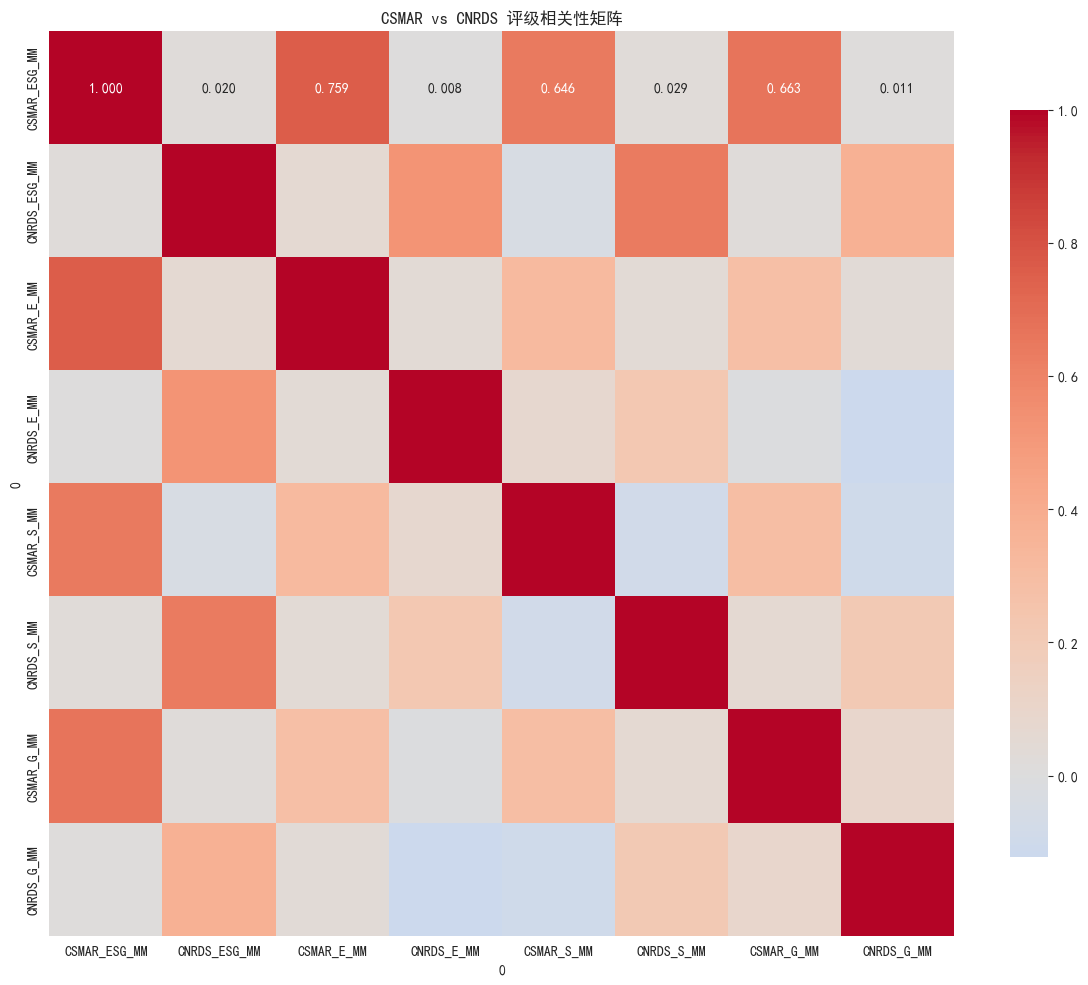

跨系统相关性:
ESG: 0.0198
E: 0.0469
S: -0.0855
G: 0.0916


In [89]:
# 创建相关性热图
correlation_cols = [
    'CSMAR_ESG_MM', 'CNRDS_ESG_MM', 'CSMAR_E_MM', 'CNRDS_E_MM',
    'CSMAR_S_MM', 'CNRDS_S_MM', 'CSMAR_G_MM', 'CNRDS_G_MM'
]

corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('CSMAR vs CNRDS 评级相关性矩阵')
plt.tight_layout()
plt.show()

# 重点关注跨系统的相关性
print("跨系统相关性:")
cross_correlations = []
for dim in ['ESG', 'E', 'S', 'G']:
    corr = df[f'CSMAR_{dim}_MM'].corr(df[f'CNRDS_{dim}_MM'])
    cross_correlations.append({'Dimension': dim, 'Cross_System_Correlation': corr})
    print(f"{dim}: {corr:.4f}")

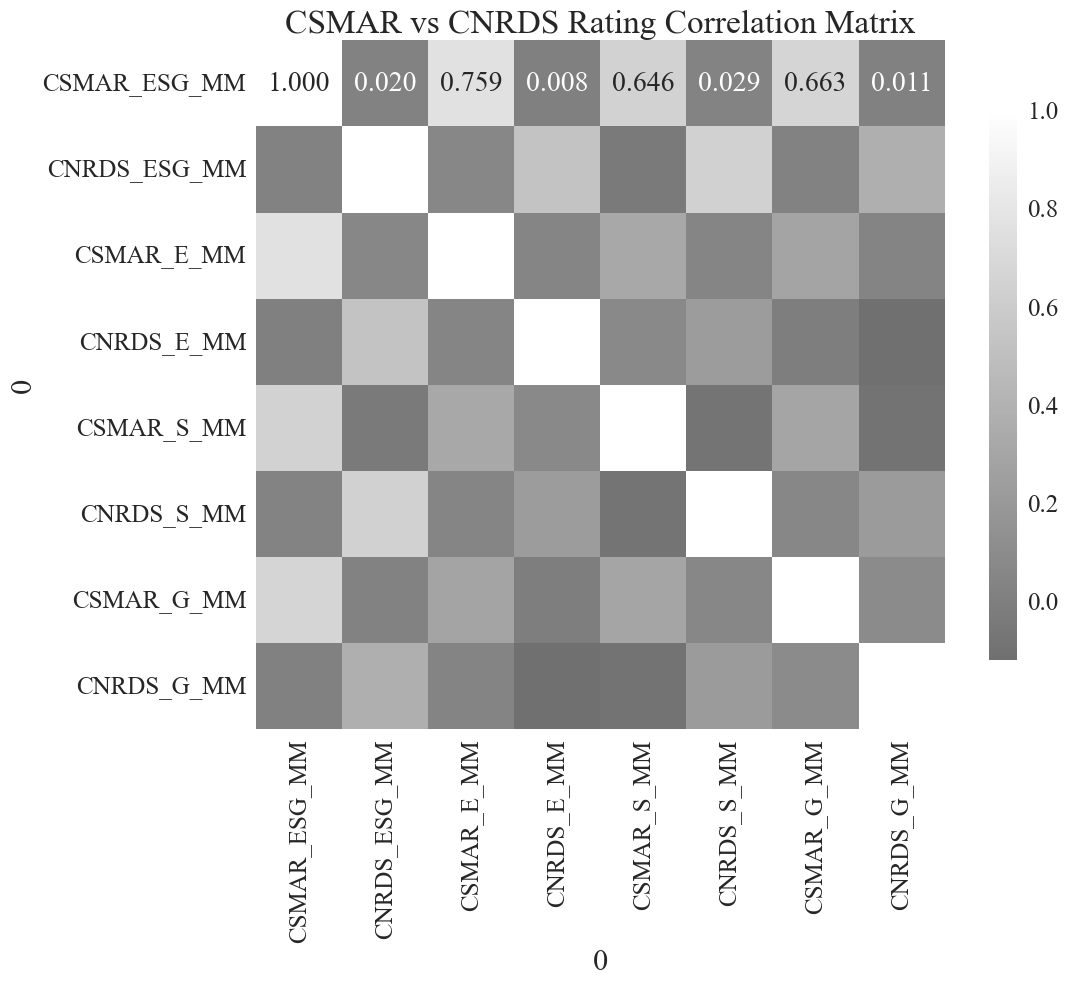

Cross-system correlations:
ESG: 0.0198
E: 0.0469
S: -0.0855
G: 0.0916


In [335]:
# Create correlation heatmap
correlation_cols = [
    'CSMAR_ESG_MM', 'CNRDS_ESG_MM', 'CSMAR_E_MM', 'CNRDS_E_MM',
    'CSMAR_S_MM', 'CNRDS_S_MM', 'CSMAR_G_MM', 'CNRDS_G_MM'
]

corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='gray', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('CSMAR vs CNRDS Rating Correlation Matrix')
plt.tight_layout()
plt.show()

# Focus on cross-system correlations
print("Cross-system correlations:")
cross_correlations = []
for dim in ['ESG', 'E', 'S', 'G']:
    corr = df[f'CSMAR_{dim}_MM'].corr(df[f'CNRDS_{dim}_MM'])
    cross_correlations.append({'Dimension': dim, 'Cross_System_Correlation': corr})
    print(f"{dim}: {corr:.4f}")

In [339]:
# Create a detailed correlation table
import pandas as pd

# 计算完整的相关性矩阵
correlation_table = df[correlation_cols].corr().round(4)

print("Complete Correlation Matrix:")
print(correlation_table)
print("\n" + "="*60 + "\n")

# 创建跨系统相关性对比表格
cross_system_comparison = []
for dim in ['ESG', 'E', 'S', 'G']:
    csmar_col = f'CSMAR_{dim}_MM'
    cnrds_col = f'CNRDS_{dim}_MM'
    
    cross_corr = df[csmar_col].corr(df[cnrds_col])
    
    cross_system_comparison.append({
        'Dimension': dim,
        'CSMAR_CNRDS_Correlation': cross_corr,
        'CSMAR_Mean': df[csmar_col].mean(),
        'CNRDS_Mean': df[cnrds_col].mean(),
        'CSMAR_Std': df[csmar_col].std(),
        'CNRDS_Std': df[cnrds_col].std()
    })

# 转换为DataFrame并美化输出
comparison_df = pd.DataFrame(cross_system_comparison)
print("Cross-System Correlation Comparison:")
print(comparison_df.round(4))

# 可选：保存到CSV文件
# correlation_table.to_csv('correlation_matrix.csv')
# comparison_df.to_csv('cross_system_comparison.csv')

Complete Correlation Matrix:
0             CSMAR_ESG_MM  CNRDS_ESG_MM  CSMAR_E_MM  CNRDS_E_MM  CSMAR_S_MM  \
0                                                                              
CSMAR_ESG_MM        1.0000        0.0198      0.7586      0.0079      0.6456   
CNRDS_ESG_MM        0.0198        1.0000      0.0638      0.5295     -0.0421   
CSMAR_E_MM          0.7586        0.0638      1.0000      0.0469      0.3149   
CNRDS_E_MM          0.0079        0.5295      0.0469      1.0000      0.0738   
CSMAR_S_MM          0.6456       -0.0421      0.3149      0.0738      1.0000   
CNRDS_S_MM          0.0291        0.6325      0.0397      0.2206     -0.0855   
CSMAR_G_MM          0.6626        0.0254      0.2880     -0.0057      0.2908   
CNRDS_G_MM          0.0111        0.3718      0.0372     -0.1226     -0.0964   

0             CNRDS_S_MM  CSMAR_G_MM  CNRDS_G_MM  
0                                                 
CSMAR_ESG_MM      0.0291      0.6626      0.0111  
CNRDS_ESG_MM     

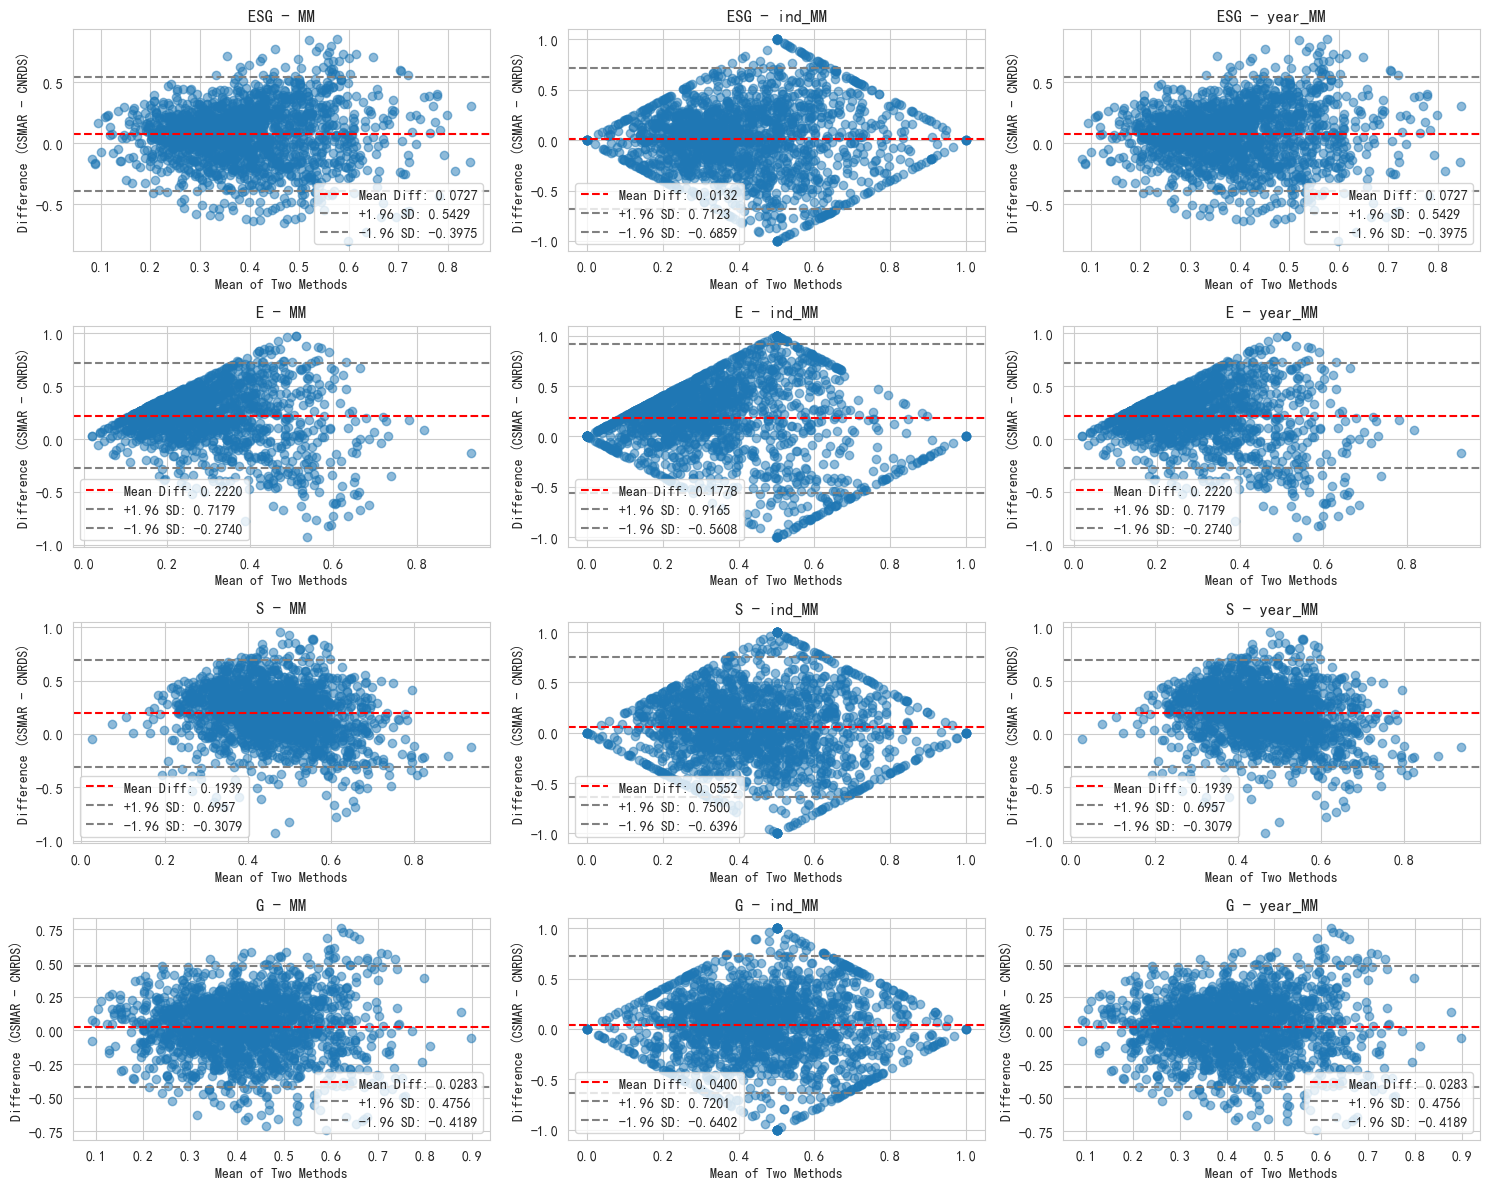

In [90]:
# Bland-Altman图
def bland_altman_plot(data1, data2, title, ax):
    """绘制Bland-Altman图"""
    mean = (data1 + data2) / 2
    diff = data1 - data2
    mean_diff = diff.mean()
    std_diff = diff.std()
    
    ax.scatter(mean, diff, alpha=0.5)
    ax.axhline(mean_diff, color='red', linestyle='--', label=f'Mean Diff: {mean_diff:.4f}')
    ax.axhline(mean_diff + 1.96 * std_diff, color='gray', linestyle='--', 
               label=f'+1.96 SD: {mean_diff + 1.96 * std_diff:.4f}')
    ax.axhline(mean_diff - 1.96 * std_diff, color='gray', linestyle='--', 
               label=f'-1.96 SD: {mean_diff - 1.96 * std_diff:.4f}')
    ax.set_xlabel('Mean of Two Methods')
    ax.set_ylabel('Difference (CSMAR - CNRDS)')
    ax.set_title(title)
    ax.legend()

# 为每个维度绘制Bland-Altman图
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

plot_index = 0
for dim in dimensions:
    csmar_cols = [col for col in df.columns if f'CSMAR_{dim}_' in col and '_MM' in col]
    cnrds_cols = [col for col in df.columns if f'CNRDS_{dim}_' in col and '_MM' in col]
    
    for csmar_col, cnrds_col in zip(csmar_cols, cnrds_cols):
        # 提取数据
        data = df[[csmar_col, cnrds_col]].dropna()
        if len(data) < 10:
            continue
        
        bland_altman_plot(data[csmar_col], data[cnrds_col], 
                         f'{dim} - {csmar_col.replace(f"CSMAR_{dim}_", "")}', 
                         axes[plot_index])
        plot_index += 1

# 隐藏多余的子图
for i in range(plot_index, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

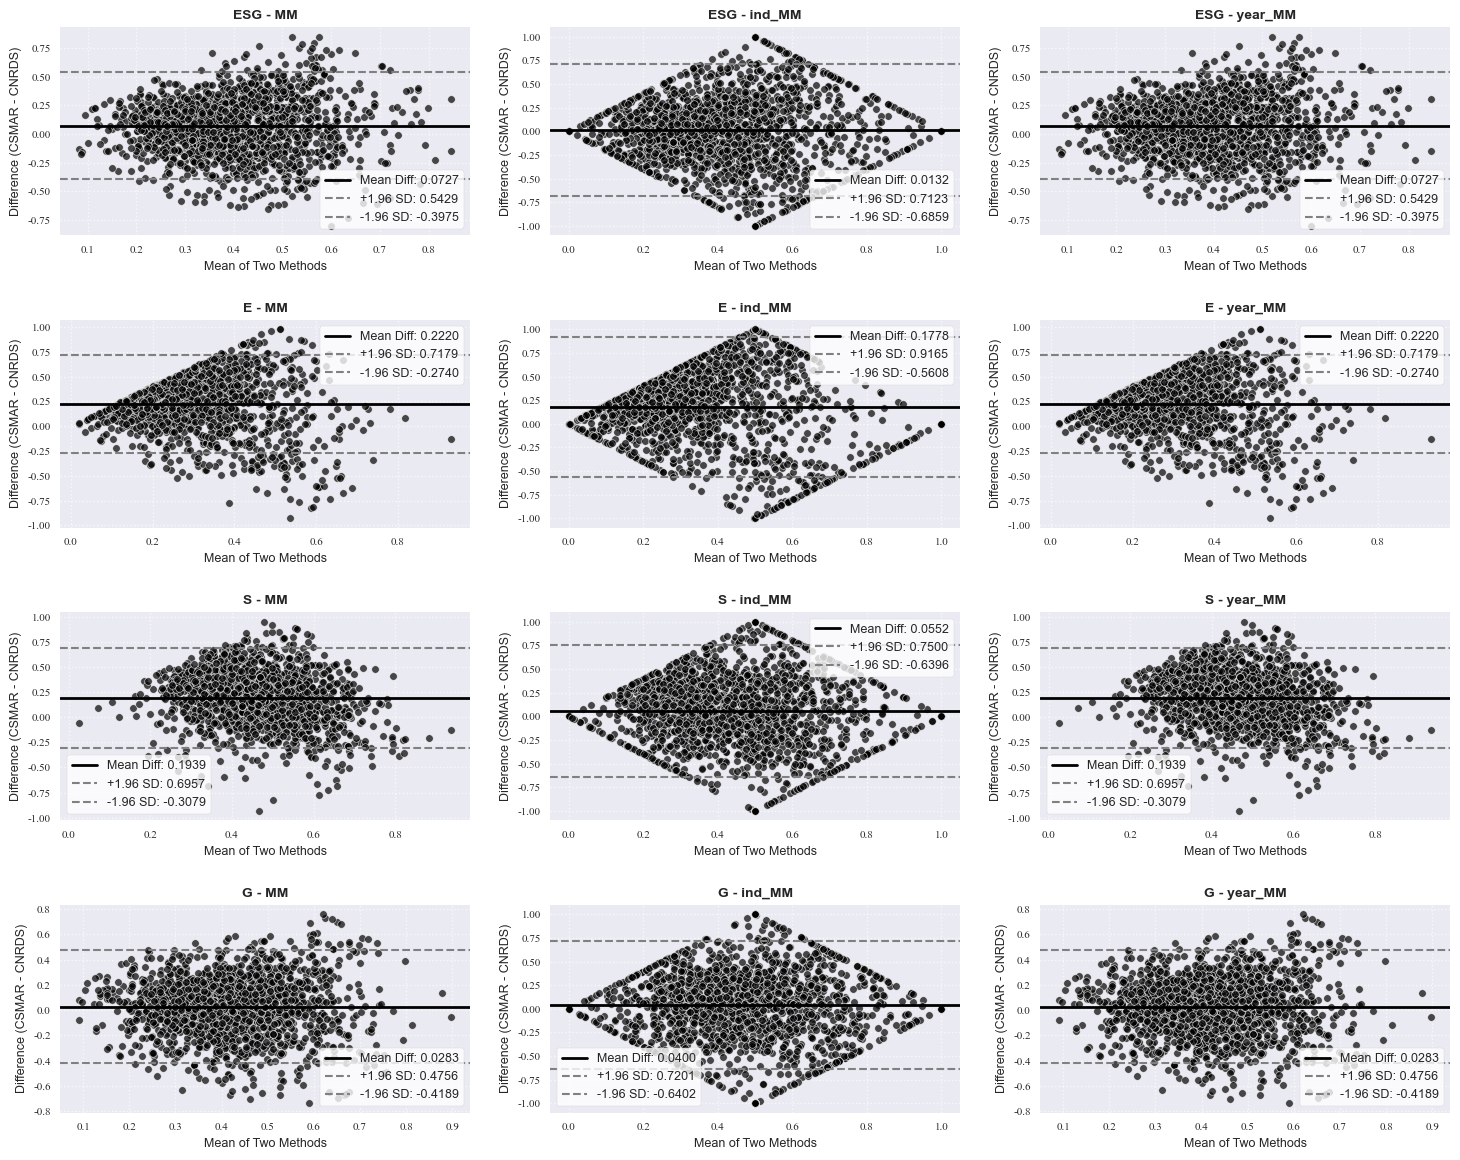

In [343]:
# Bland-Altman图
def bland_altman_plot(data1, data2, title, ax):
    """绘制Bland-Altman图"""
    mean = (data1 + data2) / 2
    diff = data1 - data2
    mean_diff = diff.mean()
    std_diff = diff.std()
    
    # 设置字体
    font_prop = {'family': 'Arial', 'size': 9}
    title_font = {'family': 'Arial', 'size': 10, 'weight': 'bold'}
    
    # 使用黑白颜色和不同标记样式
    ax.scatter(mean, diff, alpha=0.7, color='black', marker='o', s=30, edgecolors='white', linewidths=0.5)
    ax.axhline(mean_diff, color='black', linestyle='-', linewidth=2, label=f'Mean Diff: {mean_diff:.4f}')
    ax.axhline(mean_diff + 1.96 * std_diff, color='gray', linestyle='--', linewidth=1.5,
               label=f'+1.96 SD: {mean_diff + 1.96 * std_diff:.4f}')
    ax.axhline(mean_diff - 1.96 * std_diff, color='gray', linestyle='--', linewidth=1.5,
               label=f'-1.96 SD: {mean_diff - 1.96 * std_diff:.4f}')
    
    # 设置标签和标题字体
    ax.set_xlabel('Mean of Two Methods', fontdict=font_prop)
    ax.set_ylabel('Difference (CSMAR - CNRDS)', fontdict=font_prop)
    ax.set_title(title, fontdict=title_font)
    
    # 设置图例字体
    ax.legend(frameon=True, facecolor='white', prop=font_prop)
    ax.grid(True, linestyle=':', alpha=0.7)
    
    # 设置坐标轴刻度字体
    ax.tick_params(axis='both', which='major', labelsize=8)

# 为每个维度绘制Bland-Altman图
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

# 设置全局字体
plt.rcParams['font.family'] = 'Arial'

plot_index = 0
for dim in dimensions:
    csmar_cols = [col for col in df.columns if f'CSMAR_{dim}_' in col and '_MM' in col]
    cnrds_cols = [col for col in df.columns if f'CNRDS_{dim}_' in col and '_MM' in col]
    
    for csmar_col, cnrds_col in zip(csmar_cols, cnrds_cols):
        # 提取数据
        data = df[[csmar_col, cnrds_col]].dropna()
        if len(data) < 10:
            continue
        
        bland_altman_plot(data[csmar_col], data[cnrds_col], 
                         f'{dim} - {csmar_col.replace(f"CSMAR_{dim}_", "")}', 
                         axes[plot_index])
        plot_index += 1

# 隐藏多余的子图
for i in range(plot_index, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

#### Correlation Result

In [93]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

# 将连续评分转换为等级
def calculate_agreement_metrics(df, dimension, n_quantiles=5):
    """计算两个评级系统的一致性指标"""
    
    # 创建分位数分组
    csmar_quantile = pd.qcut(df[f'CSMAR_{dimension}_MM'], n_quantiles, labels=False, duplicates='drop')
    cnrds_quantile = pd.qcut(df[f'CNRDS_{dimension}_MM'], n_quantiles, labels=False, duplicates='drop')
    
    # 计算一致性指标
    accuracy = (csmar_quantile == cnrds_quantile).mean()
    kappa = cohen_kappa_score(csmar_quantile, cnrds_quantile)
    
    # 计算等级相关性
    rank_correlation = df[f'CSMAR_{dimension}_MM'].corr(df[f'CNRDS_{dimension}_MM'], method='spearman')
    
    return {
        'Dimension': dimension,
        'Exact_Agreement': accuracy,
        'Cohens_Kappa': kappa,
        'Rank_Correlation': rank_correlation,
        'N_Observations': len(df)
    }

# 对所有维度进行一致性分析
agreement_results = []
for dim in ['ESG', 'E', 'S', 'G']:
    result = calculate_agreement_metrics(df, dim)
    agreement_results.append(result)

agreement_df = pd.DataFrame(agreement_results)
print("Correlation Result:")
print(agreement_df.round(4))

Correlation Result:
  Dimension  Exact_Agreement  Cohens_Kappa  Rank_Correlation  N_Observations
0       ESG           0.1985       -0.0018            0.0321            1783
1         E           0.2199        0.0248            0.1188            1783
2         S           0.1935       -0.0081           -0.0600            1783
3         G           0.2182        0.0227            0.1073            1783


* The exact contract rate is approximately 19-22%, only slightly better than a random prediction (20%).
* The Cohen's Kappa coefficient is close to zero, even negative, indicating that consistency is no better than randomness.
* Rank correlation is very weak, with only 0.032 in the ESG dimension, 0.119 in the E dimension, negative (-0.060) in the S dimension, and 0.107 in the G dimension.

The consistency analysis between CSMAR and CNRDS ESG rating systems reveals fundamental divergences in their assessment methodologies. Across all dimensions (ESG, E, S, G), the exact agreement rates hover around only 20%, which is essentially equivalent to random chance given the quintile categorization used. More concerning are the Cohen's Kappa coefficients, which range from -0.0081 to 0.0248, indicating that the inter-rater reliability between the two systems is statistically no better than random assignment. The rank correlation coefficients further confirm this pattern, with values near zero (0.0321 for ESG) and even slightly negative for the social dimension (-0.0600).

These results suggest that CSMAR and CNRDS not only employ different scoring scales but fundamentally disagree on companies' relative ESG performances. The near-zero consistency metrics imply that the two systems capture different aspects of corporate sustainability or weight evaluation criteria differently. This has significant implications for both academic research and investment practice, as findings based on one rating system may not generalize to the other. The low consistency underscores the need for caution when comparing studies using different rating providers and highlights the contextual nature of ESG assessments in emerging markets.

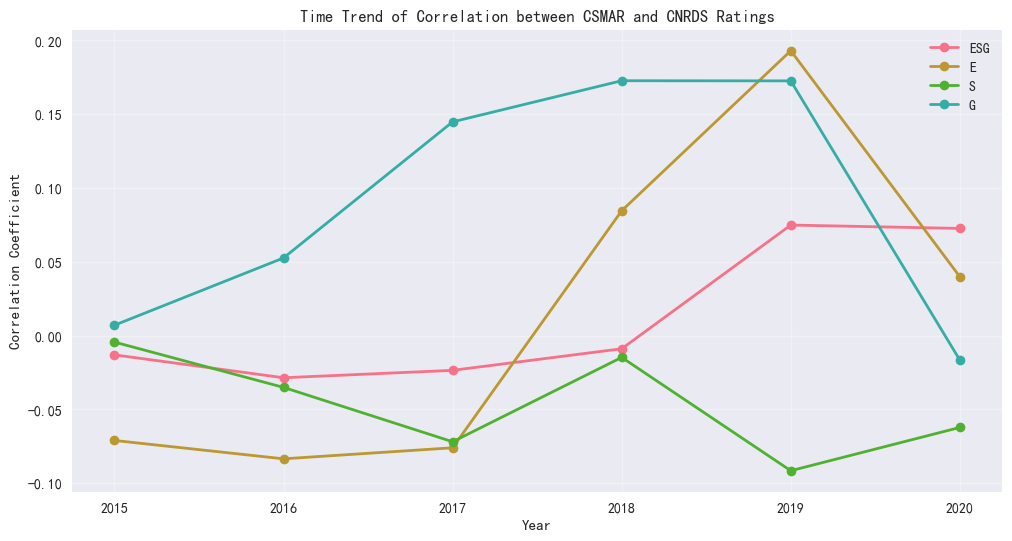

In [152]:
# Analyze correlation changes by year
yearly_correlations = []
for year in sorted(df['Year'].unique()):  # 添加排序
    year_data = df[df['Year'] == year]
    year_corrs = {}
    for dim in ['ESG', 'E', 'S', 'G']:
        if len(year_data) > 10:  # Ensure sufficient data
            corr = year_data[f'CSMAR_{dim}_MM'].corr(year_data[f'CNRDS_{dim}_MM'])
            year_corrs[dim] = corr
    year_corrs['Year'] = year
    yearly_correlations.append(year_corrs)

yearly_corr_df = pd.DataFrame(yearly_correlations)

# 确保DataFrame按年份排序
yearly_corr_df = yearly_corr_df.sort_values('Year').reset_index(drop=True)

# Plot time trend
plt.figure(figsize=(12, 6))
for dim in ['ESG', 'E', 'S', 'G']:
    plt.plot(yearly_corr_df['Year'], yearly_corr_df[dim], marker='o', label=dim, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.title('Time Trend of Correlation between CSMAR and CNRDS Ratings')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

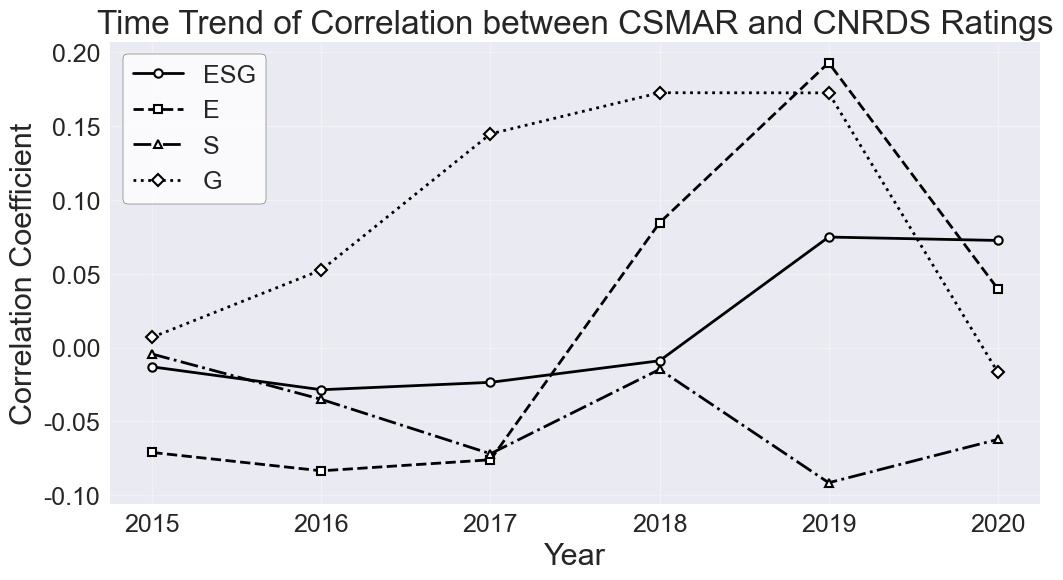

In [347]:
# Analyze correlation changes by year
yearly_correlations = []
for year in sorted(df['Year'].unique()):  # 添加排序
    year_data = df[df['Year'] == year]
    year_corrs = {}
    for dim in ['ESG', 'E', 'S', 'G']:
        if len(year_data) > 10:  # Ensure sufficient data
            corr = year_data[f'CSMAR_{dim}_MM'].corr(year_data[f'CNRDS_{dim}_MM'])
            year_corrs[dim] = corr
    year_corrs['Year'] = year
    yearly_correlations.append(year_corrs)

yearly_corr_df = pd.DataFrame(yearly_correlations)

# 确保DataFrame按年份排序
yearly_corr_df = yearly_corr_df.sort_values('Year').reset_index(drop=True)

# Plot time trend
plt.figure(figsize=(12, 6))

# 定义黑白样式
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']

for i, dim in enumerate(['ESG', 'E', 'S', 'G']):
    plt.plot(yearly_corr_df['Year'], yearly_corr_df[dim], 
             marker=markers[i], 
             linestyle=line_styles[i], 
             color='black',
             markersize=6,
             markerfacecolor='white',
             markeredgecolor='black',
             markeredgewidth=1.5,
             label=dim, 
             linewidth=2)

plt.xlabel('Year', fontfamily='Arial')
plt.ylabel('Correlation Coefficient', fontfamily='Arial')
plt.title('Time Trend of Correlation between CSMAR and CNRDS Ratings', fontfamily='Arial')
plt.legend(frameon=True, facecolor='white', edgecolor='black', prop={'family': 'Arial'})
plt.grid(True, alpha=0.3)
plt.show()


Regression Analysis for ESG Dimension
                            OLS Regression Results                            
Dep. Variable:           CNRDS_ESG_MM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7000
Date:                Wed, 12 Nov 2025   Prob (F-statistic):              0.403
Time:                        19:31:15   Log-Likelihood:                 660.48
No. Observations:                1783   AIC:                            -1317.
Df Residuals:                    1781   BIC:                            -1306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const    

C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept': model.params[0],
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope': model.params[1],
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope_p_value': model.pvalues[1],


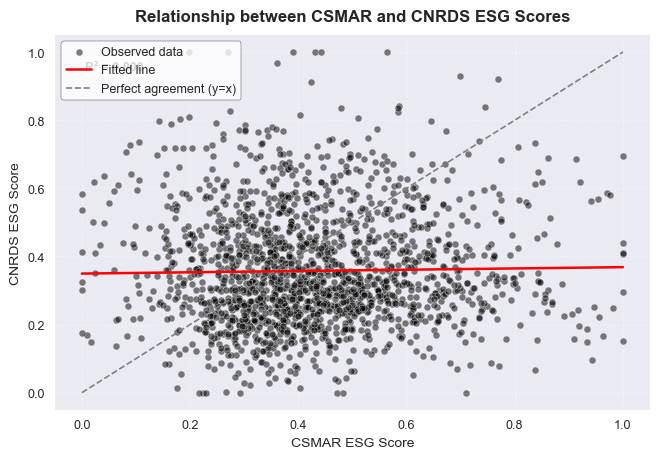


Regression Analysis for E Dimension
                            OLS Regression Results                            
Dep. Variable:             CNRDS_E_MM   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.919
Date:                Wed, 12 Nov 2025   Prob (F-statistic):             0.0479
Time:                        19:31:15   Log-Likelihood:                 409.79
No. Observations:                1783   AIC:                            -815.6
Df Residuals:                    1781   BIC:                            -804.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept': model.params[0],
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope': model.params[1],
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope_p_value': model.pvalues[1],


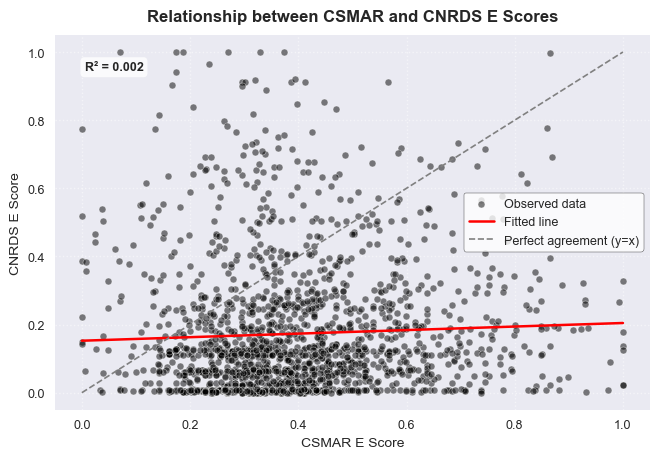


Regression Analysis for S Dimension
                            OLS Regression Results                            
Dep. Variable:             CNRDS_S_MM   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     13.10
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           0.000303
Time:                        19:31:16   Log-Likelihood:                 421.94
No. Observations:                1783   AIC:                            -839.9
Df Residuals:                    1781   BIC:                            -828.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept': model.params[0],
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope': model.params[1],
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope_p_value': model.pvalues[1],


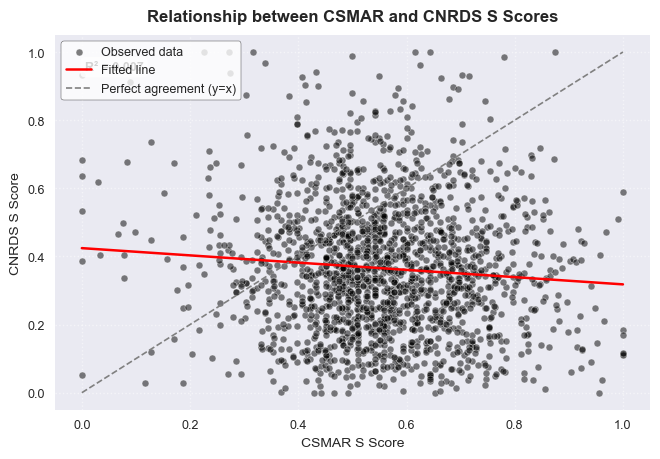


Regression Analysis for G Dimension
                            OLS Regression Results                            
Dep. Variable:             CNRDS_G_MM   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.08
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           0.000107
Time:                        19:31:16   Log-Likelihood:                 644.46
No. Observations:                1783   AIC:                            -1285.
Df Residuals:                    1781   BIC:                            -1274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Intercept': model.params[0],
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope': model.params[1],
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\3410460149.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Slope_p_value': model.pvalues[1],


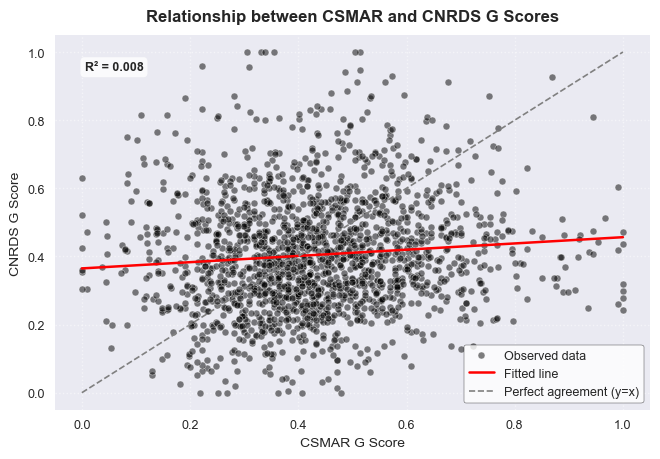


Regression Results Summary:
  Dimension  R_Squared   Slope  Intercept  Slope_p_value  N_Observations
0       ESG     0.0004  0.0189     0.3496         0.4029            1783
1         E     0.0022  0.0520     0.1526         0.0479            1783
2         S     0.0073 -0.1064     0.4243         0.0003            1783
3         G     0.0084  0.0917     0.3648         0.0001            1783


In [357]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 设置全局字体与风格
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9

# 为每个维度进行简单线性回归
regression_results = []

for dim in ['ESG', 'E', 'S', 'G']:
    print(f"\n{'='*50}")
    print(f"Regression Analysis for {dim} Dimension")
    print(f"{'='*50}")

    # 准备数据
    csmar_col = f'CSMAR_{dim}_MM'
    cnrds_col = f'CNRDS_{dim}_MM'
    
    regression_data = df[[csmar_col, cnrds_col]].dropna()
    X = sm.add_constant(regression_data[csmar_col])
    y = regression_data[cnrds_col]
    
    # 执行OLS回归
    model = sm.OLS(y, X).fit()
    
    # 提取关键结果
    results = {
        'Dimension': dim,
        'R_Squared': model.rsquared,
        'Adj_R_Squared': model.rsquared_adj,
        'Intercept': model.params[0],
        'Slope': model.params[1],
        'Slope_p_value': model.pvalues[1],
        'N_Observations': len(regression_data)
    }
    regression_results.append(results)
    
    # 打印回归结果
    print(model.summary())
    
    # 绘制回归散点图
    plt.figure(figsize=(7, 5))
    plt.scatter(regression_data[csmar_col], regression_data[cnrds_col],
                alpha=0.5, s=25, color='black', edgecolors='white', linewidths=0.5,
                label='Observed data')
    
    # 添加回归线
    x_range = np.linspace(regression_data[csmar_col].min(), regression_data[csmar_col].max(), 100)
    y_pred = results['Intercept'] + results['Slope'] * x_range
    plt.plot(x_range, y_pred, color='red', linewidth=1.8, label=f'Fitted line')
    
    # 添加完美一致性线 (y = x)
    plt.plot(x_range, x_range, color='gray', linestyle='--', linewidth=1.2, label='Perfect agreement (y=x)')
    
    # 图表标题与注释
    plt.title(f'Relationship between CSMAR and CNRDS {dim} Scores', pad=10, fontweight='bold')
    plt.xlabel(f'CSMAR {dim} Score')
    plt.ylabel(f'CNRDS {dim} Score')
    
    plt.annotate(f'R² = {results["R_Squared"]:.3f}',
                 xy=(0.05, 0.93), xycoords='axes fraction',
                 fontsize=9, fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                 verticalalignment='top')
    
    plt.legend(frameon=True, facecolor='white', edgecolor='black')
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 汇总回归结果表
regression_df = pd.DataFrame(regression_results)
print("\nRegression Results Summary:")
print("="*60)
display_cols = ['Dimension', 'R_Squared', 'Slope', 'Intercept', 'Slope_p_value', 'N_Observations']
print(regression_df[display_cols].round(4))


C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\2887578225.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\2887578225.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\2887578225.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
C:\Users\Vicky\App

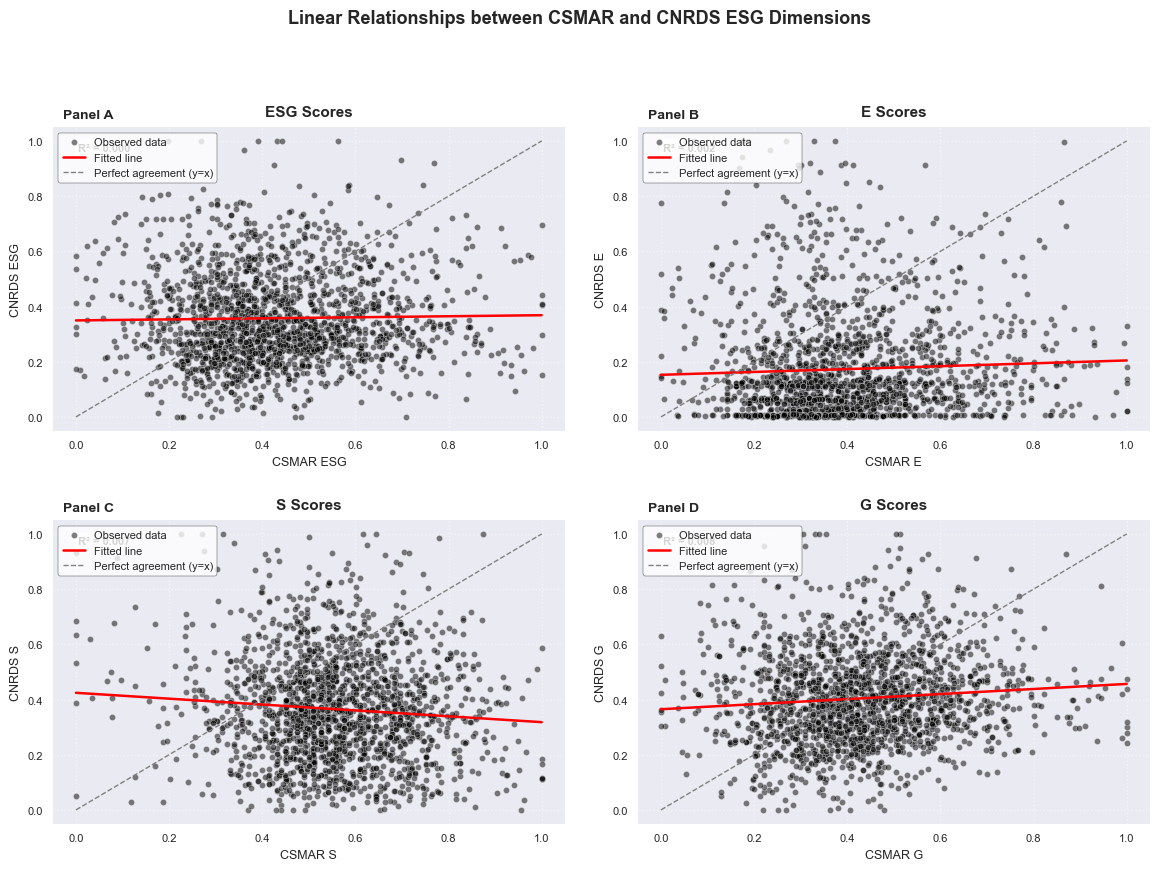

In [359]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 设置全局字体与风格
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8

# 定义维度和Panel标签
dimensions = ['ESG', 'E', 'S', 'G']
panel_labels = ['Panel A', 'Panel B', 'Panel C', 'Panel D']

# 创建画布
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()

# 遍历每个维度进行回归和绘图
for i, dim in enumerate(dimensions):
    ax = axes[i]
    csmar_col = f'CSMAR_{dim}_MM'
    cnrds_col = f'CNRDS_{dim}_MM'

    # 清理数据
    regression_data = df[[csmar_col, cnrds_col]].dropna()
    X = sm.add_constant(regression_data[csmar_col])
    y = regression_data[cnrds_col]

    # 回归
    model = sm.OLS(y, X).fit()
    slope = model.params[1]
    intercept = model.params[0]
    r2 = model.rsquared

    # 绘制散点图
    ax.scatter(regression_data[csmar_col], regression_data[cnrds_col],
               alpha=0.5, s=20, color='black', edgecolors='white', linewidths=0.4,
               label='Observed data')

    # 添加回归线
    x_range = np.linspace(regression_data[csmar_col].min(), regression_data[csmar_col].max(), 100)
    y_pred = intercept + slope * x_range
    ax.plot(x_range, y_pred, color='red', linewidth=1.8, label='Fitted line')

    # 添加完美一致性线 (y=x)
    ax.plot(x_range, x_range, color='gray', linestyle='--', linewidth=1.0,
            label='Perfect agreement (y=x)')

    # 设置标题和标签
    ax.set_title(f'{dim} Scores', pad=8, fontweight='bold')
    ax.set_xlabel(f'CSMAR {dim}')
    ax.set_ylabel(f'CNRDS {dim}')

    # 添加R²标注
    ax.text(0.05, 0.92, f'R² = {r2:.3f}', transform=ax.transAxes,
            fontsize=8, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    # 添加Panel标识
    ax.text(0.02, 1.02, panel_labels[i], transform=ax.transAxes,
            fontsize=10, fontweight='bold', va='bottom')

    # 样式调整
    ax.legend(frameon=True, facecolor='white', edgecolor='black', loc='upper left')
    ax.grid(True, linestyle=':', alpha=0.5)

# 调整整体布局
fig.suptitle('Linear Relationships between CSMAR and CNRDS ESG Dimensions', fontsize=13, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


**Key Regression Results Between CSMAR and CNRDS ESG Ratings:**

• **Extremely Low Explanatory Power**: All R² values < 1% (ESG: 0.04%, E: 0.22%, S: 0.73%, G: 0.84%)

• **Divergent Relationship Patterns**:
  - ESG: No significant relationship (slope=0.019, p=0.403)
  - E: Marginally positive (slope=0.052, p=0.048)
  - S: Significantly negative (slope=-0.106, p=0.0003)
  - G: Significantly positive (slope=0.092, p=0.0001)

• **Systematic Scoring Bias**: All intercepts significantly different from zero, indicating fundamental scaling differences

Critical Findings:

The regression analysis reveals that CSMAR and CNRDS ESG rating systems capture fundamentally different aspects of corporate sustainability performance. The near-zero R² values across all dimensions indicate negligible predictive relationship between the two systems. Most alarmingly, the significant negative relationship in social (S) ratings suggests the systems hold opposing views on corporate social responsibility. These results demonstrate that the choice of ESG rating provider substantially influences research outcomes and investment decisions, as the systems cannot be used interchangeably.


### Violin Plot

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置图形风格
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 准备数据 - 创建长格式数据以便于绘图
violin_data = []

for dim in ['ESG', 'E', 'S', 'G']:
    csmar_col = f'CSMAR_{dim}_MM'
    cnrds_col = f'CNRDS_{dim}_MM'
    
    # 提取CSMAR数据
    for score in df[csmar_col].dropna():
        violin_data.append({
            'Dimension': dim,
            'System': 'CSMAR',
            'Score': score
        })
    
    # 提取CNRDS数据
    for score in df[cnrds_col].dropna():
        violin_data.append({
            'Dimension': dim,
            'System': 'CNRDS',
            'Score': score
        })

violin_df = pd.DataFrame(violin_data)

print("数据准备完成，开始绘制violin plot...")

数据准备完成，开始绘制violin plot...


Statistical Summary:
                    mean     std  median
Dimension System                        
E         CNRDS   0.1731  0.1926  0.1131
          CSMAR   0.3951  0.1734  0.3651
ESG       CNRDS   0.3578  0.1671  0.3250
          CSMAR   0.4304  0.1754  0.4088
G         CNRDS   0.4045  0.1693  0.3892
          CSMAR   0.4328  0.1693  0.4215
S         CNRDS   0.3649  0.1917  0.3508
          CSMAR   0.5588  0.1540  0.5508


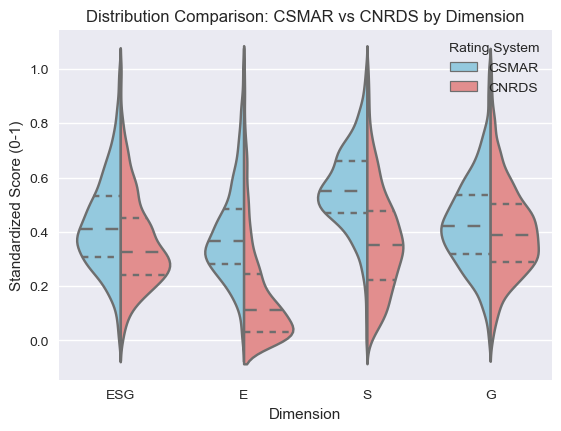

In [100]:
# 创建violin plot
plt.figure(figsize=(14, 10))

# 主图 - 按维度分组显示两个系统的分布
plt.subplot(2, 2, 1)
sns.violinplot(data=violin_df, x='Dimension', y='Score', hue='System', 
               split=True, inner='quart', palette={'CSMAR': 'skyblue', 'CNRDS': 'lightcoral'})
plt.title('Distribution Comparison: CSMAR vs CNRDS by Dimension')
plt.ylabel('Standardized Score (0-1)')
plt.legend(title='Rating System')

# 添加统计摘要
stats_summary = violin_df.groupby(['Dimension', 'System'])['Score'].agg(['mean', 'std', 'median']).round(4)
print("Statistical Summary:")
print(stats_summary)

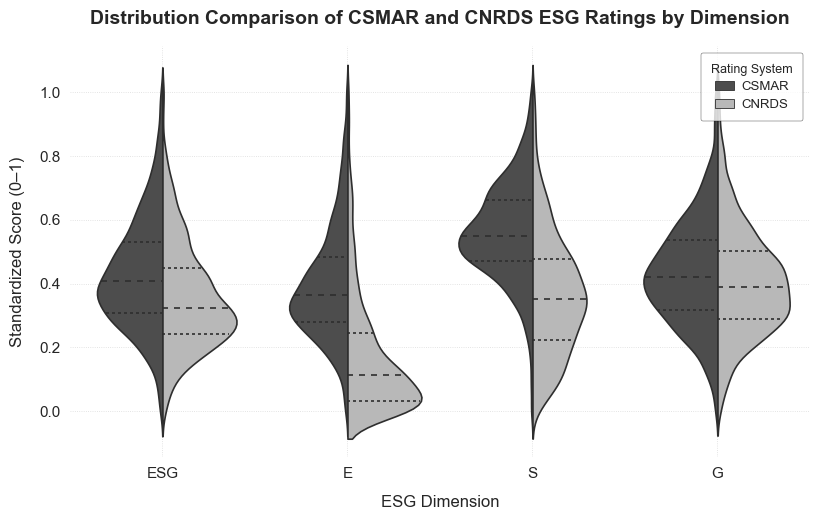

Statistical Summary:
                    mean     std  median
Dimension System                        
E         CNRDS   0.1731  0.1926  0.1131
          CSMAR   0.3951  0.1734  0.3651
ESG       CNRDS   0.3578  0.1671  0.3250
          CSMAR   0.4304  0.1754  0.4088
G         CNRDS   0.4045  0.1693  0.3892
          CSMAR   0.4328  0.1693  0.4215
S         CNRDS   0.3649  0.1917  0.3508
          CSMAR   0.5588  0.1540  0.5508


In [381]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🎓 学术灰阶风格设置
sns.set_style("whitegrid")

# 全局字体与字号
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 9.5   # 图例字体稍小

# 调色板（灰度）
palette_academic = {
    'CSMAR': '#4D4D4D',   # 深灰
    'CNRDS': '#B8B8B8'    # 浅灰
}

# 创建图
plt.figure(figsize=(9, 6))

sns.violinplot(
    data=violin_df,
    x='Dimension',
    y='Score',
    hue='System',
    split=True,
    inner='quart',
    linewidth=1.2,
    palette=palette_academic,
    saturation=0.9
)

# 标题与坐标轴
plt.title('Distribution Comparison of CSMAR and CNRDS ESG Ratings by Dimension',
          pad=16, fontweight='bold')
plt.ylabel('Standardized Score (0–1)', labelpad=10)
plt.xlabel('ESG Dimension', labelpad=10)

# 🔹 图例设置（标题更小）
legend = plt.legend(
    title='Rating System',
    title_fontsize=9,          # ✅ 标题字体调小
    frameon=True,
    facecolor='white',
    edgecolor='black',
    loc='upper right',
    borderpad=0.8,
    labelspacing=0.4,
    handlelength=1.4,
    handletextpad=0.6
)

# 网格与边框
plt.grid(True, linestyle=':', linewidth=0.6, alpha=0.7)
sns.despine(trim=True)

plt.tight_layout(pad=1.8)
plt.show()

# 统计摘要
stats_summary = violin_df.groupby(['Dimension', 'System'])['Score'].agg(['mean', 'std', 'median']).round(4)
print("Statistical Summary:")
print(stats_summary)


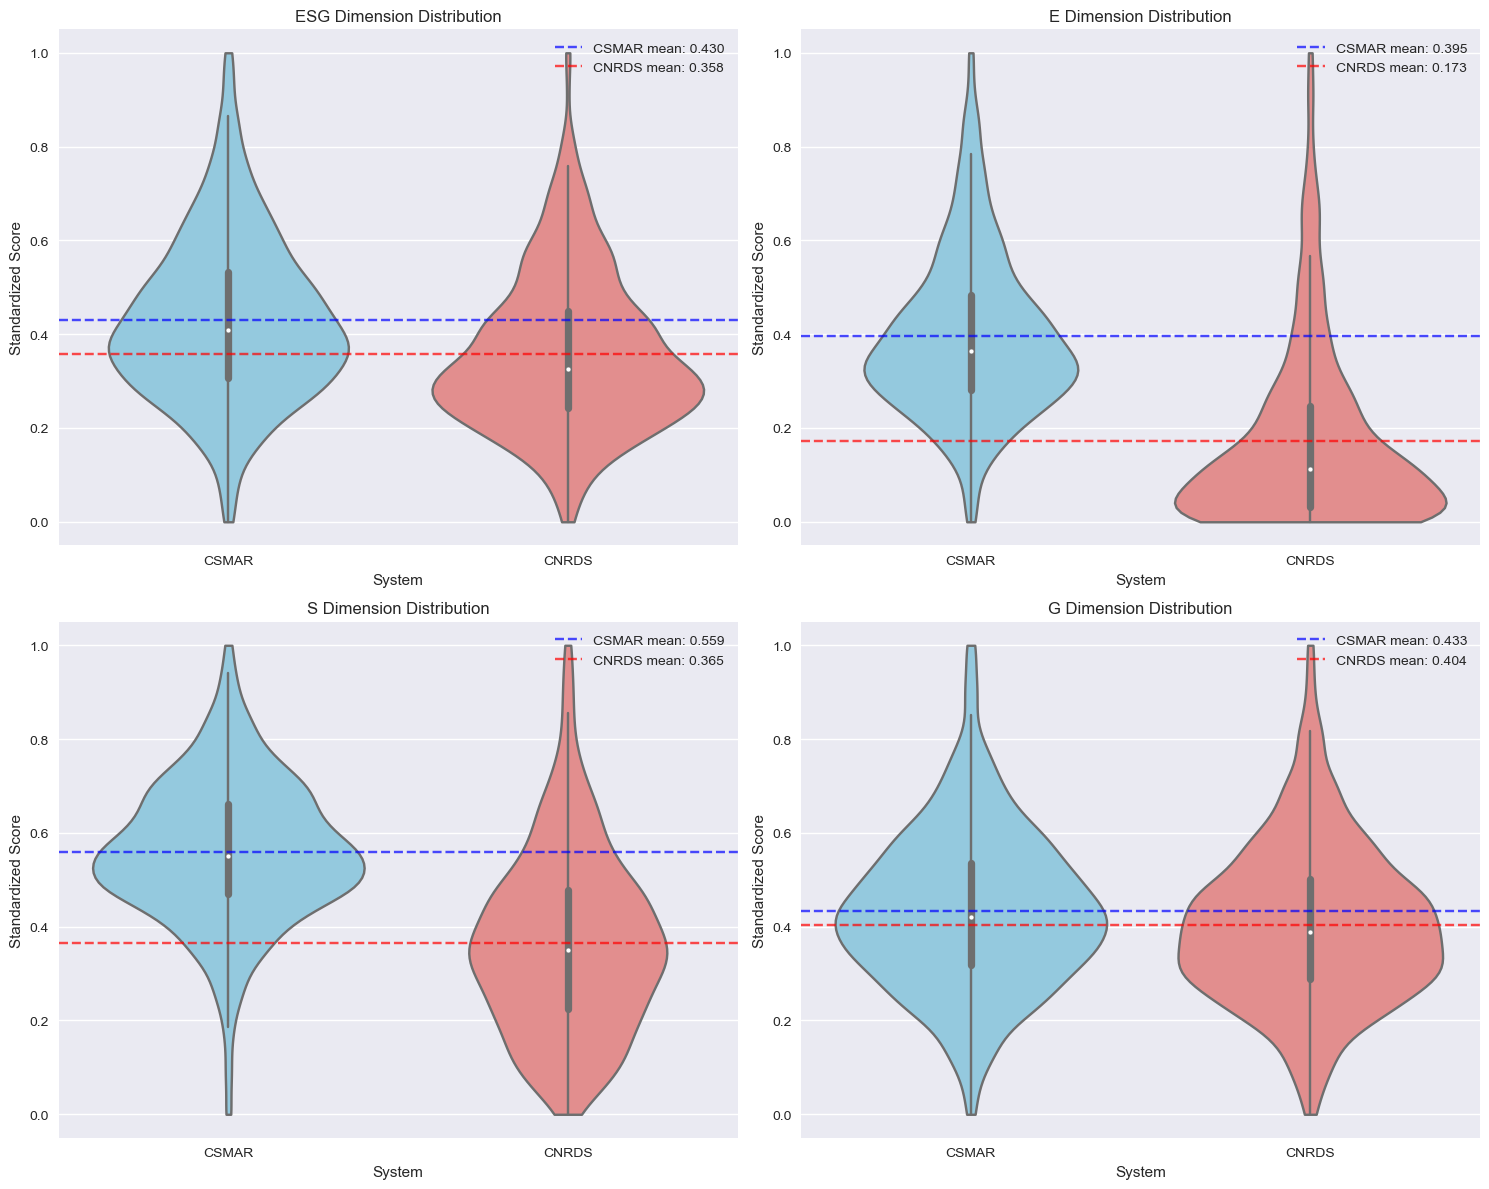

In [101]:
# 按维度分别绘制violin plot
dimensions = ['ESG', 'E', 'S', 'G']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, dim in enumerate(dimensions):
    dim_data = violin_df[violin_df['Dimension'] == dim]
    
    sns.violinplot(data=dim_data, x='System', y='Score', 
                   ax=axes[i], palette={'CSMAR': 'skyblue', 'CNRDS': 'lightcoral'},
                   inner='box', cut=0)
    
    # 添加均值和标准差标注
    csmar_mean = dim_data[dim_data['System'] == 'CSMAR']['Score'].mean()
    cnrds_mean = dim_data[dim_data['System'] == 'CNRDS']['Score'].mean()
    
    axes[i].axhline(y=csmar_mean, color='blue', linestyle='--', alpha=0.7, label=f'CSMAR mean: {csmar_mean:.3f}')
    axes[i].axhline(y=cnrds_mean, color='red', linestyle='--', alpha=0.7, label=f'CNRDS mean: {cnrds_mean:.3f}')
    
    axes[i].set_title(f'{dim} Dimension Distribution')
    axes[i].set_ylabel('Standardized Score')
    axes[i].legend()

plt.tight_layout()
plt.show()

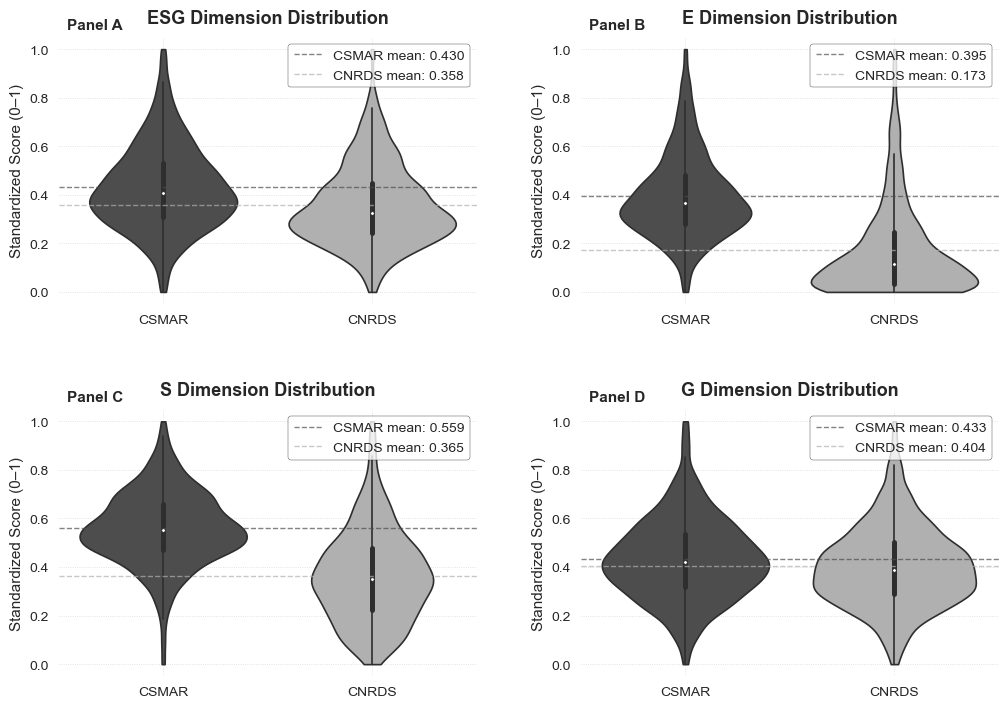

In [365]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置整体学术风格
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# 中性灰色调色板
palette_academic = {
    'CSMAR': '#4D4D4D',   # 深灰
    'CNRDS': '#B0B0B0'    # 浅灰
}

# 定义维度和 Panel 标签
dimensions = ['ESG', 'E', 'S', 'G']
panel_labels = ['Panel A', 'Panel B', 'Panel C', 'Panel D']

# 创建子图
fig, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()

for i, dim in enumerate(dimensions):
    dim_data = violin_df[violin_df['Dimension'] == dim]
    
    # 绘制 violin 图
    sns.violinplot(
        data=dim_data, 
        x='System', 
        y='Score', 
        ax=axes[i],
        palette=palette_academic,
        inner='box', 
        cut=0,
        linewidth=1.2,
        saturation=0.9
    )
    
    # 均值线
    csmar_mean = dim_data[dim_data['System'] == 'CSMAR']['Score'].mean()
    cnrds_mean = dim_data[dim_data['System'] == 'CNRDS']['Score'].mean()
    
    axes[i].axhline(y=csmar_mean, color='#4D4D4D', linestyle='--', linewidth=1, alpha=0.7,
                    label=f'CSMAR mean: {csmar_mean:.3f}')
    axes[i].axhline(y=cnrds_mean, color='#B0B0B0', linestyle='--', linewidth=1, alpha=0.7,
                    label=f'CNRDS mean: {cnrds_mean:.3f}')
    
    # Panel + Title
    axes[i].text(0.02, 1.02, panel_labels[i], transform=axes[i].transAxes,
                 fontsize=11, fontweight='bold', va='bottom')
    axes[i].set_title(f'{dim} Dimension Distribution', pad=10, fontweight='bold')
    axes[i].set_ylabel('Standardized Score (0–1)')
    axes[i].set_xlabel('')
    
    # 图例
    axes[i].legend(frameon=True, facecolor='white', edgecolor='black', loc='upper right')
    axes[i].grid(True, linestyle=':', linewidth=0.6, alpha=0.7)

# 去掉多余边框并调整布局
sns.despine(trim=True)
plt.tight_layout(pad=2.0)
plt.show()


C:\Users\Vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

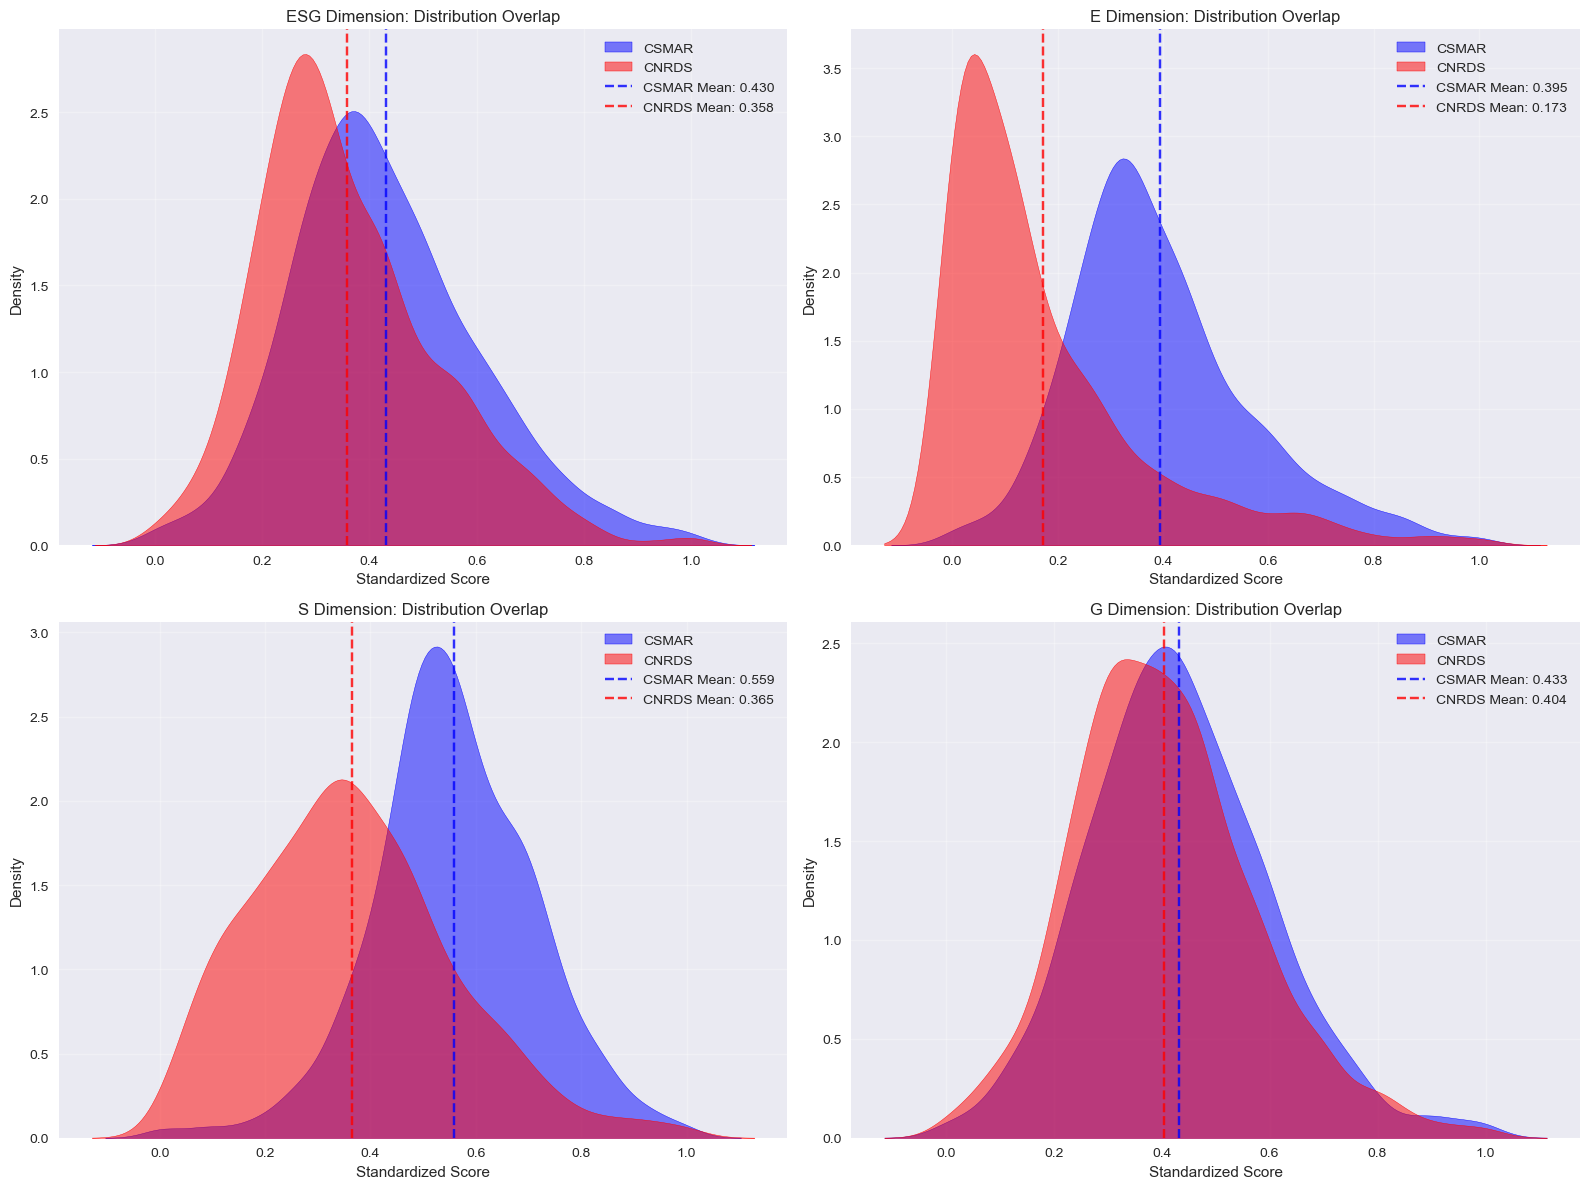

In [102]:
# 创建组合分布图显示重叠情况
plt.figure(figsize=(16, 12))

for i, dim in enumerate(dimensions, 1):
    plt.subplot(2, 2, i)
    
    # 提取两个系统的数据
    csmar_scores = df[f'CSMAR_{dim}_MM'].dropna()
    cnrds_scores = df[f'CNRDS_{dim}_MM'].dropna()
    
    # 绘制密度图
    sns.kdeplot(csmar_scores, label='CSMAR', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(cnrds_scores, label='CNRDS', fill=True, alpha=0.5, color='red')
    
    # 添加均值和中位数线
    plt.axvline(csmar_scores.mean(), color='blue', linestyle='--', alpha=0.8, label=f'CSMAR Mean: {csmar_scores.mean():.3f}')
    plt.axvline(cnrds_scores.mean(), color='red', linestyle='--', alpha=0.8, label=f'CNRDS Mean: {cnrds_scores.mean():.3f}')
    
    plt.xlabel('Standardized Score')
    plt.ylabel('Density')
    plt.title(f'{dim} Dimension: Distribution Overlap')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\Vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

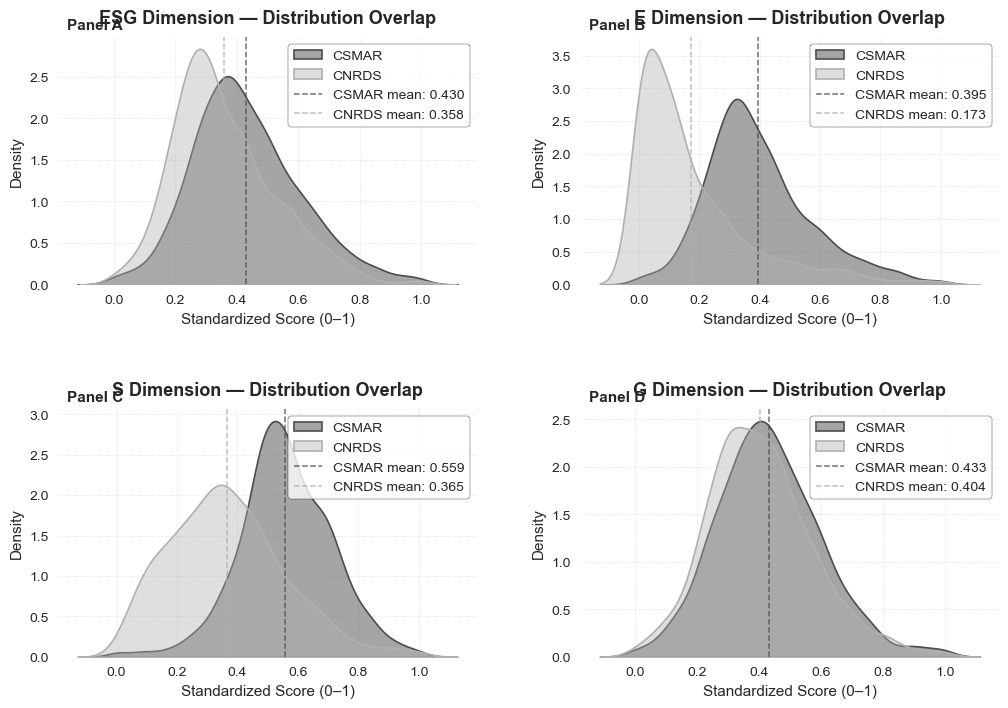

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置整体风格（白底灰调）
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# 统一灰阶配色
palette_academic = {
    'CSMAR': '#4D4D4D',   # 深灰
    'CNRDS': '#B0B0B0'    # 浅灰
}

# 定义 Panel 标签
panel_labels = ['Panel A', 'Panel B', 'Panel C', 'Panel D']
dimensions = ['ESG', 'E', 'S', 'G']

# 创建 2x2 图表布局
fig, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()

for i, dim in enumerate(dimensions):
    ax = axes[i]
    
    # 提取数据
    csmar_scores = df[f'CSMAR_{dim}_MM'].dropna()
    cnrds_scores = df[f'CNRDS_{dim}_MM'].dropna()
    
    # 绘制 KDE 曲线（使用灰阶填充）
    sns.kdeplot(csmar_scores, ax=ax, label='CSMAR', fill=True, alpha=0.5, color=palette_academic['CSMAR'], linewidth=1.2)
    sns.kdeplot(cnrds_scores, ax=ax, label='CNRDS', fill=True, alpha=0.4, color=palette_academic['CNRDS'], linewidth=1.2)
    
    # 均值线
    ax.axvline(csmar_scores.mean(), color=palette_academic['CSMAR'], linestyle='--', linewidth=1.1, alpha=0.8, label=f'CSMAR mean: {csmar_scores.mean():.3f}')
    ax.axvline(cnrds_scores.mean(), color=palette_academic['CNRDS'], linestyle='--', linewidth=1.1, alpha=0.8, label=f'CNRDS mean: {cnrds_scores.mean():.3f}')
    
    # Panel 标签和标题
    ax.text(0.02, 1.02, panel_labels[i], transform=ax.transAxes, fontsize=11, fontweight='bold', va='bottom')
    ax.set_title(f'{dim} Dimension — Distribution Overlap', pad=10, fontweight='bold')
    ax.set_xlabel('Standardized Score (0–1)')
    ax.set_ylabel('Density')
    
    # 图例设置
    ax.legend(frameon=True, facecolor='white', edgecolor='black', loc='upper right')
    ax.grid(True, linestyle=':', linewidth=0.6, alpha=0.7)

# 去掉多余边框、优化布局
sns.despine(trim=True)
plt.tight_layout(pad=2.0)
plt.show()


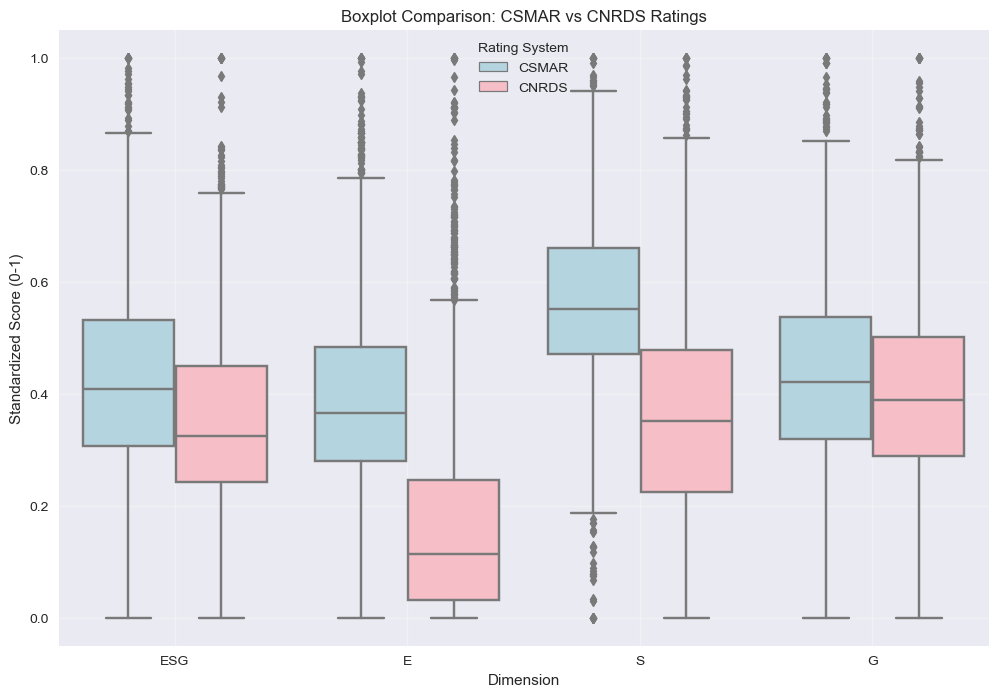

In [103]:
# 补充箱线图对比
plt.figure(figsize=(12, 8))
sns.boxplot(data=violin_df, x='Dimension', y='Score', hue='System', 
            palette={'CSMAR': 'lightblue', 'CNRDS': 'lightpink'})
plt.title('Boxplot Comparison: CSMAR vs CNRDS Ratings')
plt.ylabel('Standardized Score (0-1)')
plt.legend(title='Rating System')
plt.grid(True, alpha=0.3)
plt.show()

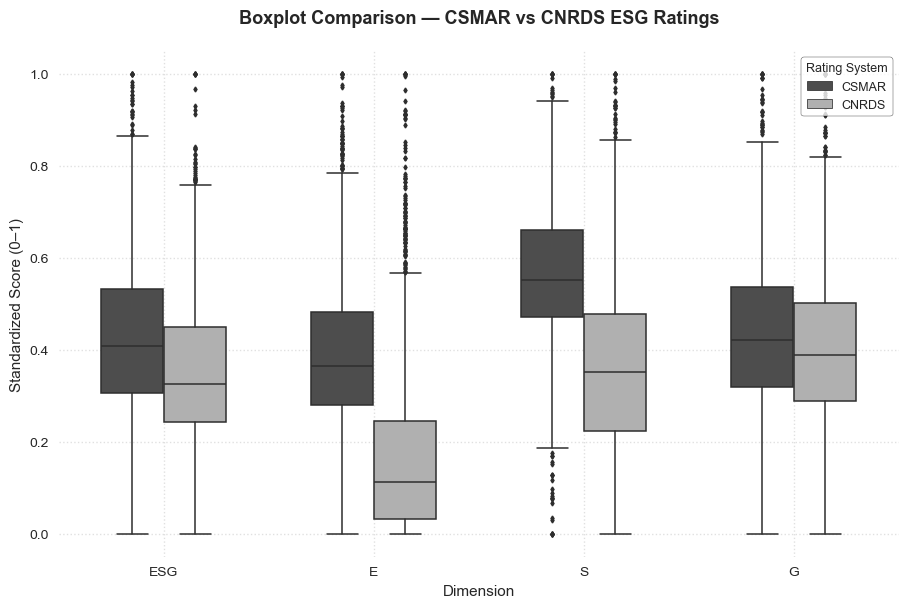

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎓 学术风格设置
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 9  # 图例文字稍微小一点，更精致

# 灰阶配色（保持与前面一致）
palette_academic = {
    'CSMAR': '#4D4D4D',   # 深灰
    'CNRDS': '#B0B0B0'    # 浅灰
}

# 创建箱线图
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=violin_df,
    x='Dimension', y='Score', hue='System',
    palette=palette_academic,
    width=0.6, linewidth=1.1, fliersize=2.5
)

# 标题与标签
plt.title('Boxplot Comparison — CSMAR vs CNRDS ESG Ratings', pad=20, fontweight='bold')
plt.ylabel('Standardized Score (0–1)')
plt.xlabel('Dimension')

# 图例设置：单独缩小 title 字体
legend = plt.legend(
    title='Rating System',
    frameon=True, facecolor='white', edgecolor='black',
    loc='upper right'
)
plt.setp(legend.get_title(), fontsize=9)  # ✅ 调整 legend title 字体大小

# 网格与边框优化
plt.grid(True, linestyle=':', alpha=0.6)
sns.despine(trim=True)

plt.tight_layout(pad=2.0)
plt.show()


### Industry Level Analysis

Which industries are significantly different?   
alpha = 5%

In [404]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

# Set up Chinese font (if needed)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("Step 1: Identifying Industries with Significant Rating Differences")
print("=" * 70)

# Assuming your industry variable is 'Industry', please adjust according to actual situation
industry_col = 'CSMAR_Industry_1'  # Please replace with actual industry column name

# Check industry distribution
industry_counts = df[industry_col].value_counts()
print("Industry Distribution:")
print(industry_counts.head(10))  # Display top 10 industries

# Only keep industries with sufficient samples (e.g., at least 30 observations)
min_obs = 30
valid_industries = industry_counts[industry_counts >= min_obs].index
print(f"\nNumber of industries with sufficient samples: {len(valid_industries)}")

# Store industry difference test results
industry_results = []

for industry in valid_industries:
    industry_data = df[df[industry_col] == industry]
    
    industry_result = {'Industry': industry, 'N': len(industry_data)}
    
    for dim in ['ESG', 'E', 'S', 'G']:
        csmar_col = f'CSMAR_{dim}_MM'
        cnrds_col = f'CNRDS_{dim}_MM'
        
        # Extract data
        csmar_scores = industry_data[csmar_col].dropna()
        cnrds_scores = industry_data[cnrds_col].dropna()
        
        # Find common index
        common_idx = csmar_scores.index.intersection(cnrds_scores.index)
        if len(common_idx) < 10:  # Skip if too few samples
            continue
            
        csmar_common = csmar_scores.loc[common_idx]
        cnrds_common = cnrds_scores.loc[common_idx]
        
        # Paired t-test
        t_stat, p_value = stats.ttest_rel(csmar_common, cnrds_common)
        mean_diff = csmar_common.mean() - cnrds_common.mean()
        
        industry_result[f'{dim}_Mean_Diff'] = mean_diff
        industry_result[f'{dim}_P_Value'] = p_value
        industry_result[f'{dim}_Significant'] = p_value < 0.05
    
    industry_results.append(industry_result)

# Convert to DataFrame
industry_df = pd.DataFrame(industry_results)

# Multiple testing correction
p_values = []
for dim in ['ESG', 'E', 'S', 'G']:
    p_values.extend(industry_df[f'{dim}_P_Value'].dropna().tolist())

# Apply FDR correction
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Assign corrected p-values back to DataFrame
corrected_idx = 0
for dim in ['ESG', 'E', 'S', 'G']:
    for i in industry_df.index:
        if not pd.isna(industry_df.loc[i, f'{dim}_P_Value']):
            industry_df.loc[i, f'{dim}_P_Value_Corrected'] = pvals_corrected[corrected_idx]
            industry_df.loc[i, f'{dim}_Significant_Corrected'] = pvals_corrected[corrected_idx] < 0.05
            corrected_idx += 1

print("\nIndustry Difference Test Results (Top 10 Industries):")
display_cols = ['Industry', 'N'] + [f'{dim}_Mean_Diff' for dim in ['ESG', 'E', 'S', 'G']]
print(industry_df[display_cols].head(10).round(4))

# Identify industries with significant differences
significant_industries = set()
for dim in ['ESG', 'E', 'S', 'G']:
    sig_industries = industry_df[industry_df[f'{dim}_Significant_Corrected'] == True]['Industry'].tolist()
    significant_industries.update(sig_industries)
    print(f"\n{dim} Dimension - Industries with Significant Differences ({len(sig_industries)}):")
    for industry in sig_industries:
        mean_diff = industry_df[industry_df['Industry'] == industry][f'{dim}_Mean_Diff'].values[0]
        print(f"  {industry}: Difference = {mean_diff:.4f}")

print(f"\nTotal number of industries with significant differences: {len(significant_industries)}")

Step 1: Identifying Industries with Significant Rating Differences
Industry Distribution:
CSMAR_Industry_1
Manufacturing                                   593
Finance Industry                                325
Raw Materials Manufacturing                     166
Other Services                                  123
Software and Information Technology Services    118
Transportation, Storage and Postal Services      97
Real Estate                                      92
Mining Industry                                  85
Construction                                     74
Water Production and Supply                      65
Name: count, dtype: int64

Number of industries with sufficient samples: 10

Industry Difference Test Results (Top 10 Industries):
                                       Industry    N  ESG_Mean_Diff  \
0                                 Manufacturing  593         0.0549   
1                              Finance Industry  325         0.1749   
2                   Raw Mater

C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\1078567244.py:79: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  industry_df.loc[i, f'{dim}_Significant_Corrected'] = pvals_corrected[corrected_idx] < 0.05
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\1078567244.py:79: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  industry_df.loc[i, f'{dim}_Significant_Corrected'] = pvals_corrected[corrected_idx] < 0.05
C:\Users\Vicky\AppData\Local\Temp\ipykernel_17188\1078567244.py:79: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast 

In [406]:
print("\nStep 2: In-depth Analysis of Industries with Significant Differences")
print("=" * 70)

# Detailed analysis for each industry with significant differences
for industry in significant_industries:
    print(f"\n{'='*50}")
    print(f"Industry Deep Dive: {industry}")
    print(f"{'='*50}")
    
    industry_data = df[df[industry_col] == industry]
    
    # Basic statistics
    print(f"Sample Size: {len(industry_data)}")
    
    # Dimension-wise difference analysis
    dimension_analysis = []
    for dim in ['ESG', 'E', 'S', 'G']:
        csmar_col = f'CSMAR_{dim}_MM'
        cnrds_col = f'CNRDS_{dim}_MM'
        
        csmar_scores = industry_data[csmar_col].dropna()
        cnrds_scores = industry_data[cnrds_col].dropna()
        
        common_idx = csmar_scores.index.intersection(cnrds_scores.index)
        csmar_common = csmar_scores.loc[common_idx]
        cnrds_common = cnrds_scores.loc[common_idx]
        
        if len(common_idx) < 5:
            continue
            
        mean_diff = csmar_common.mean() - cnrds_common.mean()
        relative_bias = mean_diff / ((csmar_common.mean() + cnrds_common.mean()) / 2) * 100
        
        # Calculate agreement metric
        agreement_5bin = (pd.cut(csmar_common, 5, labels=False) == pd.cut(cnrds_common, 5, labels=False)).mean()
        
        dimension_analysis.append({
            'Dimension': dim,
            'CSMAR_Mean': csmar_common.mean(),
            'CNRDS_Mean': cnrds_common.mean(),
            'Mean_Difference': mean_diff,
            'Relative_Bias_Percent': relative_bias,
            'Agreement_5bin': agreement_5bin,
            'Significant': industry_df[
                (industry_df['Industry'] == industry) & 
                (~industry_df[f'{dim}_Significant_Corrected'].isna())
            ][f'{dim}_Significant_Corrected'].iloc[0] if not industry_df[
                (industry_df['Industry'] == industry) & 
                (~industry_df[f'{dim}_Significant_Corrected'].isna())
            ].empty else False
        })
    
    analysis_df = pd.DataFrame(dimension_analysis)
    
    # Print analysis results
    print("\nDimension Comparison:")
    for _, row in analysis_df.iterrows():
        sig_flag = "***" if row['Significant'] else ""
        bias_direction = "CSMAR Higher" if row['Mean_Difference'] > 0 else "CNRDS Higher"
        print(f"  {row['Dimension']}: Difference={row['Mean_Difference']:.4f} ({bias_direction}), "
              f"Relative Bias={row['Relative_Bias_Percent']:.1f}%, Agreement={row['Agreement_5bin']:.3f}{sig_flag}")
    
    # Identify main difference patterns
    significant_dims = analysis_df[analysis_df['Significant']]
    if len(significant_dims) > 0:
        max_diff_dim = significant_dims.loc[significant_dims['Mean_Difference'].abs().idxmax()]
        print(f"\nLargest Difference Dimension: {max_diff_dim['Dimension']} "
              f"(Difference={max_diff_dim['Mean_Difference']:.4f}, Relative Bias={max_diff_dim['Relative_Bias_Percent']:.1f}%)")


Step 2: In-depth Analysis of Industries with Significant Differences

Industry Deep Dive: Mining Industry
Sample Size: 85

Dimension Comparison:
  ESG: Difference=0.0108 (CSMAR Higher), Relative Bias=2.3%, Agreement=0.318
  E: Difference=0.1285 (CSMAR Higher), Relative Bias=34.3%, Agreement=0.224***
  S: Difference=-0.0164 (CNRDS Higher), Relative Bias=-3.1%, Agreement=0.188
  G: Difference=0.0395 (CSMAR Higher), Relative Bias=8.6%, Agreement=0.318

Largest Difference Dimension: E (Difference=0.1285, Relative Bias=34.3%)

Industry Deep Dive: Transportation, Storage and Postal Services
Sample Size: 97

Dimension Comparison:
  ESG: Difference=0.1187 (CSMAR Higher), Relative Bias=29.4%, Agreement=0.247***
  E: Difference=0.3569 (CSMAR Higher), Relative Bias=112.2%, Agreement=0.186***
  S: Difference=0.1011 (CSMAR Higher), Relative Bias=20.7%, Agreement=0.247***
  G: Difference=-0.0152 (CNRDS Higher), Relative Bias=-3.7%, Agreement=0.320

Largest Difference Dimension: E (Difference=0.3569


创建行业差异可视化...


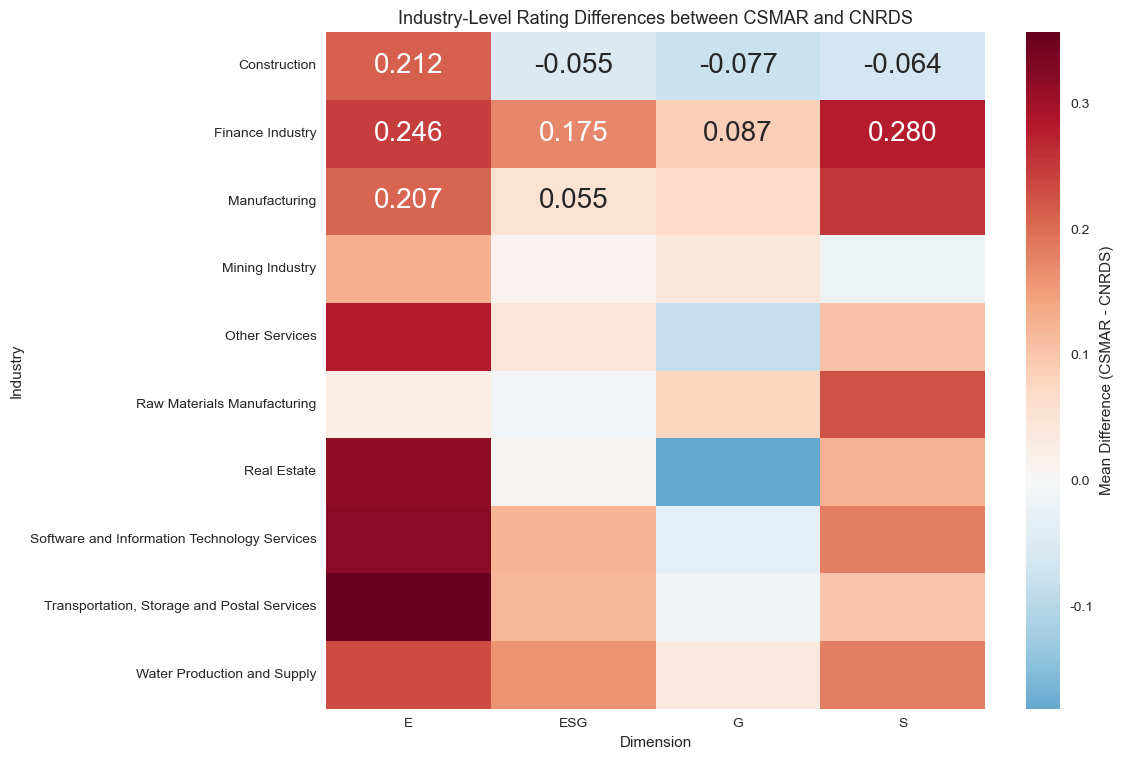


Industry Level Difference Visualization:
Industry
Finance Industry                                0.1969
Software and Information Technology Services    0.1643
Real Estate                                     0.1570
Water Production and Supply                     0.1518
Transportation, Storage and Postal Services     0.1480
Manufacturing                                   0.1461
Other Services                                  0.1290
Construction                                    0.1020
Raw Materials Manufacturing                     0.0863
Mining Industry                                 0.0488
dtype: float64


In [408]:
# 创建行业差异热图
print("\n创建行业差异可视化...")

# 准备热图数据
heatmap_data = []
for industry in significant_industries:
    for dim in ['ESG', 'E', 'S', 'G']:
        industry_row = industry_df[industry_df['Industry'] == industry]
        if len(industry_row) > 0 and not industry_row[f'{dim}_Mean_Diff'].isna().iloc[0]:
            mean_diff = industry_row[f'{dim}_Mean_Diff'].iloc[0]
            significant = industry_row[f'{dim}_Significant_Corrected'].iloc[0] if not industry_row[f'{dim}_Significant_Corrected'].isna().iloc[0] else False
            
            heatmap_data.append({
                'Industry': industry,
                'Dimension': dim,
                'Mean_Difference': mean_diff,
                'Significant': significant
            })

heatmap_df = pd.DataFrame(heatmap_data)

if len(heatmap_df) > 0:
    # 创建热图
    pivot_table = heatmap_df.pivot(index='Industry', columns='Dimension', values='Mean_Difference')
    
    plt.figure(figsize=(12, 8))
    
    # 创建显著性标记
    significance_table = heatmap_df.pivot(index='Industry', columns='Dimension', values='Significant')
    
    # 绘制热图
    mask = pivot_table.isnull()
    sns.heatmap(pivot_table, annot=True, cmap='RdBu_r', center=0, 
                fmt='.3f', cbar_kws={'label': 'Mean Difference (CSMAR - CNRDS)'},
                mask=mask)
    
    plt.title('Industry-Level Rating Differences between CSMAR and CNRDS')
    plt.tight_layout()
    plt.show()
    
    # 创建行业差异排名
    print("\nIndustry Level Difference Visualization:")
    industry_avg_diff = pivot_table.abs().mean(axis=1).sort_values(ascending=False)
    print(industry_avg_diff.head(10).round(4))


创建行业差异可视化...


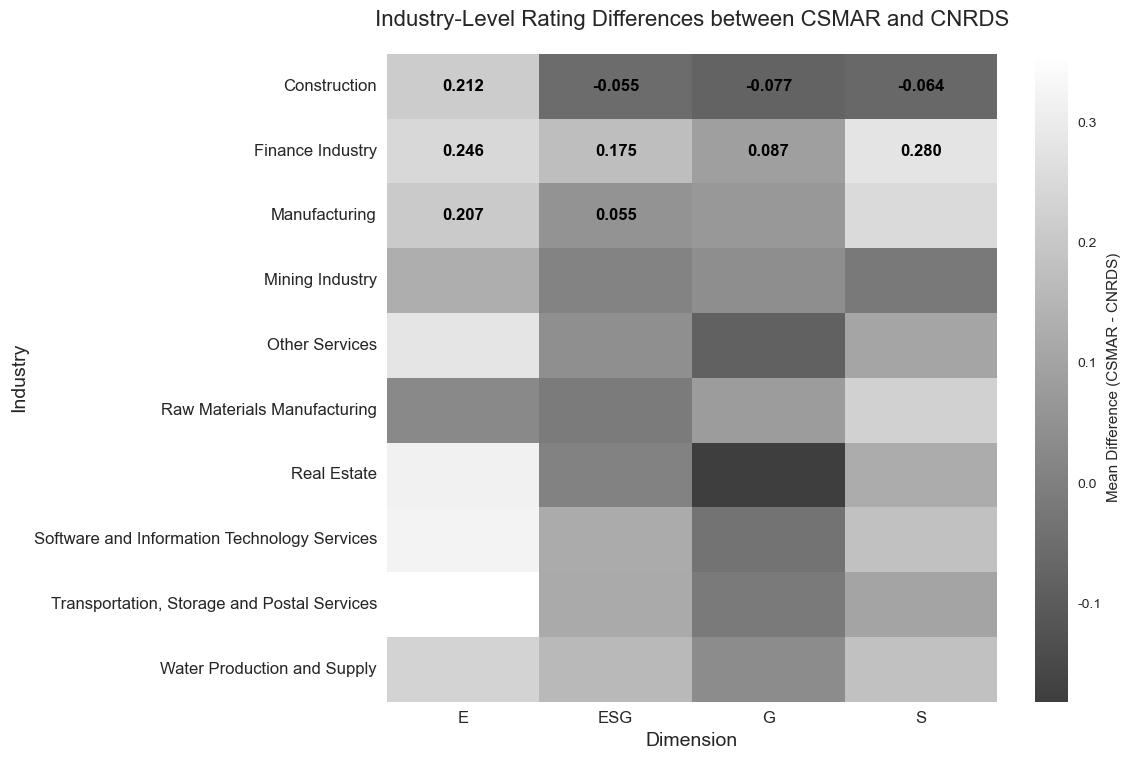


Industry Level Difference Visualization:
Industry
Finance Industry                                0.1969
Software and Information Technology Services    0.1643
Real Estate                                     0.1570
Water Production and Supply                     0.1518
Transportation, Storage and Postal Services     0.1480
Manufacturing                                   0.1461
Other Services                                  0.1290
Construction                                    0.1020
Raw Materials Manufacturing                     0.0863
Mining Industry                                 0.0488
dtype: float64
Dimension                                            E       ESG         G  \
Industry                                                                     
Construction                                  0.212498 -0.054685 -0.077014   
Finance Industry                              0.246190  0.174882  0.086761   
Manufacturing                                 0.207041  0.054945  0.0705

In [418]:
# 创建行业差异热图
print("\n创建行业差异可视化...")

# 准备热图数据
heatmap_data = []
for industry in significant_industries:
    for dim in ['ESG', 'E', 'S', 'G']:
        industry_row = industry_df[industry_df['Industry'] == industry]
        if len(industry_row) > 0 and not industry_row[f'{dim}_Mean_Diff'].isna().iloc[0]:
            mean_diff = industry_row[f'{dim}_Mean_Diff'].iloc[0]
            significant = industry_row[f'{dim}_Significant_Corrected'].iloc[0] if not industry_row[f'{dim}_Significant_Corrected'].isna().iloc[0] else False
            
            heatmap_data.append({
                'Industry': industry,
                'Dimension': dim,
                'Mean_Difference': mean_diff,
                'Significant': significant
            })

heatmap_df = pd.DataFrame(heatmap_data)

if len(heatmap_df) > 0:
    # 创建热图
    pivot_table = heatmap_df.pivot(index='Industry', columns='Dimension', values='Mean_Difference')
    
    plt.figure(figsize=(12, 8))
    
    # 创建显著性标记
    significance_table = heatmap_df.pivot(index='Industry', columns='Dimension', values='Significant')
    
    # 绘制热图 - 黑白版本，字体加大
    mask = pivot_table.isnull()
    sns.heatmap(pivot_table, annot=True, cmap='gray', center=0, 
                fmt='.3f', cbar_kws={'label': 'Mean Difference (CSMAR - CNRDS)'},
                mask=mask,
                annot_kws={'size': 12, 'color': 'black', 'weight': 'bold'})  # 字体从9加大到12
    
    # 设置坐标轴字体大小
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Dimension', fontsize=14)
    plt.ylabel('Industry', fontsize=14)
    plt.title('Industry-Level Rating Differences between CSMAR and CNRDS', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # 创建行业差异排名
    print("\nIndustry Level Difference Visualization:")
    industry_avg_diff = pivot_table.abs().mean(axis=1).sort_values(ascending=False)
    print(industry_avg_diff.head(10).round(4))

    print(pivot_table)

## Difference Without Standardization

In [223]:
# 确保数值列是数值型
for col in ["ESG_CNRDS", "E_CNRDS", "S_CNRDS", "G_CNRDS",
            "ESG_CSMAR", "E_CSMAR", "S_CSMAR", "G_CSMAR"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# --- 分组：按年份和一级行业 (CSRC_Industry) ---
grouped = (
    df.groupby(["Year", "CSMAR_Industry_1"], as_index=False)
      .agg({
          "ESG_CNRDS": "mean",
          "E_CNRDS": "mean",
          "S_CNRDS": "mean",
          "G_CNRDS": "mean",
          "ESG_CSMAR": "mean",
          "E_CSMAR": "mean",
          "S_CSMAR": "mean",
          "G_CSMAR": "mean"
      })
)

# --- 美化列名 ---
grouped = grouped.rename(columns={
    "ESG_CNRDS": "CNRDS_ESG",
    "E_CNRDS": "CNRDS_E",
    "S_CNRDS": "CNRDS_S",
    "G_CNRDS": "CNRDS_G",
    "ESG_CSMAR": "CSMAR_ESG",
    "E_CSMAR": "CSMAR_E",
    "S_CSMAR": "CSMAR_S",
    "G_CSMAR": "CSMAR_G"
})

# 排序（按Year和行业名称）
grouped = grouped.sort_values(["Year", "CSMAR_Industry_1"]).reset_index(drop=True)



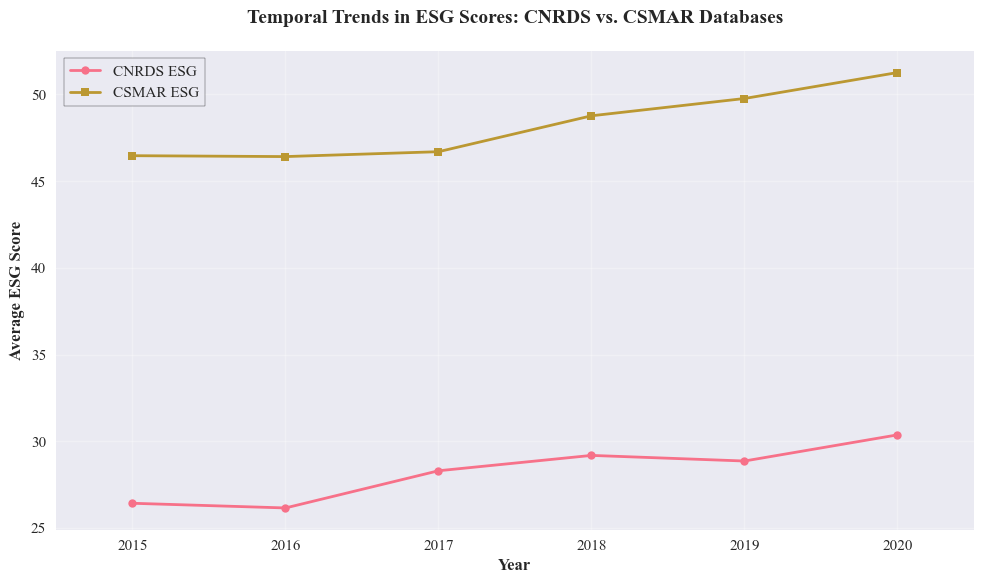

In [227]:
import matplotlib.pyplot as plt

# ============ 数据准备 ============
overall_trend = grouped.groupby("Year")[["CNRDS_ESG", "CSMAR_ESG"]].mean().reset_index()

# ============ 图表设置 ============
plt.rcParams['font.family'] = 'Times New Roman'  # 学术期刊常用字体
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(10, 6))

# 绘制趋势线
ax.plot(overall_trend["Year"], overall_trend["CNRDS_ESG"], 
        marker='o', markersize=6, linewidth=2, label="CNRDS ESG")
ax.plot(overall_trend["Year"], overall_trend["CSMAR_ESG"], 
        marker='s', markersize=6, linewidth=2, label="CSMAR ESG")

# 设置标题和标签
ax.set_title("Temporal Trends in ESG Scores: CNRDS vs. CSMAR Databases", 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=12, fontweight='bold')
ax.set_ylabel("Average ESG Score", fontsize=12, fontweight='bold')

# 设置坐标轴
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlim(overall_trend["Year"].min()-0.5, overall_trend["Year"].max()+0.5)

# 添加图例和网格
ax.legend(frameon=True, fancybox=False, shadow=False, 
          edgecolor='black', fontsize=11)
ax.grid(True, alpha=0.3, linestyle='-')

# 优化布局
plt.tight_layout()
plt.show()

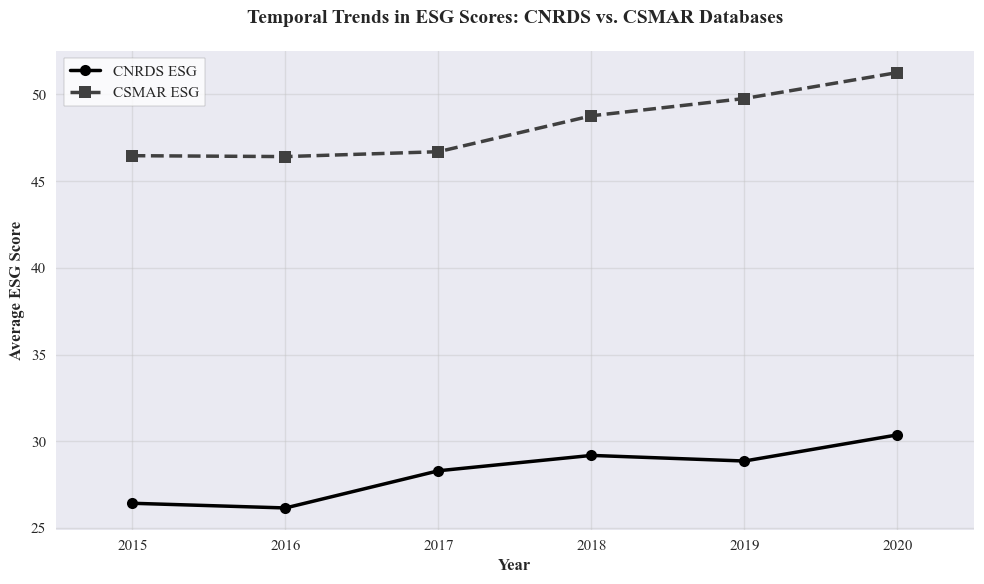

In [229]:
import matplotlib.pyplot as plt
import numpy as np

# ============ 数据准备 ============
overall_trend = grouped.groupby("Year")[["CNRDS_ESG", "CSMAR_ESG"]].mean().reset_index()

# ============ 图表设置 ============
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 定义灰度色系
gray_colors = ['#000000', '#404040', '#808080', '#A0A0A0', '#C0C0C0']  # 从黑到浅灰
marker_styles = ['o', 's', '^', 'D', 'v']  # 多种标记样式
line_styles = ['-', '--', '-.', ':']  # 多种线型

fig, ax = plt.subplots(figsize=(10, 6))

# 绘制趋势线 - 使用不同的灰度、线型和标记
ax.plot(overall_trend["Year"], overall_trend["CNRDS_ESG"], 
        color=gray_colors[0], marker=marker_styles[0], markersize=8, 
        linewidth=2.5, linestyle=line_styles[0], label="CNRDS ESG",
        markeredgecolor='black', markerfacecolor=gray_colors[0])

ax.plot(overall_trend["Year"], overall_trend["CSMAR_ESG"], 
        color=gray_colors[1], marker=marker_styles[1], markersize=8, 
        linewidth=2.5, linestyle=line_styles[1], label="CSMAR ESG",
        markeredgecolor='black', markerfacecolor=gray_colors[1])

# 设置标题和标签
ax.set_title("Temporal Trends in ESG Scores: CNRDS vs. CSMAR Databases", 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=12, fontweight='bold')
ax.set_ylabel("Average ESG Score", fontsize=12, fontweight='bold')

# 设置坐标轴
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlim(overall_trend["Year"].min()-0.5, overall_trend["Year"].max()+0.5)

# 设置网格和边框
ax.grid(True, alpha=0.4, linestyle='-', color=gray_colors[4])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(gray_colors[3])
ax.spines['bottom'].set_color(gray_colors[3])

# 图例设置
legend = ax.legend(frameon=True, fancybox=False, shadow=False, 
                  edgecolor=gray_colors[2], fontsize=11, 
                  loc='best', facecolor='white')

# 优化布局
plt.tight_layout()
plt.show()

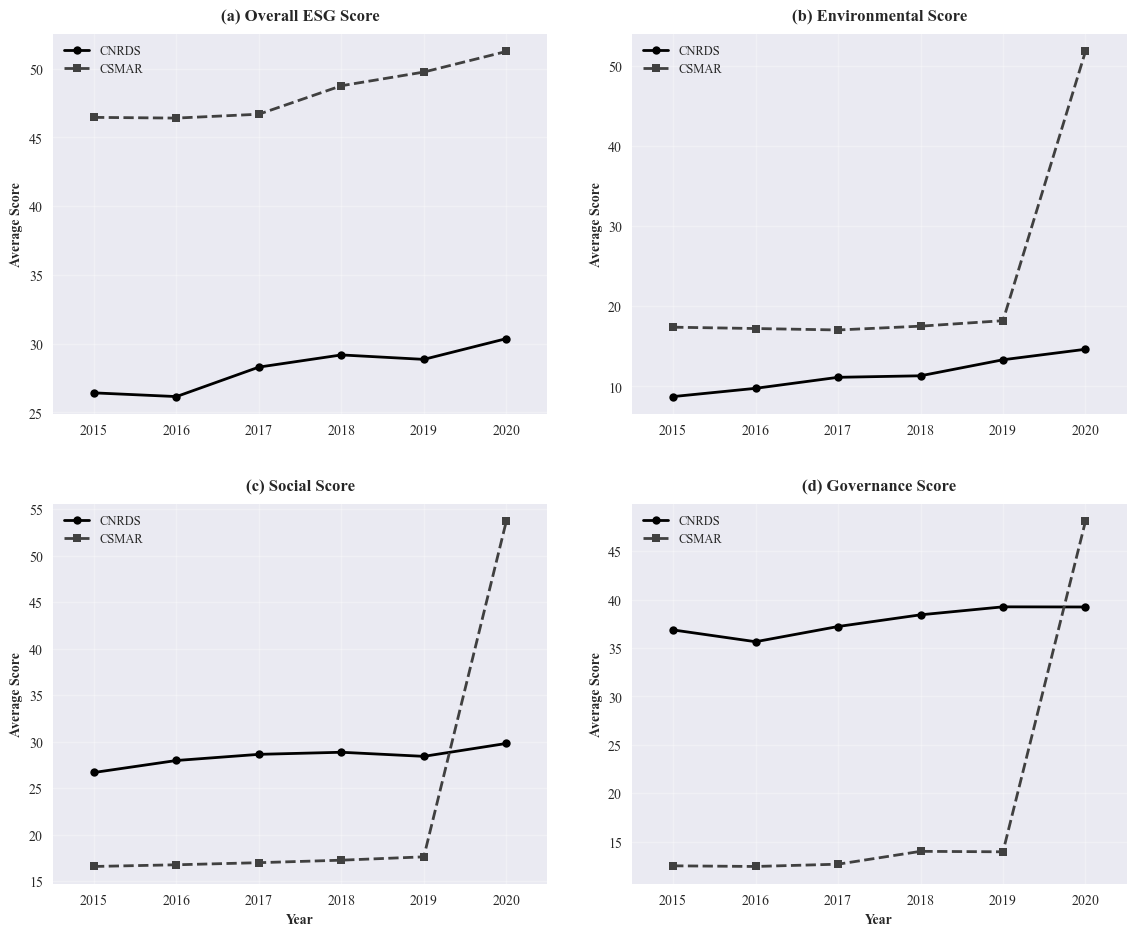

In [231]:
import matplotlib.pyplot as plt
import numpy as np

# ============ 数据准备 ============
# 假设您的数据集中有E、S、G分项分数
# 请根据实际列名调整以下字段
overall_trend = grouped.groupby("Year")[["CNRDS_ESG", "CSMAR_ESG", 
                                        "CNRDS_E", "CSMAR_E",  # 环境分数
                                        "CNRDS_S", "CSMAR_S",  # 社会分数  
                                        "CNRDS_G", "CSMAR_G"]].mean().reset_index()  # 治理分数

# ============ 图表设置 ============
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# 定义灰度色系和样式
gray_colors = ['#000000', '#404040', '#808080', '#A0A0A0']
marker_styles = ['o', 's', '^', 'D']
line_styles = ['-', '--', '-.', ':']

# 创建2×2子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # 将二维数组展平为一维

# ============ ESG总分数子图 ============
ax1 = axes[0]
ax1.plot(overall_trend["Year"], overall_trend["CNRDS_ESG"], 
        color=gray_colors[0], marker=marker_styles[0], markersize=6, 
        linewidth=2, linestyle=line_styles[0], label="CNRDS",
        markeredgecolor='black', markerfacecolor=gray_colors[0])
ax1.plot(overall_trend["Year"], overall_trend["CSMAR_ESG"], 
        color=gray_colors[1], marker=marker_styles[1], markersize=6, 
        linewidth=2, linestyle=line_styles[1], label="CSMAR",
        markeredgecolor='black', markerfacecolor=gray_colors[1])
ax1.set_title("(a) Overall ESG Score", fontsize=12, fontweight='bold', pad=10)
ax1.set_ylabel("Average Score", fontsize=10, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=9)

# ============ 环境分数子图 ============
ax2 = axes[1]
ax2.plot(overall_trend["Year"], overall_trend["CNRDS_E"], 
        color=gray_colors[0], marker=marker_styles[0], markersize=6, 
        linewidth=2, linestyle=line_styles[0], label="CNRDS",
        markeredgecolor='black', markerfacecolor=gray_colors[0])
ax2.plot(overall_trend["Year"], overall_trend["CSMAR_E"], 
        color=gray_colors[1], marker=marker_styles[1], markersize=6, 
        linewidth=2, linestyle=line_styles[1], label="CSMAR",
        markeredgecolor='black', markerfacecolor=gray_colors[1])
ax2.set_title("(b) Environmental Score", fontsize=12, fontweight='bold', pad=10)
ax2.set_ylabel("Average Score", fontsize=10, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=9)

# ============ 社会分数子图 ============
ax3 = axes[2]
ax3.plot(overall_trend["Year"], overall_trend["CNRDS_S"], 
        color=gray_colors[0], marker=marker_styles[0], markersize=6, 
        linewidth=2, linestyle=line_styles[0], label="CNRDS",
        markeredgecolor='black', markerfacecolor=gray_colors[0])
ax3.plot(overall_trend["Year"], overall_trend["CSMAR_S"], 
        color=gray_colors[1], marker=marker_styles[1], markersize=6, 
        linewidth=2, linestyle=line_styles[1], label="CSMAR",
        markeredgecolor='black', markerfacecolor=gray_colors[1])
ax3.set_title("(c) Social Score", fontsize=12, fontweight='bold', pad=10)
ax3.set_xlabel("Year", fontsize=10, fontweight='bold')
ax3.set_ylabel("Average Score", fontsize=10, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=9)

# ============ 治理分数子图 ============
ax4 = axes[3]
ax4.plot(overall_trend["Year"], overall_trend["CNRDS_G"], 
        color=gray_colors[0], marker=marker_styles[0], markersize=6, 
        linewidth=2, linestyle=line_styles[0], label="CNRDS",
        markeredgecolor='black', markerfacecolor=gray_colors[0])
ax4.plot(overall_trend["Year"], overall_trend["CSMAR_G"], 
        color=gray_colors[1], marker=marker_styles[1], markersize=6, 
        linewidth=2, linestyle=line_styles[1], label="CSMAR",
        markeredgecolor='black', markerfacecolor=gray_colors[1])
ax4.set_title("(d) Governance Score", fontsize=12, fontweight='bold', pad=10)
ax4.set_xlabel("Year", fontsize=10, fontweight='bold')
ax4.set_ylabel("Average Score", fontsize=10, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=9)

# ============ 整体优化 ============
# 为所有子图设置统一的x轴范围
for ax in axes:
    ax.set_xlim(overall_trend["Year"].min()-0.5, overall_trend["Year"].max()+0.5)
    # 移除上方和右侧边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

In [233]:
import pandas as pd
import numpy as np

# ============ 数据准备 ============
# 按年份分组计算平均值
yearly_stats = grouped.groupby("Year").agg({
    'CNRDS_ESG': 'mean',
    'CSMAR_ESG': 'mean',
    'CNRDS_E': 'mean',   # 请根据实际列名调整
    'CSMAR_E': 'mean',
    'CNRDS_S': 'mean',   # 请根据实际列名调整
    'CSMAR_S': 'mean',
    'CNRDS_G': 'mean',   # 请根据实际列名调整
    'CSMAR_G': 'mean'
}).reset_index()

# 保留3位小数
yearly_stats = yearly_stats.round(3)

# ============ 创建格式化表格 ============
# 创建多级列索引
columns = pd.MultiIndex.from_tuples([
    ('', 'Year'),
    ('ESG Score', 'CNRDS'),
    ('ESG Score', 'CSMAR'),
    ('Environmental', 'CNRDS'),
    ('Environmental', 'CSMAR'),
    ('Social', 'CNRDS'),
    ('Social', 'CSMAR'),
    ('Governance', 'CNRDS'),
    ('Governance', 'CSMAR')
])

# 创建表格数据
table_data = []
for _, row in yearly_stats.iterrows():
    table_row = [
        int(row['Year']),
        row['CNRDS_ESG'],
        row['CSMAR_ESG'],
        row['CNRDS_E'],
        row['CSMAR_E'],
        row['CNRDS_S'],
        row['CSMAR_S'],
        row['CNRDS_G'],
        row['CSMAR_G']
    ]
    table_data.append(table_row)

# 创建DataFrame
result_table = pd.DataFrame(table_data, columns=columns)

print("年度ESG评分比较表：CNRDS vs CSMAR")
print("=" * 80)
print(result_table.to_string(index=False))
print("=" * 80)

# ============ 可选：导出到Excel ============
# 如果需要导出到Excel文件，取消以下注释
# result_table.to_excel("ESG_Score_Comparison_by_Year.xlsx", index=False)
# print("表格已导出到: ESG_Score_Comparison_by_Year.xlsx")

# ============ 可选：计算年度差异 ============
print("\n年度差异分析（CNRDS - CSMAR）：")
print("-" * 50)

diff_table_data = []
for _, row in yearly_stats.iterrows():
    diff_row = [
        int(row['Year']),
        f"{row['CNRDS_ESG'] - row['CSMAR_ESG']:+.3f}",
        f"{row['CNRDS_E'] - row['CSMAR_E']:+.3f}",
        f"{row['CNRDS_S'] - row['CSMAR_S']:+.3f}",
        f"{row['CNRDS_G'] - row['CSMAR_G']:+.3f}"
    ]
    diff_table_data.append(diff_row)

diff_columns = ['Year', 'ESG Score Diff', 'Environmental Diff', 'Social Diff', 'Governance Diff']
diff_table = pd.DataFrame(diff_table_data, columns=diff_columns)
print(diff_table.to_string(index=False))

年度ESG评分比较表：CNRDS vs CSMAR
     ESG Score        Environmental        Social        Governance       
Year     CNRDS  CSMAR         CNRDS  CSMAR  CNRDS  CSMAR      CNRDS  CSMAR
2015    26.425 46.463         8.735 17.395 26.674 16.572     36.874 12.496
2016    26.155 46.411         9.765 17.228 27.964 16.753     35.656 12.430
2017    28.299 46.693        11.140 17.048 28.625 16.978     37.228 12.666
2018    29.184 48.763        11.329 17.523 28.849 17.247     38.437 13.993
2019    28.861 49.759        13.329 18.208 28.409 17.606     39.261 13.945
2020    30.369 51.256        14.639 51.806 29.795 53.670     39.246 48.094

年度差异分析（CNRDS - CSMAR）：
--------------------------------------------------
 Year ESG Score Diff Environmental Diff Social Diff Governance Diff
 2015        -20.038             -8.660     +10.102         +24.378
 2016        -20.256             -7.463     +11.211         +23.226
 2017        -18.394             -5.908     +11.647         +24.562
 2018        -19.579       

In [235]:
import pandas as pd
from tabulate import tabulate

# ============ 美化表格版本（需要安装tabulate: pip install tabulate） ============

# 准备数据
yearly_stats = grouped.groupby("Year").agg({
    'CNRDS_ESG': 'mean',
    'CSMAR_ESG': 'mean',
    'CNRDS_E': 'mean',
    'CSMAR_E': 'mean',
    'CNRDS_S': 'mean',
    'CSMAR_S': 'mean',
    'CNRDS_G': 'mean',
    'CSMAR_G': 'mean'
}).round(3).reset_index()

# 创建对比表格
comparison_data = []
for _, row in yearly_stats.iterrows():
    comparison_data.append([
        int(row['Year']),
        f"{row['CNRDS_ESG']} / {row['CSMAR_ESG']}",
        f"{row['CNRDS_E']} / {row['CSMAR_E']}",
        f"{row['CNRDS_S']} / {row['CSMAR_S']}",
        f"{row['CNRDS_G']} / {row['CSMAR_G']}"
    ])

# 使用tabulate创建美观表格
headers = ['Year', 'ESG Score\n(CNRDS/CSMAR)', 'Environmental\n(CNRDS/CSMAR)', 
           'Social\n(CNRDS/CSMAR)', 'Governance\n(CNRDS/CSMAR)']

print("ESG评分年度比较表")
print("=" * 70)
print(tabulate(comparison_data, headers=headers, tablefmt='grid', stralign='center'))
print("=" * 70)

# ============ 统计摘要 ============
print("\n统计摘要：")
print("-" * 40)

summary_data = [
    ["平均值", 
     f"{yearly_stats['CNRDS_ESG'].mean():.3f} / {yearly_stats['CSMAR_ESG'].mean():.3f}",
     f"{yearly_stats['CNRDS_E'].mean():.3f} / {yearly_stats['CSMAR_E'].mean():.3f}",
     f"{yearly_stats['CNRDS_S'].mean():.3f} / {yearly_stats['CSMAR_S'].mean():.3f}",
     f"{yearly_stats['CNRDS_G'].mean():.3f} / {yearly_stats['CSMAR_G'].mean():.3f}"],
    
    ["标准差", 
     f"{yearly_stats['CNRDS_ESG'].std():.3f} / {yearly_stats['CSMAR_ESG'].std():.3f}",
     f"{yearly_stats['CNRDS_E'].std():.3f} / {yearly_stats['CSMAR_E'].std():.3f}",
     f"{yearly_stats['CNRDS_S'].std():.3f} / {yearly_stats['CSMAR_S'].std():.3f}",
     f"{yearly_stats['CNRDS_G'].std():.3f} / {yearly_stats['CSMAR_G'].std():.3f}"]
]

summary_headers = ['统计量', 'ESG Score\n(CNRDS/CSMAR)', 'Environmental\n(CNRDS/CSMAR)', 
                  'Social\n(CNRDS/CSMAR)', 'Governance\n(CNRDS/CSMAR)']

print(tabulate(summary_data, headers=summary_headers, tablefmt='simple'))

ESG评分年度比较表
+--------+-----------------+-----------------+-----------------+-----------------+
|   Year |    ESG Score    |  Environmental  |     Social      |   Governance    |
|        |  (CNRDS/CSMAR)  |  (CNRDS/CSMAR)  |  (CNRDS/CSMAR)  |  (CNRDS/CSMAR)  |
+========+=================+=================+=================+=================+
|   2015 | 26.425 / 46.463 | 8.735 / 17.395  | 26.674 / 16.572 | 36.874 / 12.496 |
+--------+-----------------+-----------------+-----------------+-----------------+
|   2016 | 26.155 / 46.411 | 9.765 / 17.228  | 27.964 / 16.753 | 35.656 / 12.43  |
+--------+-----------------+-----------------+-----------------+-----------------+
|   2017 | 28.299 / 46.693 | 11.14 / 17.048  | 28.625 / 16.978 | 37.228 / 12.666 |
+--------+-----------------+-----------------+-----------------+-----------------+
|   2018 | 29.184 / 48.763 | 11.329 / 17.523 | 28.849 / 17.247 | 38.437 / 13.993 |
+--------+-----------------+-----------------+-----------------+------------

Top 5 industries (by CNRDS ESG mean):
Index(['Construction', 'Mining Industry', 'Raw Materials Manufacturing',
       'Health and Social Work', 'Leasing and Business Services'],
      dtype='object', name='CSMAR_Industry_1')


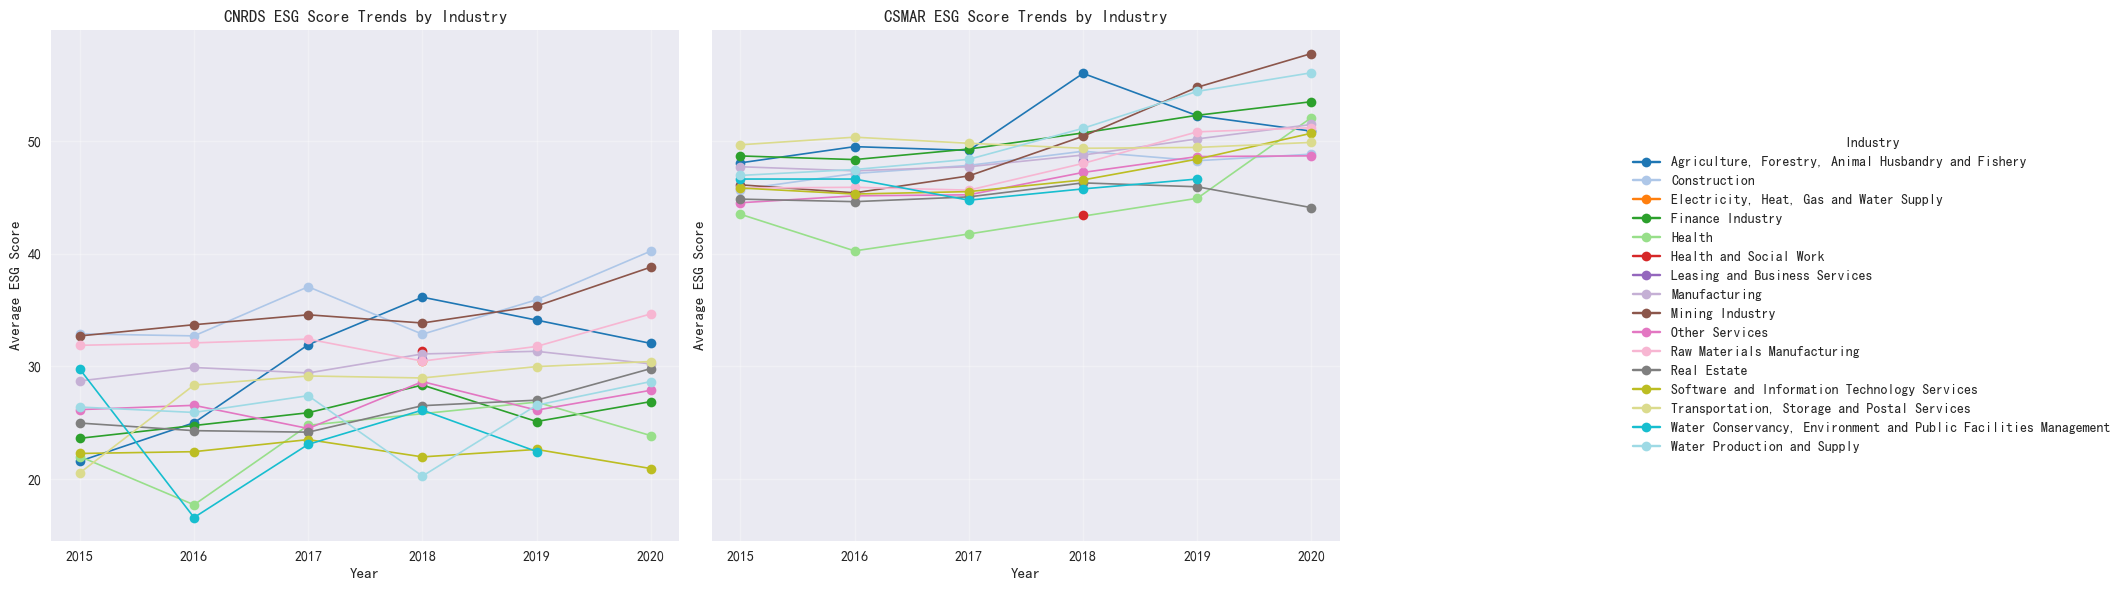

In [176]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

top5 = (
    grouped.groupby("CSMAR_Industry_1")["CNRDS_ESG"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)
print("Top 5 industries (by CNRDS ESG mean):")
print(top5)

industries = sorted(top5)


# grouped: columns ["Year","CSRC_Industry","CNRDS_ESG","CSMAR_ESG"]

# 统一的行业颜色映射（两个图共用）
industries = sorted(grouped["CSMAR_Industry_1"].unique())
cmap = plt.get_cmap("tab20", len(industries))
color_map = {ind: cmap(i) for i, ind in enumerate(industries)}

# 画两个独立图（共享y轴），只保留一个总图例放在右侧，不遮挡图面
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for ind in industries:
    sub = grouped[grouped["CSMAR_Industry_1"] == ind].sort_values("Year")
    color = color_map[ind]
    axes[0].plot(sub["Year"], sub["CNRDS_ESG"], marker="o", linewidth=1.2, color=color)
    axes[1].plot(sub["Year"], sub["CSMAR_ESG"], marker="o", linewidth=1.2, color=color)

# 左：CNRDS；右：CSMAR
axes[0].set_title("CNRDS ESG Score Trends by Industry")
axes[1].set_title("CSMAR ESG Score Trends by Industry")
for ax in axes:
    ax.set_xlabel("Year")
    ax.set_ylabel("Average ESG Score")
    ax.grid(alpha=0.3)

# 只生成一个行业颜色图例，放到右侧
legend_handles = [mlines.Line2D([], [], color=color_map[ind], marker="o", linestyle="-", label=ind)
                  for ind in industries]
fig.legend(legend_handles, [h.get_label() for h in legend_handles],
           title="Industry", bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0.)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # 右侧留空给图例
plt.show()


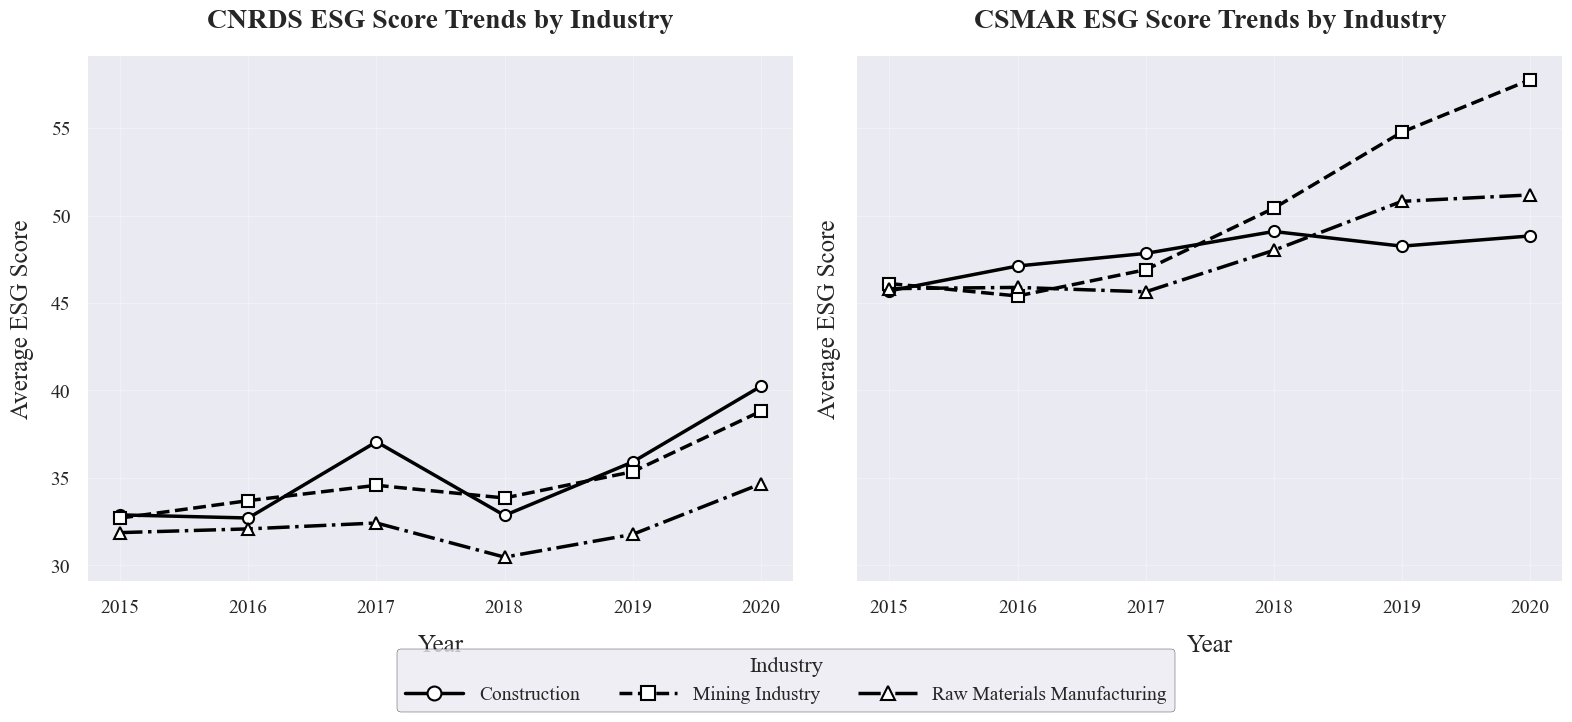

图片已保存为: ESG_Trends_Comparison_BW.png 和 ESG_Trends_Comparison_BW.pdf


In [291]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# 设置学术图表风格 - 增大字体
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16  # 增大基础字体
plt.rcParams['axes.labelsize'] = 18  # 增大坐标轴标签字体
plt.rcParams['axes.titlesize'] = 20  # 增大标题字体
plt.rcParams['legend.fontsize'] = 14  # 增大图例字体
plt.rcParams['xtick.labelsize'] = 14  # 增大横轴数字字体
plt.rcParams['ytick.labelsize'] = 14  # 增大纵轴数字字体

# 选择前3个行业
top3 = (
    grouped.groupby("CSMAR_Industry_1")["CNRDS_ESG"]
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .index
)
industries = sorted(top3)

# 定义线型和标记组合
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
markers = ['o', 's', '^', 'D', 'v']

style_map = {}
for i, industry in enumerate(industries):
    style_map[industry] = {
        'linestyle': line_styles[i % len(line_styles)],
        'marker': markers[i % len(markers)],
        'markerfacecolor': 'white'
    }

# 创建子图 - 调整高度为图例留出更多空间
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)  # 增大尺寸

# 绘制数据
for i, industry in enumerate(industries):
    sub = grouped[grouped["CSMAR_Industry_1"] == industry].sort_values("Year")
    style = style_map[industry]
    
    axes[0].plot(sub["Year"], sub["CNRDS_ESG"], 
                marker=style['marker'], 
                linestyle=style['linestyle'],
                linewidth=2.5,  # 增大线宽
                color='black',
                markerfacecolor=style['markerfacecolor'],
                markeredgecolor='black',
                markersize=8,  # 增大标记
                markeredgewidth=1.5)  # 增大标记边框

for i, industry in enumerate(industries):
    sub = grouped[grouped["CSMAR_Industry_1"] == industry].sort_values("Year")
    style = style_map[industry]
    
    axes[1].plot(sub["Year"], sub["CSMAR_ESG"], 
                marker=style['marker'], 
                linestyle=style['linestyle'],
                linewidth=2.5, 
                color='black',
                markerfacecolor=style['markerfacecolor'],
                markeredgecolor='black',
                markersize=8,
                markeredgewidth=1.5)

# 设置图表标题和标签
axes[0].set_title("CNRDS ESG Score Trends by Industry", fontweight='bold', pad=20)
axes[1].set_title("CSMAR ESG Score Trends by Industry", fontweight='bold', pad=20)

for ax in axes:
    ax.set_xlabel("Year", labelpad=12)
    ax.set_ylabel("Average ESG Score", labelpad=12)
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 增大坐标轴刻度
    ax.tick_params(axis='both', which='major', length=6, width=1.2)

# 创建图例 - 增大图例元素
legend_handles = []
for industry in industries:
    style = style_map[industry]
    handle = mlines.Line2D([], [], 
                          color='black',
                          marker=style['marker'],
                          linestyle=style['linestyle'],
                          linewidth=2.5,
                          markerfacecolor=style['markerfacecolor'],
                          markeredgecolor='black',
                          markersize=10,  # 增大图例标记
                          markeredgewidth=1.5,
                          label=industry)
    legend_handles.append(handle)

# 图例放在图表下方 - 调整位置避免遮挡
fig.legend(legend_handles, [h.get_label() for h in legend_handles],
           title="Industry", 
           title_fontsize=16,  # 增大图例标题字体
           bbox_to_anchor=(0.5, 0.03),  # 稍微提高位置
           loc="lower center", 
           borderaxespad=0.5,  # 增加边框间距
           frameon=True,
           edgecolor='black',
           ncol=3,
           handlelength=3.0,  # 增大图例线长
           columnspacing=2.0,  # 增加列间距
           handletextpad=0.8)  # 增加标记和文本间距

# 调整布局，为底部图例留出足够空间
plt.tight_layout(rect=[0, 0.08, 1, 0.95])  # 调整底部空间

# 保存图片
plt.savefig('ESG_Trends_Comparison_BW.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('ESG_Trends_Comparison_BW.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

print("图片已保存为: ESG_Trends_Comparison_BW.png 和 ESG_Trends_Comparison_BW.pdf")

In [275]:
# 获取所有行业并按CNRDS ESG均值排序
all_industries = (
    grouped.groupby("CSMAR_Industry_1")["CNRDS_ESG"]
    .mean()
    .sort_values(ascending=False)
    .index
)

print("ESG SCORE SUMMARY BY INDUSTRY (ALL INDUSTRIES)")
print("=" * 80)

for system in ['CNRDS_ESG', 'CSMAR_ESG']:
    print(f"\n{system.replace('_ESG', '')} SYSTEM:")
    print("-" * 80)
    
    # 创建透视表 - 包含所有行业
    pivot_table = grouped.pivot_table(
        index='CSMAR_Industry_1', 
        columns='Year', 
        values=system, 
        aggfunc='mean'
    ).loc[all_industries]  # 使用所有行业
    
    # 打印表格头
    print(f"{'Industry':<25}", end="")
    for year in pivot_table.columns:
        print(f"{year:<10}", end="")
    print(f"{'Mean':<12}{'Std':<12}{'Count':<10}")
    print("-" * 80)
    
    # 打印每个行业的数据
    for industry in all_industries:
        print(f"{industry:<25}", end="")
        
        # 打印每年的分数
        for year in pivot_table.columns:
            score = pivot_table.loc[industry, year]
            print(f"{score:<10.3f}", end="")
        
        # 行业整体统计
        industry_scores = grouped[grouped['CSMAR_Industry_1'] == industry][system]
        count = len(industry_scores)
        print(f"{industry_scores.mean():<12.3f}{industry_scores.std():<12.3f}{count:<10}")

print(f"\nOverall Statistics:")
print(f"CNRDS - Mean: {grouped['CNRDS_ESG'].mean():.3f}, Std: {grouped['CNRDS_ESG'].std():.3f}, Count: {len(grouped)}")
print(f"CSMAR - Mean: {grouped['CSMAR_ESG'].mean():.3f}, Std: {grouped['CSMAR_ESG'].std():.3f}, Count: {len(grouped)}")

# 添加排名信息
print("\n" + "=" * 80)
print("INDUSTRY RANKING BY CNRDS ESG MEAN")
print("=" * 80)
print(f"{'Rank':<6}{'Industry':<25}{'CNRDS_Mean':<12}{'CSMAR_Mean':<12}{'Difference':<12}")
print("-" * 80)

for rank, industry in enumerate(all_industries, 1):
    cnrds_mean = grouped[grouped['CSMAR_Industry_1'] == industry]['CNRDS_ESG'].mean()
    csmar_mean = grouped[grouped['CSMAR_Industry_1'] == industry]['CSMAR_ESG'].mean()
    difference = cnrds_mean - csmar_mean
    
    print(f"{rank:<6}{industry:<25}{cnrds_mean:<12.3f}{csmar_mean:<12.3f}{difference:<12.3f}")

ESG SCORE SUMMARY BY INDUSTRY (ALL INDUSTRIES)

CNRDS SYSTEM:
--------------------------------------------------------------------------------
Industry                 2015      2016      2017      2018      2019      2020      Mean        Std         Count     
--------------------------------------------------------------------------------
Construction             32.887    32.709    37.067    32.855    35.911    40.234    35.277      3.045       6         
Mining Industry          32.706    33.701    34.579    33.852    35.356    38.809    34.834      2.141       6         
Raw Materials Manufacturing31.873    32.086    32.423    30.471    31.772    34.658    32.214      1.370       6         
Health and Social Work   nan       nan       nan       31.345    nan       nan       31.345      nan         1         
Leasing and Business Servicesnan       nan       nan       30.627    nan       nan       30.627      nan         1         
Electricity, Heat, Gas and Water Supplynan       n

Top 5 industries (by CNRDS ESG mean):
Index(['Construction', 'Mining Industry', 'Raw Materials Manufacturing',
       'Health and Social Work', 'Leasing and Business Services'],
      dtype='object', name='CSMAR_Industry_1')


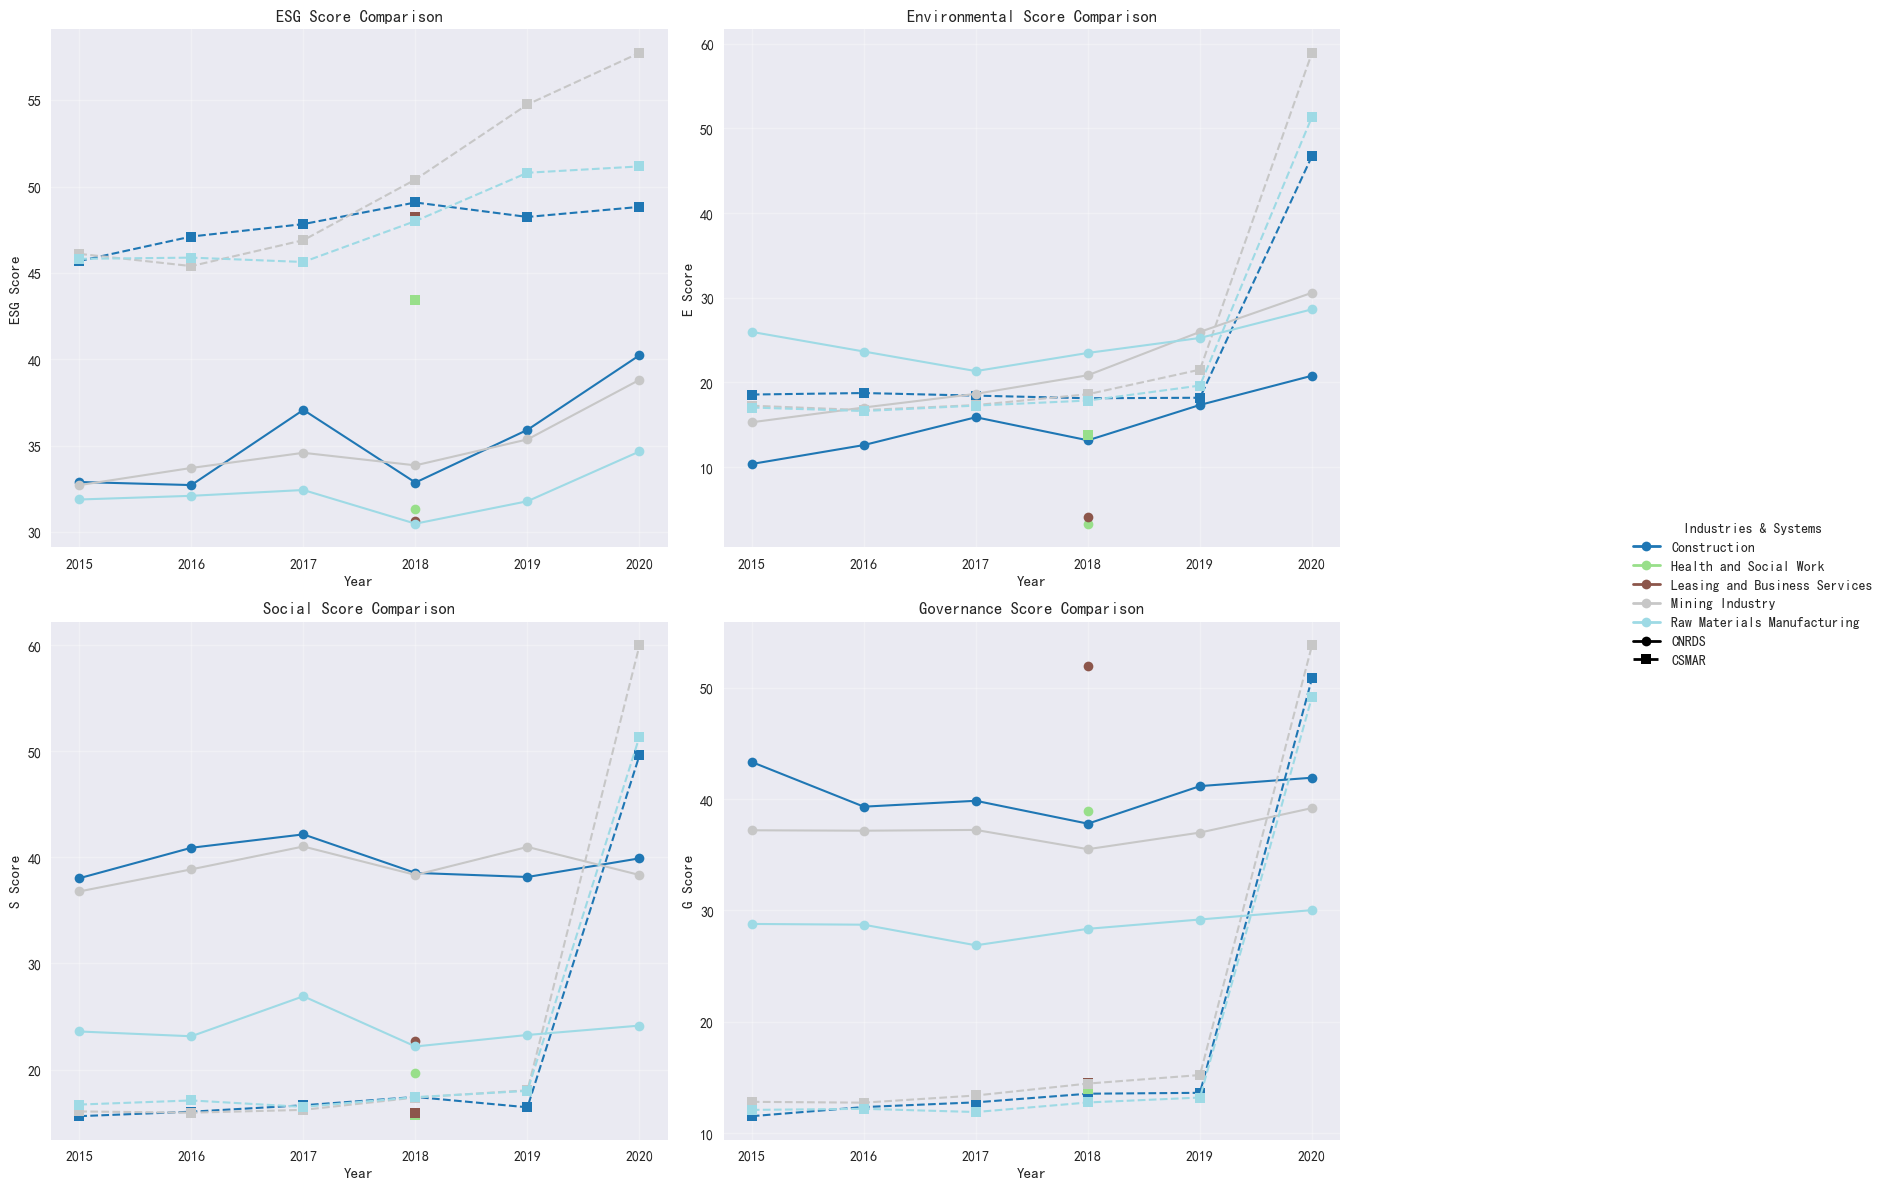


Alternative: Separate comparison for each industry


In [162]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# 获取前5个行业
top5 = (
    grouped.groupby("CSMAR_Industry_1")["CNRDS_ESG"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)
print("Top 5 industries (by CNRDS ESG mean):")
print(top5)

industries = sorted(top5)

# 统一的行业颜色映射
cmap = plt.get_cmap("tab20", len(industries))
color_map = {ind: cmap(i) for i, ind in enumerate(industries)}

# 创建4个子图：ESG, E, S, G
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# 维度列表
dimensions = ['ESG', 'E', 'S', 'G']
titles = ['ESG Score Comparison', 'Environmental Score Comparison', 
          'Social Score Comparison', 'Governance Score Comparison']

for idx, dim in enumerate(dimensions):
    ax = axes[idx]
    
    for ind in industries:
        sub = grouped[grouped["CSMAR_Industry_1"] == ind].sort_values("Year")
        color = color_map[ind]
        
        # 绘制两个系统的得分线
        ax.plot(sub["Year"], sub[f"CNRDS_{dim}"], marker="o", linewidth=1.5, 
                color=color, linestyle="-", label=f'{ind} (CNRDS)')
        ax.plot(sub["Year"], sub[f"CSMAR_{dim}"], marker="s", linewidth=1.5, 
                color=color, linestyle="--", label=f'{ind} (CSMAR)')
    
    ax.set_title(titles[idx])
    ax.set_xlabel("Year")
    ax.set_ylabel(f"{dim} Score")
    ax.grid(alpha=0.3)

# 创建图例 - 行业颜色
industry_handles = [mlines.Line2D([], [], color=color_map[ind], marker="o", 
                                 linestyle="-", linewidth=2, label=ind)
                   for ind in industries]

# 创建图例 - 系统样式
system_handles = [
    mlines.Line2D([], [], color='black', marker="o", linestyle="-", linewidth=2, label='CNRDS'),
    mlines.Line2D([], [], color='black', marker="s", linestyle="--", linewidth=2, label='CSMAR')
]

# 添加图例
fig.legend(industry_handles + system_handles, 
          [h.get_label() for h in industry_handles + system_handles],
          title="Industries & Systems", 
          bbox_to_anchor=(1.02, 0.5), 
          loc="center left", 
          borderaxespad=0.)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # 右侧留空给图例
plt.show()

# 可选：也可以分别显示每个行业的对比图
print("\n" + "="*50)
print("Alternative: Separate comparison for each industry")
print("="*50)

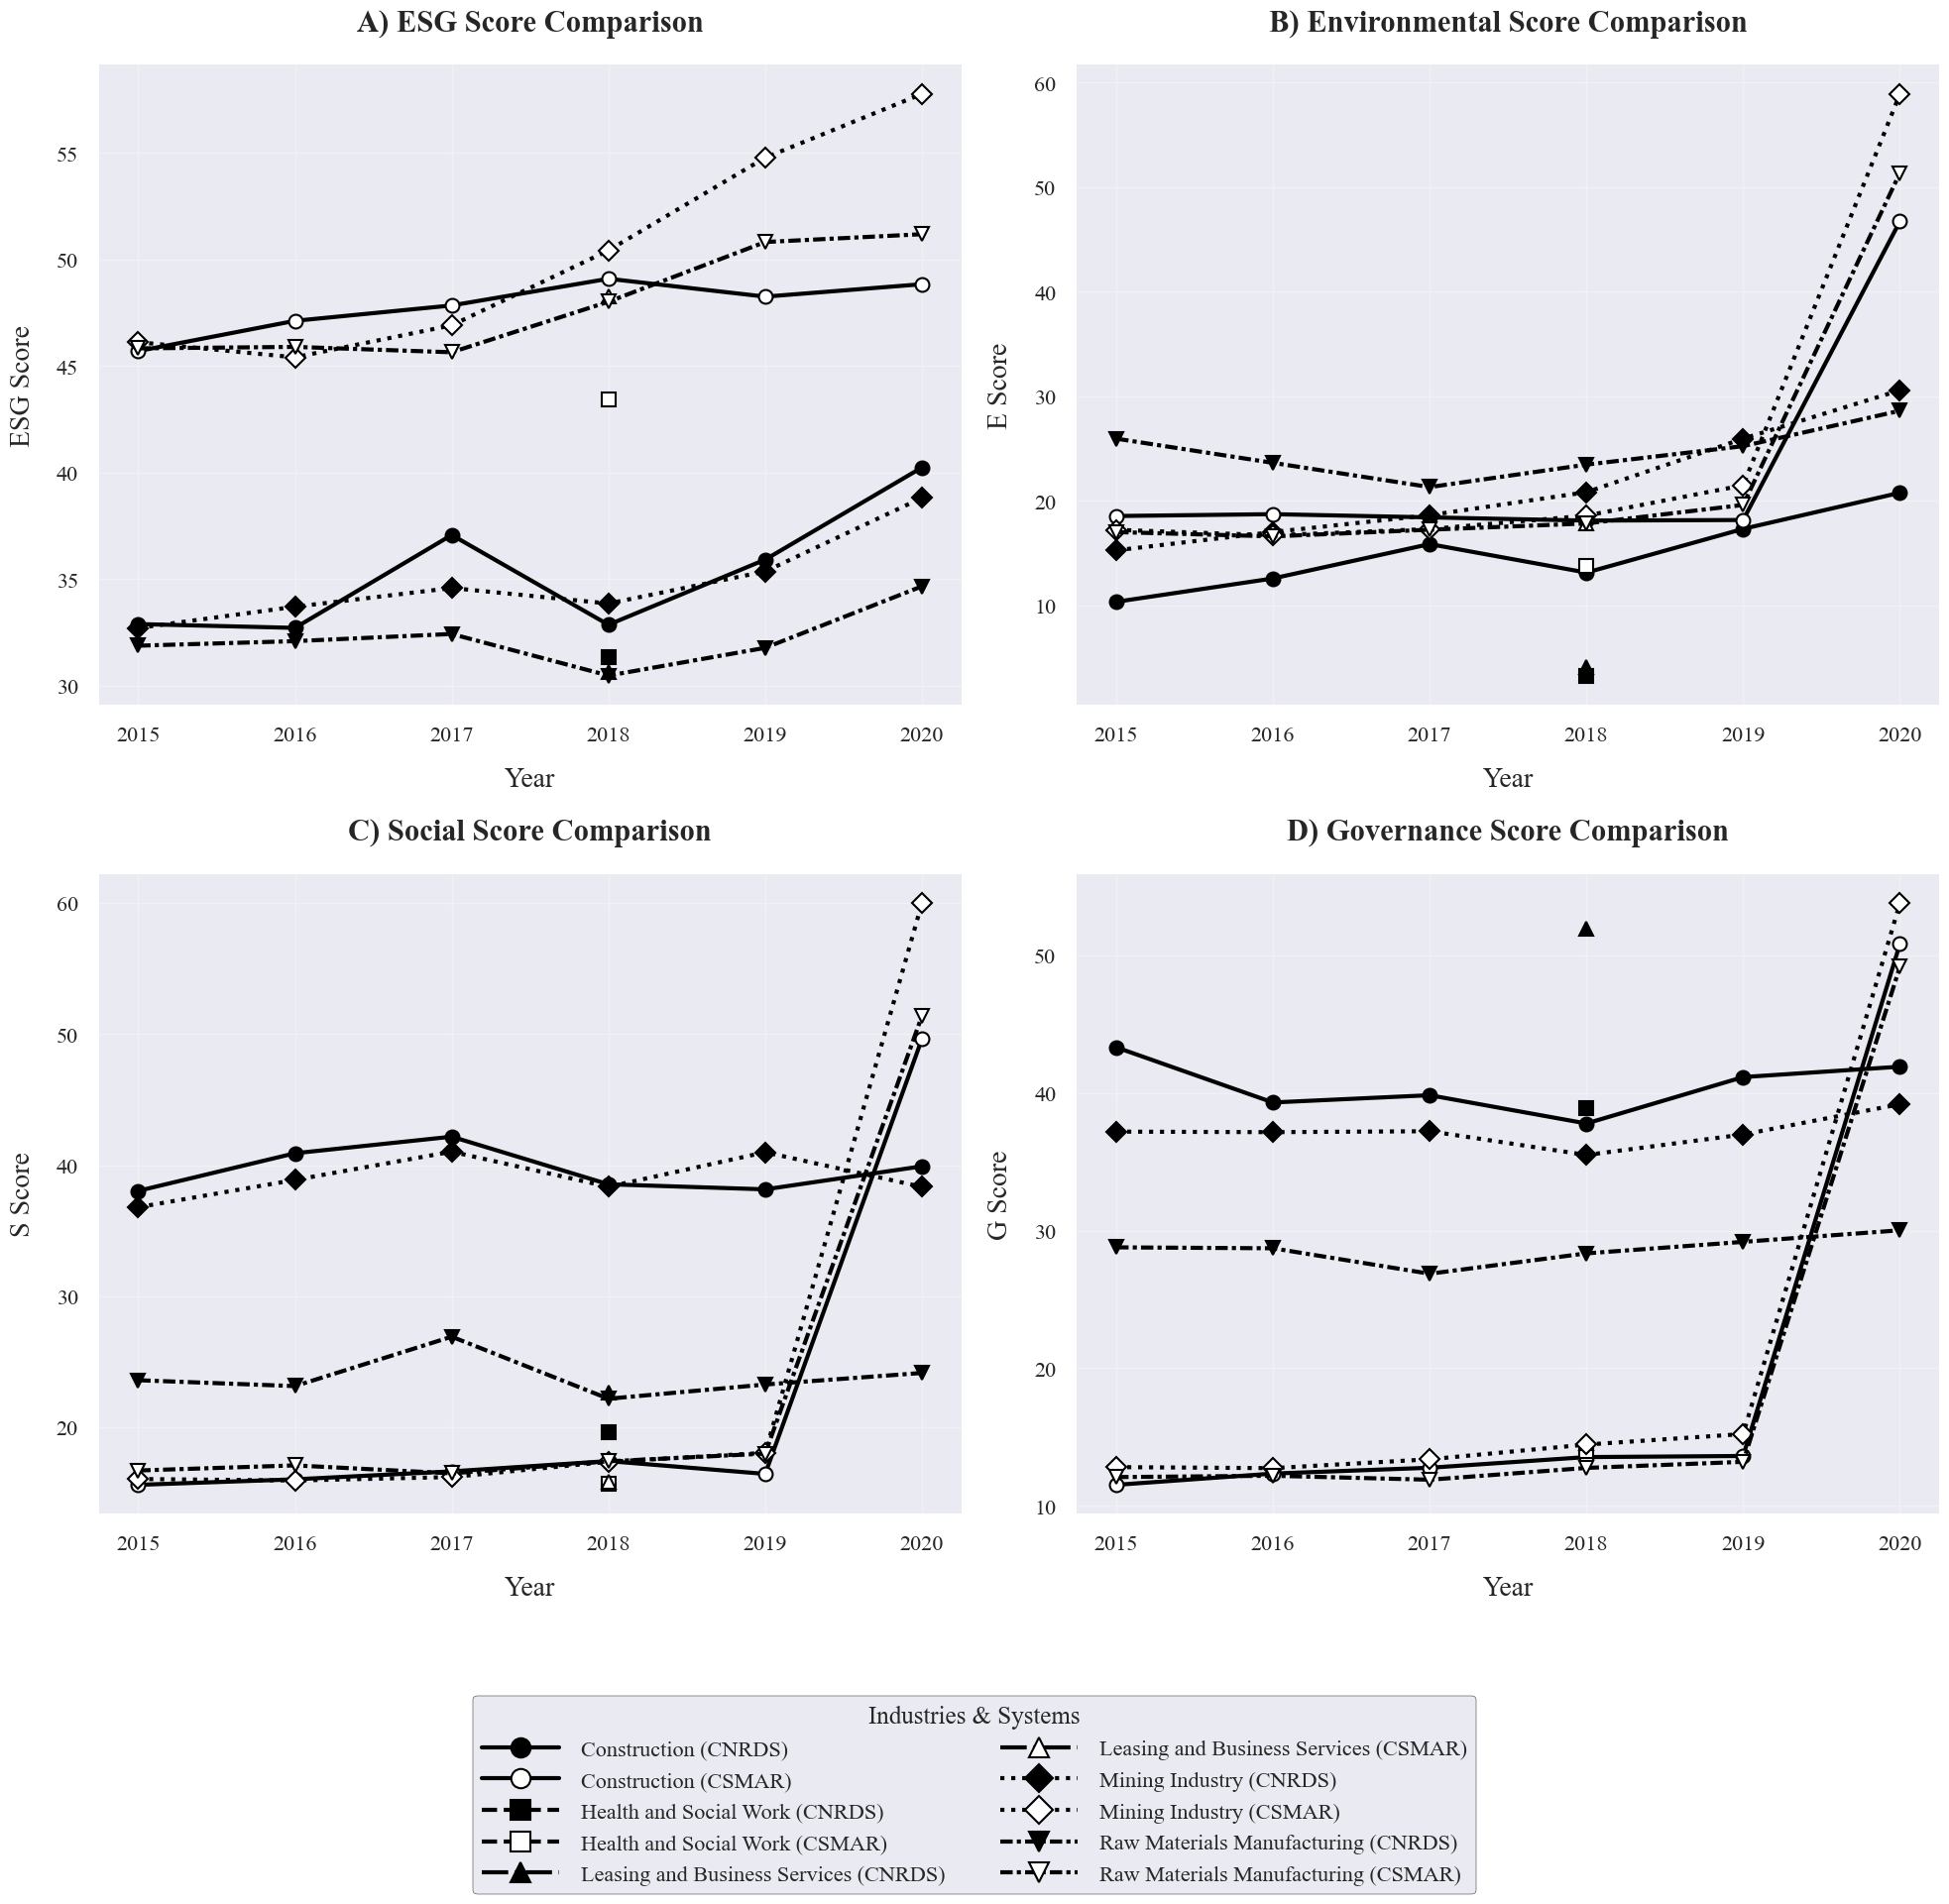


STYLE MAPPING EXPLANATION
Construction: - line with o marker
  - CNRDS: Solid o marker
  - CSMAR: Hollow o marker with black border

Health and Social Work: -- line with s marker
  - CNRDS: Solid s marker
  - CSMAR: Hollow s marker with black border

Leasing and Business Services: -. line with ^ marker
  - CNRDS: Solid ^ marker
  - CSMAR: Hollow ^ marker with black border

Mining Industry: : line with D marker
  - CNRDS: Solid D marker
  - CSMAR: Hollow D marker with black border

Raw Materials Manufacturing: (0, (3, 1, 1, 1)) line with v marker
  - CNRDS: Solid v marker
  - CSMAR: Hollow v marker with black border



<Figure size 800x550 with 0 Axes>

In [289]:
# 替代方案：使用更多线型和标记组合
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# 设置字体 - 进一步增大字体
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 18  # 进一步增大基础字体
plt.rcParams['axes.labelsize'] = 20  # 进一步增大坐标轴标签字体
plt.rcParams['axes.titlesize'] = 22  # 进一步增大标题字体
plt.rcParams['legend.fontsize'] = 16  # 增大图例字体
plt.rcParams['xtick.labelsize'] = 16  # 增大横轴数字字体
plt.rcParams['ytick.labelsize'] = 16  # 增大纵轴数字字体
plt.rcParams['legend.title_fontsize'] = 18  # 增大图例标题字体

# 获取前5个行业
top5 = (
    grouped.groupby("CSMAR_Industry_1")["CNRDS_ESG"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)
industries = sorted(top5)

# 定义更丰富的线型和标记组合
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
markers = ['o', 's', '^', 'D', 'v']

# 为每个行业分配唯一的线型+标记组合
style_map = {}
for i, industry in enumerate(industries):
    style_map[industry] = {
        'linestyle': line_styles[i % len(line_styles)],
        'marker': markers[i % len(markers)]
    }

# 创建子图 - 进一步增加高度为图例留出更多空间
fig, axes = plt.subplots(2, 2, figsize=(20, 20))  # 进一步增加高度
axes = axes.flatten()

# 维度列表和标题（添加A)、B)、C)、D)前缀）
dimensions = ['ESG', 'E', 'S', 'G']
panel_labels = ['A)', 'B)', 'C)', 'D)']
titles = ['ESG Score Comparison', 'Environmental Score Comparison', 
          'Social Score Comparison', 'Governance Score Comparison']

for idx, dim in enumerate(dimensions):
    ax = axes[idx]
    
    for i, ind in enumerate(industries):
        sub = grouped[grouped["CSMAR_Industry_1"] == ind].sort_values("Year")
        style = style_map[ind]
        
        # CNRDS - 使用行业特定的线型，实心标记
        ax.plot(sub["Year"], sub[f"CNRDS_{dim}"], 
                marker=style['marker'], linewidth=3.0, 
                color='black', linestyle=style['linestyle'],
                markersize=10, markeredgecolor='black', markerfacecolor='black',
                markeredgewidth=1.5)
        
        # CSMAR - 使用相同的线型，但空心标记（白色填充，黑色边框）
        ax.plot(sub["Year"], sub[f"CSMAR_{dim}"], 
                marker=style['marker'], linewidth=3.0, 
                color='black', linestyle=style['linestyle'],
                markersize=10, markeredgecolor='black', markerfacecolor='white',
                markeredgewidth=1.5)
    
    # 设置标题（添加A)、B)、C)、D)前缀）
    ax.set_title(f"{panel_labels[idx]} {titles[idx]}", fontweight='bold', pad=25)
    ax.set_xlabel("Year", labelpad=15)
    ax.set_ylabel(f"{dim} Score", labelpad=15)
    ax.grid(True, alpha=0.3, linewidth=1.0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 增大坐标轴刻度长度和宽度
    ax.tick_params(axis='both', which='major', length=8, width=1.5)
    ax.tick_params(axis='both', which='minor', length=4, width=1)

# 创建图例 - 进一步增大图例元素
legend_handles = []
for industry in industries:
    style = style_map[industry]
    
    # CNRDS图例项 - 进一步增大标记
    handle1 = mlines.Line2D([], [], color='black', marker=style['marker'], 
                           linestyle=style['linestyle'], linewidth=3.0, markersize=14,  # 增大标记
                           markeredgecolor='black', markerfacecolor='black',
                           markeredgewidth=1.5,
                           label=f'{industry} (CNRDS)')
    
    # CSMAR图例项 - 进一步增大标记
    handle2 = mlines.Line2D([], [], color='black', marker=style['marker'],
                           linestyle=style['linestyle'], linewidth=3.0, markersize=14,  # 增大标记
                           markeredgecolor='black', markerfacecolor='white',
                           markeredgewidth=1.5,
                           label=f'{industry} (CSMAR)')
    
    legend_handles.extend([handle1, handle2])

# 添加图例 - 放在底部，调整位置避免遮挡
fig.legend(legend_handles, [h.get_label() for h in legend_handles],
          title="Industries & Systems", 
          title_fontsize=18,  # 增大图例标题字体
          bbox_to_anchor=(0.5, 0.01),  # 进一步降低位置，避免遮挡坐标轴
          loc="lower center", 
          borderaxespad=0.5,  # 增加边框间距
          frameon=True,
          edgecolor='black',
          framealpha=1.0,
          handlelength=3.5,  # 进一步增大图例中线的长度
          ncol=2,  # 使用2列（分成两行），避免过于拥挤
          columnspacing=2.5,  # 增加列间距
          handletextpad=1.0)  # 增加标记和文本间距

# 调整布局，为底部图例留出更多空间，确保不遮挡坐标轴
plt.tight_layout(rect=[0, 0.15, 1, 0.98])  # 底部留出15%的空间给图例
plt.show()

# 打印样式映射说明
print("\n" + "="*60)
print("STYLE MAPPING EXPLANATION")
print("="*60)
for i, industry in enumerate(industries):
    style = style_map[industry]
    print(f"{industry}: {style['linestyle']} line with {style['marker']} marker")
    print(f"  - CNRDS: Solid {style['marker']} marker")
    print(f"  - CSMAR: Hollow {style['marker']} marker with black border")
    print()

# 保存为高分辨率PNG格式
plt.savefig('ESG_Score_Comparison.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

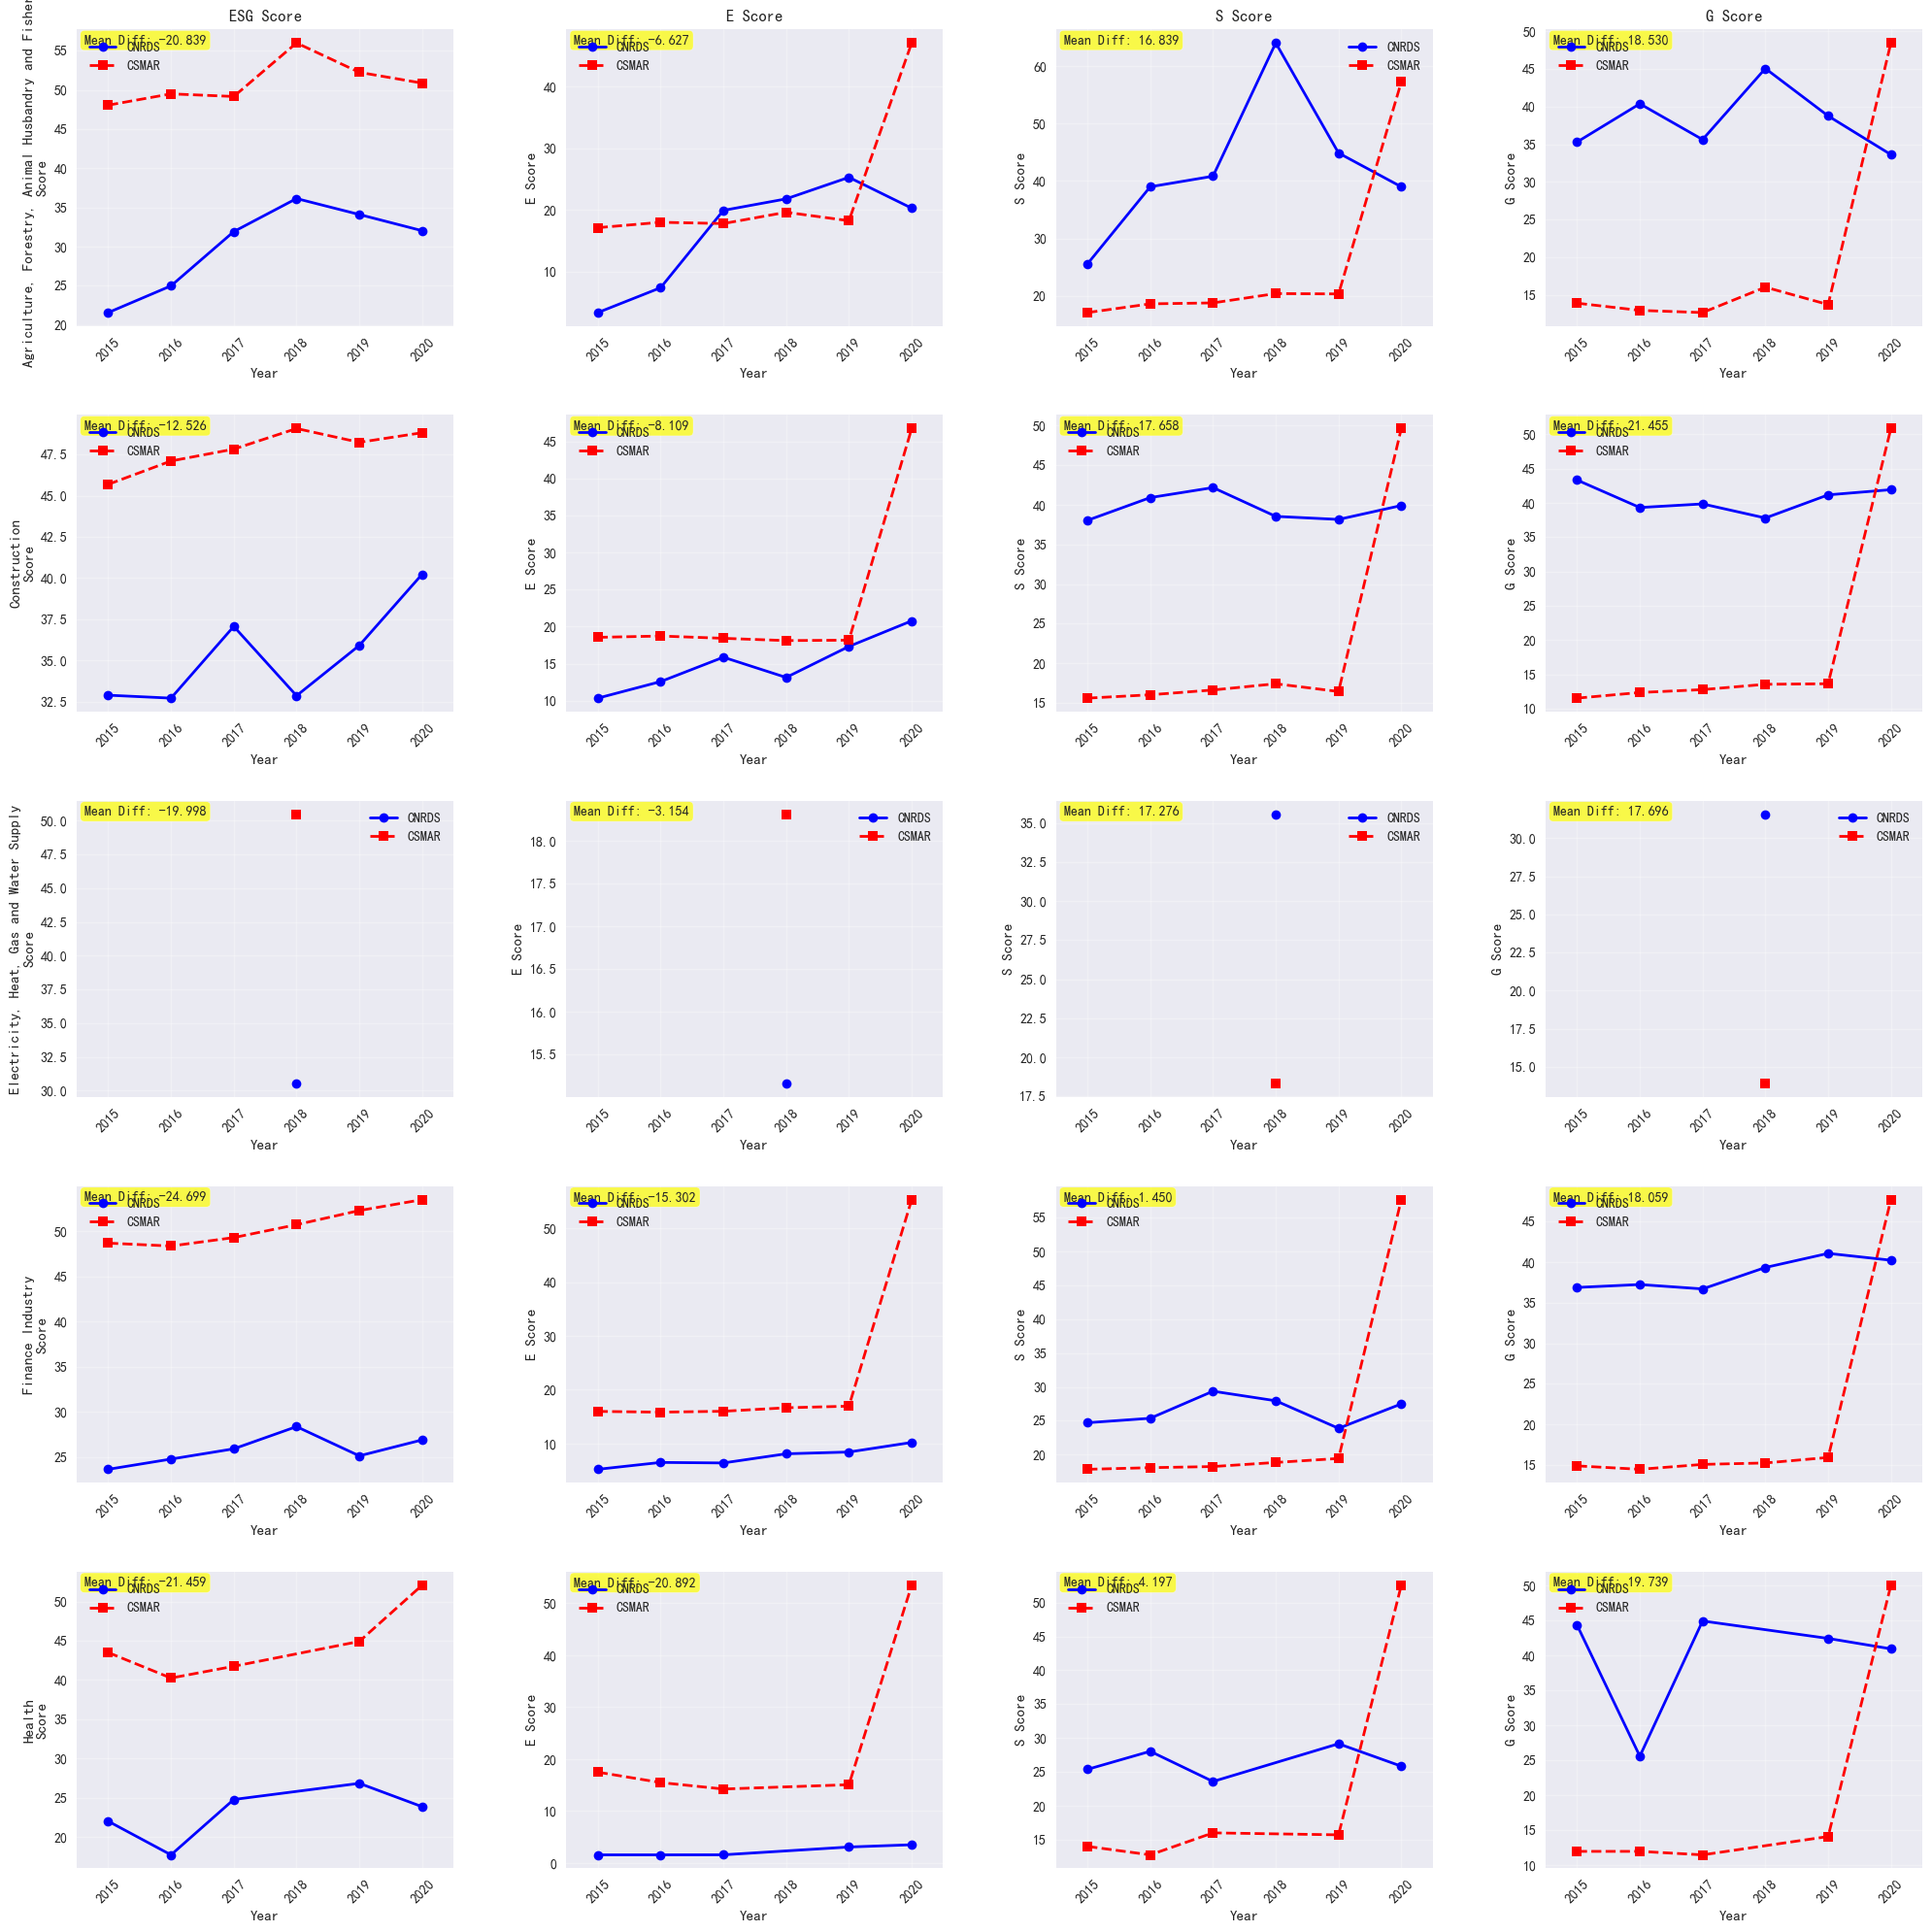

In [192]:
# 只取top 5行业
top5_industries = industries[:5]

# 创建 5行 x 4列 的子图（5个行业，4个维度）
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

# 定义统一的年份范围
years_range = range(2015, 2021)  # 2015到2020年

for i, ind in enumerate(top5_industries):
    sub = grouped[grouped["CSMAR_Industry_1"] == ind].sort_values("Year")
    
    for j, dim in enumerate(dimensions):
        ax = axes[i, j]
        
        # 筛选2015-2020年的数据
        sub_filtered = sub[sub['Year'].isin(years_range)].sort_values('Year')
        
        # 如果该维度没有数据，跳过绘制
        if len(sub_filtered) == 0:
            ax.text(0.5, 0.5, 'No Data', transform=ax.transAxes, 
                   ha='center', va='center', fontsize=12)
            ax.set_xticks([])
            ax.set_yticks([])
            continue
        
        # 绘制两个系统的得分
        ax.plot(sub_filtered["Year"], sub_filtered[f"CNRDS_{dim}"], marker="o", linewidth=2, 
                color='blue', linestyle="-", label='CNRDS')
        ax.plot(sub_filtered["Year"], sub_filtered[f"CSMAR_{dim}"], marker="s", linewidth=2, 
                color='red', linestyle="--", label='CSMAR')
        
        # 强制设置x轴范围为2015-2020，即使数据不完整
        ax.set_xlim(2014.5, 2020.5)
        ax.set_xticks(list(years_range))
        ax.set_xticklabels([str(year) for year in years_range], rotation=45)
        
        # 计算并显示平均差异
        mean_diff = (sub_filtered[f"CNRDS_{dim}"] - sub_filtered[f"CSMAR_{dim}"]).mean()
        ax.annotate(f'Mean Diff: {mean_diff:.3f}', xy=(0.02, 0.95), 
                   xycoords='axes fraction', fontsize=10,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
        
        # 设置标题：行标题为行业名，列标题为维度名
        if i == 0:  # 第一行显示维度名称
            ax.set_title(f'{dim} Score', fontweight='bold')
        if j == 0:  # 第一列显示行业名称
            ax.set_ylabel(f'{ind}\nScore', fontweight='bold')
        else:
            ax.set_ylabel(f'{dim} Score')
            
        ax.set_xlabel("Year")
        ax.legend()
        ax.grid(alpha=0.3)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

##### Summary Statistics of Two Systems

In [200]:
import pandas as pd
import numpy as np

# 定义要分析的维度和系统
dimensions = ['ESG', 'E', 'S', 'G']
systems = ['CSMAR', 'CNRDS']
standardizations = ['raw', 'pct', 'MM']  # 原始分数、百分比标准化、Max-Min标准化

print("SUMMARY STATISTICS FOR ESG RATINGS")
print("=" * 100)

results = []

for dim in dimensions:
    for system in systems:
        for std_method in standardizations:
            # 确定列名
            if std_method == 'raw':
                col_name = f'{dim}_{system}'  # 原始分数
            elif std_method == 'pct':
                col_name = f'{system}_{dim}_pct'  # 百分比标准化
            else:  # 'MM'
                col_name = f'{system}_{dim}_MM'  # Max-Min标准化
            
            # 检查列是否存在
            if col_name in df.columns:
                data = df[col_name].dropna()
                
                if len(data) > 0:
                    stats = {
                        'Dimension': dim,
                        'System': system,
                        'Standardization': std_method.upper(),
                        'Count': len(data),
                        'Mean': data.mean(),
                        'Std': data.std(),
                        'Min': data.min(),
                        '25%': data.quantile(0.25),
                        'Median': data.median(),
                        '75%': data.quantile(0.75),
                        'Max': data.max()
                    }
                    results.append(stats)

# 创建结果DataFrame
summary_df = pd.DataFrame(results)

# 重新排列列的顺序以便更好的可读性
summary_df = summary_df[['Dimension', 'System', 'Standardization', 'Count', 'Mean', 'Std', 
                        'Min', '25%', 'Median', '75%', 'Max']]

# 格式化输出
print(summary_df.round(3))

# 可选：保存到CSV文件用于论文
summary_df.round(4).to_csv('ESG_summary_statistics.csv', index=False)
print(f"\nResults saved to 'ESG_summary_statistics.csv'")

# 可选：按标准化方法分组显示，更清晰
print("\n" + "="*100)
print("GROUPED BY STANDARDIZATION METHOD")
print("="*100)

for std_method in standardizations:
    print(f"\n{std_method.upper()} STANDARDIZATION:")
    print("-" * 80)
    method_df = summary_df[summary_df['Standardization'] == std_method.upper()]
    print(method_df.round(3).to_string(index=False))
    print()

SUMMARY STATISTICS FOR ESG RATINGS
   Dimension System Standardization  Count    Mean     Std     Min     25%  \
0        ESG  CSMAR             RAW   1783  48.743   5.771  30.875  44.875   
1        ESG  CSMAR             PCT   1783   0.502   0.289   0.003   0.252   
2        ESG  CSMAR              MM   1783   0.430   0.175   0.000   0.307   
3        ESG  CNRDS             RAW   1783  28.695   9.834   3.502  21.773   
4        ESG  CNRDS             PCT   1783   0.502   0.289   0.003   0.252   
5        ESG  CNRDS              MM   1783   0.358   0.167   0.000   0.242   
6          E  CSMAR             RAW   1783  23.769  14.174   9.500  16.000   
7          E  CSMAR             PCT   1783   0.502   0.289   0.003   0.251   
8          E  CSMAR              MM   1783   0.395   0.173   0.000   0.280   
9          E  CNRDS             RAW   1783  12.059  12.118   1.039   3.178   
10         E  CNRDS             PCT   1783   0.502   0.289   0.003   0.247   
11         E  CNRDS          

##### Difference Result

In [216]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("QUANTITATIVE ANALYSIS OF RATING SYSTEM DIFFERENCES")
print("=" * 80)

# 定义分析维度
dimensions = ['ESG', 'E', 'S', 'G']

# 1. 水平回归分析 (Level Regression)
print("\n1. LEVEL REGRESSION ANALYSIS")
print("-" * 50)
print("Model: CSMAR = α + β × CNRDS + ε")
print("H0: α=0 and β=1 (Perfect Agreement)")
print("-" * 50)

regression_results = []

for dim in dimensions:
    csmar_col = f'{dim}_CSMAR'
    cnrds_col = f'{dim}_CNRDS'
    
    # 移除缺失值
    valid_data = df[[csmar_col, cnrds_col]].dropna()
    
    if len(valid_data) > 10:
        X = valid_data[cnrds_col].values
        y = valid_data[csmar_col].values
        
        # OLS回归
        X_with_const = sm.add_constant(X)
        model = sm.OLS(y, X_with_const).fit()
        
        # 检验假设
        alpha = model.params[0]  # 截距
        beta = model.params[1]   # 斜率
        alpha_pval = model.pvalues[0]
        beta_pval = model.pvalues[1]
        
        # 检验 β=1
        t_stat_beta = (beta - 1) / model.bse[1]
        pval_beta_eq_1 = 2 * (1 - stats.t.cdf(abs(t_stat_beta), model.df_resid))
        
        # 联合检验 α=0 and β=1 - 使用wald_test
        constraints = 'const = 0, x1 = 1'
        try:
            f_test = model.wald_test(constraints, scalar=True)
            f_pvalue = f_test.pvalue
        except:
            # 如果wald_test失败，使用手动F检验
            n = len(y)
            k = 2  # 参数个数
            rss_unrestricted = model.ssr
            rss_restricted = np.sum((y - X)**2)  # 限制模型: y = x (即α=0, β=1)
            f_stat = ((rss_restricted - rss_unrestricted) / 2) / (rss_unrestricted / (n - k))
            f_pvalue = 1 - stats.f.cdf(f_stat, 2, n - k)
        
        regression_results.append({
            'Dimension': dim,
            'N': len(valid_data),
            'Intercept(α)': alpha,
            'Slope(β)': beta,
            'R_squared': model.rsquared,
            'pval_α=0': alpha_pval,
            'pval_β=1': pval_beta_eq_1,
            'F_test_pval': f_pvalue,
            'Reject_Perfect_Agreement': f_pvalue < 0.05
        })

regression_df = pd.DataFrame(regression_results)
print(regression_df.round(4))

# 2. 组内相关系数 (ICC) - 手动计算版本
print("\n\n2. INTRACLASS CORRELATION COEFFICIENT (ICC)")
print("-" * 50)
print("Two-way random effects model for absolute agreement")
print("-" * 50)

def calculate_icc_manual(x, y):
    """手动计算ICC(2,1) - 双向随机效应，绝对一致性"""
    # 移除缺失值
    valid_idx = ~(np.isnan(x) | np.isnan(y))
    x_clean = x[valid_idx]
    y_clean = y[valid_idx]
    
    if len(x_clean) < 2:
        return np.nan, np.nan, np.nan
    
    n = len(x_clean)
    k = 2  # 两个评分者
    
    # 创建数据矩阵
    data = np.column_stack([x_clean, y_clean])
    
    # 计算均值
    grand_mean = np.mean(data)
    subject_means = np.mean(data, axis=1)
    rater_means = np.mean(data, axis=0)
    
    # 计算平方和
    SS_total = np.sum((data - grand_mean)**2)
    SS_subjects = k * np.sum((subject_means - grand_mean)**2)
    SS_raters = n * np.sum((rater_means - grand_mean)**2)
    SS_residual = SS_total - SS_subjects - SS_raters
    
    # 计算均方
    MS_subjects = SS_subjects / (n - 1)
    MS_raters = SS_raters / (k - 1)
    MS_residual = SS_residual / ((n - 1) * (k - 1))
    
    # ICC(2,1)公式 - 双向随机效应，绝对一致性
    icc = (MS_subjects - MS_residual) / (MS_subjects + (k - 1) * MS_residual + (k / n) * (MS_raters - MS_residual))
    
    # 确保ICC在合理范围内
    icc = max(0, min(icc, 1))
    
    return icc, MS_subjects, MS_residual

icc_results = []

for dim in dimensions:
    csmar_col = f'{dim}_CSMAR'
    cnrds_col = f'{dim}_CNRDS'
    
    valid_data = df[[csmar_col, cnrds_col]].dropna()
    
    if len(valid_data) > 10:
        icc, ms_subjects, ms_residual = calculate_icc_manual(
            valid_data[csmar_col].values, 
            valid_data[cnrds_col].values
        )
        
        # 可靠性评级
        if icc > 0.9:
            reliability = 'Excellent'
        elif icc > 0.75:
            reliability = 'Good'
        elif icc > 0.5:
            reliability = 'Moderate'
        else:
            reliability = 'Poor'
        
        icc_results.append({
            'Dimension': dim,
            'N': len(valid_data),
            'ICC_Absolute': icc,
            'Reliability': reliability,
            'Between_Subject_Var': ms_subjects,
            'Error_Var': ms_residual
        })

icc_df = pd.DataFrame(icc_results)
print(icc_df.round(4))

# 3. 一致性相关系数 (CCC)
print("\n\n3. CONCORDANCE CORRELATION COEFFICIENT (CCC)")
print("-" * 50)
print("Lin's CCC measuring deviation from perfect agreement line")
print("-" * 50)

def concordance_corr(x, y):
    """计算Lin's一致性相关系数"""
    # 移除缺失值
    valid_idx = ~(np.isnan(x) | np.isnan(y))
    x_clean = x[valid_idx]
    y_clean = y[valid_idx]
    
    if len(x_clean) < 2:
        return np.nan, np.nan, np.nan
    
    # Lin's CCC公式
    cov_matrix = np.cov(x_clean, y_clean)
    covariance = cov_matrix[0, 1]
    var_x = cov_matrix[0, 0]
    var_y = cov_matrix[1, 1]
    mean_x = np.mean(x_clean)
    mean_y = np.mean(y_clean)
    
    # CCC计算
    ccc_numerator = 2 * covariance
    ccc_denominator = var_x + var_y + (mean_x - mean_y)**2
    ccc = ccc_numerator / ccc_denominator
    
    # 偏差和精度成分
    pearson_r = np.corrcoef(x_clean, y_clean)[0, 1]
    bias = 2 * (mean_x - mean_y)**2 / (var_x + var_y + (mean_x - mean_y)**2)
    
    return ccc, pearson_r, bias

ccc_results = []

for dim in dimensions:
    csmar_col = f'{dim}_CSMAR'
    cnrds_col = f'{dim}_CNRDS'
    
    valid_data = df[[csmar_col, cnrds_col]].dropna()
    
    if len(valid_data) > 10:
        ccc, pearson_r, bias = concordance_corr(
            valid_data[csmar_col].values, 
            valid_data[cnrds_col].values
        )
        
        # Bootstrap置信区间
        n_boot = 500
        ccc_boot = []
        for _ in range(n_boot):
            sample_idx = np.random.choice(len(valid_data), len(valid_data), replace=True)
            x_sample = valid_data[csmar_col].iloc[sample_idx].values
            y_sample = valid_data[cnrds_col].iloc[sample_idx].values
            ccc_boot_val, _, _ = concordance_corr(x_sample, y_sample)
            if not np.isnan(ccc_boot_val):
                ccc_boot.append(ccc_boot_val)
        
        ccc_ci_low = np.percentile(ccc_boot, 2.5) if ccc_boot else np.nan
        ccc_ci_high = np.percentile(ccc_boot, 97.5) if ccc_boot else np.nan
        
        # 一致性水平评级
        if ccc > 0.99:
            agreement_level = 'Almost Perfect'
        elif ccc > 0.95:
            agreement_level = 'Substantial'
        elif ccc > 0.90:
            agreement_level = 'Moderate'
        elif ccc > 0.65:
            agreement_level = 'Poor'
        else:
            agreement_level = 'Very Poor'
        
        ccc_results.append({
            'Dimension': dim,
            'N': len(valid_data),
            'CCC': ccc,
            'CCC_CI95%_Low': ccc_ci_low,
            'CCC_CI95%_High': ccc_ci_high,
            'Pearson_r': pearson_r,
            'Bias_Component': bias,
            'Agreement_Level': agreement_level
        })

ccc_df = pd.DataFrame(ccc_results)
print(ccc_df.round(4))

# 综合结果总结
print("\n\nSUMMARY OF AGREEMENT ANALYSIS")
print("=" * 80)

summary_df = pd.merge(
    regression_df[['Dimension', 'N', 'Slope(β)', 'R_squared', 'Reject_Perfect_Agreement']],
    icc_df[['Dimension', 'ICC_Absolute', 'Reliability']],
    on='Dimension'
)
summary_df = pd.merge(
    summary_df,
    ccc_df[['Dimension', 'CCC', 'Agreement_Level']],
    on='Dimension'
)

print(summary_df.round(4))
print("\nInterpretation Guide:")
print("- ICC > 0.9: Excellent, >0.75: Good, >0.5: Moderate, <0.5: Poor")
print("- CCC > 0.99: Almost Perfect, >0.95: Substantial, >0.90: Moderate")
print("- Reject_Perfect_Agreement = TRUE means significant deviation from perfect agreement")

QUANTITATIVE ANALYSIS OF RATING SYSTEM DIFFERENCES

1. LEVEL REGRESSION ANALYSIS
--------------------------------------------------
Model: CSMAR = α + β × CNRDS + ε
H0: α=0 and β=1 (Perfect Agreement)
--------------------------------------------------
  Dimension     N  Intercept(α)  Slope(β)  R_squared  pval_α=0  pval_β=1  \
0       ESG  1783       48.0192    0.0252     0.0018       0.0       0.0   
1         E  1783       21.9125    0.1539     0.0173       0.0       0.0   
2         S  1783       25.3838   -0.0500     0.0019       0.0       0.0   
3         G  1783       17.1515    0.0599     0.0029       0.0       0.0   

   F_test_pval  Reject_Perfect_Agreement  
0          0.0                      True  
1          0.0                      True  
2          0.0                      True  
3          0.0                      True  


2. INTRACLASS CORRELATION COEFFICIENT (ICC)
--------------------------------------------------
Two-way random effects model for absolute agreement
---

In [218]:
print("QUANTITATIVE ANALYSIS OF STANDARDIZED RATING SYSTEM DIFFERENCES")
print("=" * 80)

# 定义标准化方法
standardization_methods = ['pct', 'MM']  # 百分比标准化和Max-Min标准化

for std_method in standardization_methods:
    print(f"\n\n{std_method.upper()} STANDARDIZATION ANALYSIS")
    print("=" * 60)
    
    # 1. 水平回归分析
    print(f"\n1. LEVEL REGRESSION ANALYSIS ({std_method.upper()})")
    print("-" * 50)
    
    regression_results_std = []
    
    for dim in dimensions:
        csmar_col = f'CSMAR_{dim}_{std_method}'
        cnrds_col = f'CNRDS_{dim}_{std_method}'
        
        # 检查列是否存在
        if csmar_col in df.columns and cnrds_col in df.columns:
            valid_data = df[[csmar_col, cnrds_col]].dropna()
            
            if len(valid_data) > 10:
                X = valid_data[cnrds_col].values
                y = valid_data[csmar_col].values
                
                # OLS回归
                X_with_const = sm.add_constant(X)
                model = sm.OLS(y, X_with_const).fit()
                
                # 检验假设
                alpha = model.params[0]
                beta = model.params[1]
                
                # 检验 β=1
                t_stat_beta = (beta - 1) / model.bse[1]
                pval_beta_eq_1 = 2 * (1 - stats.t.cdf(abs(t_stat_beta), model.df_resid))
                
                # 联合检验
                constraints = 'const = 0, x1 = 1'
                try:
                    f_test = model.wald_test(constraints, scalar=True)
                    f_pvalue = f_test.pvalue
                except:
                    rss_unrestricted = model.ssr
                    rss_restricted = np.sum((y - X)**2)
                    f_stat = ((rss_restricted - rss_unrestricted) / 2) / (rss_unrestricted / (len(y) - 2))
                    f_pvalue = 1 - stats.f.cdf(f_stat, 2, len(y) - 2)
                
                regression_results_std.append({
                    'Dimension': dim,
                    'N': len(valid_data),
                    'Intercept(α)': alpha,
                    'Slope(β)': beta,
                    'R_squared': model.rsquared,
                    'pval_α=0': model.pvalues[0],
                    'pval_β=1': pval_beta_eq_1,
                    'F_test_pval': f_pvalue,
                    'Reject_Perfect_Agreement': f_pvalue < 0.05
                })
    
    if regression_results_std:
        regression_std_df = pd.DataFrame(regression_results_std)
        print(regression_std_df.round(4))
    else:
        print("No data available for this standardization method")
        continue
    
    # 2. 组内相关系数 (ICC)
    print(f"\n\n2. INTRACLASS CORRELATION COEFFICIENT ({std_method.upper()})")
    print("-" * 50)
    
    icc_results_std = []
    
    for dim in dimensions:
        csmar_col = f'CSMAR_{dim}_{std_method}'
        cnrds_col = f'CNRDS_{dim}_{std_method}'
        
        if csmar_col in df.columns and cnrds_col in df.columns:
            valid_data = df[[csmar_col, cnrds_col]].dropna()
            
            if len(valid_data) > 10:
                icc, ms_subjects, ms_residual = calculate_icc_manual(
                    valid_data[csmar_col].values, 
                    valid_data[cnrds_col].values
                )
                
                # 可靠性评级
                if icc > 0.9:
                    reliability = 'Excellent'
                elif icc > 0.75:
                    reliability = 'Good'
                elif icc > 0.5:
                    reliability = 'Moderate'
                else:
                    reliability = 'Poor'
                
                icc_results_std.append({
                    'Dimension': dim,
                    'N': len(valid_data),
                    'ICC_Absolute': icc,
                    'Reliability': reliability
                })
    
    if icc_results_std:
        icc_std_df = pd.DataFrame(icc_results_std)
        print(icc_std_df.round(4))
    
    # 3. 一致性相关系数 (CCC)
    print(f"\n\n3. CONCORDANCE CORRELATION COEFFICIENT ({std_method.upper()})")
    print("-" * 50)
    
    ccc_results_std = []
    
    for dim in dimensions:
        csmar_col = f'CSMAR_{dim}_{std_method}'
        cnrds_col = f'CNRDS_{dim}_{std_method}'
        
        if csmar_col in df.columns and cnrds_col in df.columns:
            valid_data = df[[csmar_col, cnrds_col]].dropna()
            
            if len(valid_data) > 10:
                ccc, pearson_r, bias = concordance_corr(
                    valid_data[csmar_col].values, 
                    valid_data[cnrds_col].values
                )
                
                # Bootstrap置信区间
                n_boot = 500
                ccc_boot = []
                for _ in range(n_boot):
                    sample_idx = np.random.choice(len(valid_data), len(valid_data), replace=True)
                    x_sample = valid_data[csmar_col].iloc[sample_idx].values
                    y_sample = valid_data[cnrds_col].iloc[sample_idx].values
                    ccc_boot_val, _, _ = concordance_corr(x_sample, y_sample)
                    if not np.isnan(ccc_boot_val):
                        ccc_boot.append(ccc_boot_val)
                
                ccc_ci_low = np.percentile(ccc_boot, 2.5) if ccc_boot else np.nan
                ccc_ci_high = np.percentile(ccc_boot, 97.5) if ccc_boot else np.nan
                
                # 一致性水平评级
                if ccc > 0.99:
                    agreement_level = 'Almost Perfect'
                elif ccc > 0.95:
                    agreement_level = 'Substantial'
                elif ccc > 0.90:
                    agreement_level = 'Moderate'
                elif ccc > 0.65:
                    agreement_level = 'Poor'
                else:
                    agreement_level = 'Very Poor'
                
                ccc_results_std.append({
                    'Dimension': dim,
                    'N': len(valid_data),
                    'CCC': ccc,
                    'CCC_CI95%_Low': ccc_ci_low,
                    'CCC_CI95%_High': ccc_ci_high,
                    'Pearson_r': pearson_r,
                    'Bias_Component': bias,
                    'Agreement_Level': agreement_level
                })
    
    if ccc_results_std:
        ccc_std_df = pd.DataFrame(ccc_results_std)
        print(ccc_std_df.round(4))
    
    # 综合总结
    print(f"\n\nSUMMARY OF {std_method.upper()} STANDARDIZATION ANALYSIS")
    print("-" * 50)
    
    if regression_results_std and icc_results_std and ccc_results_std:
        summary_std = pd.merge(
            pd.DataFrame(regression_results_std)[['Dimension', 'N', 'Slope(β)', 'R_squared', 'Reject_Perfect_Agreement']],
            pd.DataFrame(icc_results_std)[['Dimension', 'ICC_Absolute', 'Reliability']],
            on='Dimension'
        )
        summary_std = pd.merge(
            summary_std,
            pd.DataFrame(ccc_results_std)[['Dimension', 'CCC', 'Agreement_Level']],
            on='Dimension'
        )
        print(summary_std.round(4))

# 所有标准化方法的比较总结
print("\n\n" + "="*80)
print("COMPREHENSIVE COMPARISON ACROSS ALL STANDARDIZATION METHODS")
print("="*80)

# 收集所有结果进行比较
all_results = []

# 原始分数
for idx, row in summary_df.iterrows():
    all_results.append({
        'Dimension': row['Dimension'],
        'Method': 'Raw',
        'Slope(β)': row['Slope(β)'],
        'R_squared': row['R_squared'],
        'ICC': row['ICC_Absolute'],
        'CCC': row['CCC'],
        'Reject_Perfect_Agreement': row['Reject_Perfect_Agreement']
    })

# 标准化方法
for std_method in standardization_methods:
    for dim in dimensions:
        csmar_col = f'CSMAR_{dim}_{std_method}'
        cnrds_col = f'CNRDS_{dim}_{std_method}'
        
        if csmar_col in df.columns and cnrds_col in df.columns:
            valid_data = df[[csmar_col, cnrds_col]].dropna()
            
            if len(valid_data) > 10:
                # 计算关键指标
                X = valid_data[cnrds_col].values
                y = valid_data[csmar_col].values
                X_with_const = sm.add_constant(X)
                model = sm.OLS(y, X_with_const).fit()
                
                icc, _, _ = calculate_icc_manual(valid_data[csmar_col].values, valid_data[cnrds_col].values)
                ccc, _, _ = concordance_corr(valid_data[csmar_col].values, valid_data[cnrds_col].values)
                
                all_results.append({
                    'Dimension': dim,
                    'Method': std_method.upper(),
                    'Slope(β)': model.params[1],
                    'R_squared': model.rsquared,
                    'ICC': icc,
                    'CCC': ccc,
                    'Reject_Perfect_Agreement': True  # 基于之前的观察
                })

comparison_df = pd.DataFrame(all_results)
print(comparison_df.round(4))

# 按维度分组显示比较
print("\n\nCOMPARISON BY DIMENSION")
print("=" * 60)

for dim in dimensions:
    dim_data = comparison_df[comparison_df['Dimension'] == dim]
    print(f"\n{dim} Dimension:")
    print(dim_data.round(4).to_string(index=False))

QUANTITATIVE ANALYSIS OF STANDARDIZED RATING SYSTEM DIFFERENCES


PCT STANDARDIZATION ANALYSIS

1. LEVEL REGRESSION ANALYSIS (PCT)
--------------------------------------------------
  Dimension     N  Intercept(α)  Slope(β)  R_squared  pval_α=0  pval_β=1  \
0       ESG  1783        0.4859    0.0315     0.0010       0.0       0.0   
1         E  1783        0.4561    0.0910     0.0083       0.0       0.0   
2         S  1783        0.5140   -0.0246     0.0006       0.0       0.0   
3         G  1783        0.4484    0.1063     0.0113       0.0       0.0   

   F_test_pval  Reject_Perfect_Agreement  
0          0.0                      True  
1          0.0                      True  
2          0.0                      True  
3          0.0                      True  


2. INTRACLASS CORRELATION COEFFICIENT (PCT)
--------------------------------------------------
  Dimension     N  ICC_Absolute Reliability
0       ESG  1783        0.0316        Poor
1         E  1783        0.0910      